In [ ]:
# Upgrades that might be required to install

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install --upgrade numexpr bottleneck

In [ ]:
pip install statsmodels

In [ ]:
pip install seaborn

In [ ]:
pip install --upgrade scikit-learn

In [54]:
## Libraries 

In [55]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.api as sm
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, TimeDistributed, Dropout

# **US GDP Forecasting in the Face of COVID-19: A Comparative Study of Advanced Machine Learning and Neural Network Techniques** 

## **Introduction**

Welcome to this Jupyter Notebook, which contains the complete code for the 1970-2024 period, on forecasting US GDP using a variety of advanced machine learning and neural network techniques. Another Notebook is available that does not take into account the Covid and Post-Covid years. 

This notebook is an integral part of our research paper titled "**US GDP Forecasting in the Face of COVID-19: A Comparative Study of Advanced Machine Learning and Neural Network Techniques**".

## **Motivation**

The global economic landscape has experienced significant disruptions due to the COVID-19 pandemic, impacting various economic indicators, including the Gross Domestic Product (GDP) of the United States. Accurate forecasting of GDP is crucial for policymakers, economists, and stakeholders to make informed decisions. Traditional forecasting models have often struggled to adapt to the unprecedented volatility brought by the pandemic.

## **Objective**

The objective of this study is to compare the predictive performance of different forecasting techniques before and after Covid, including:

- Machine Learning (ML) regressions
- Cross-validation (CV)
- Neural Networks (NN)
- Recurrent Neural Networks (RNN)
- Long Short-Term Memory Networks (LSTM)

We evaluate these models based on key performance metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (adjusted) (R²) values. Our analysis spans two distinct periods: before COVID-19 and after COVID-19, allowing us to assess how well these models adapt to the changing economic conditions.

## **Data Description** 

In this study, we use a comprehensive dataset obtained from the University of Lausanne's CEDIF. The data has been manually selected. The dataset encompasses a wide range of economic indicators pertinent to the United States economy, spanning several decades. These indicators are crucial for building robust forecasting models to predict the US Gross Domestic Product (GDP).

The dataset includes various macroeconomic variables that are often used in economic forecasting models : 

**US GDP (AR)** : Is the constant price Gross Domestic Product. (or Real GDP) The GDP is the market value of goods and services produced by labor and property in the United States, regardless of nationality. Series are in billions of dollars and seasonally adjusted at annual rates. Source : [BEA - Bureau of Economic Analysis, U.S. Department of Commerce](https://www.bea.gov/)

**US unemployment** : The Current Population Survey (CPS; household survey) provides information on the labor force, employment, and unemployment. It is a sample survey of about 60,000 eligible households conducted by the U.S. Census Bureau for the U.S. Bureau of Labor Statistics (BLS). The reference period is generally the calendar week that contains the 12th day of the month. The sample is selected to reflect the entire civilian noninstitutional population. Based on responses to a series of questions on work and job search activities, each person 16 years and over in a sample household is classified as employed, unemployed, or not in the labor force. People are classified as employed if they did any work at all as paid employees during the reference week; worked in their own business, profession, or on their own farm; or worked without pay at least 15 hours in a family business or farm. People are also counted as employed if they were temporarily absent from their jobs because of illness, bad weather, vacation, labor-management disputes, or personal reasons. People are classified as unemployed if they meet all of the following criteria: they had no employment during the reference week; they were available for work at that time; and they made specific efforts to find employment sometime during the 4-week period ending with the reference week. Persons laid off from a job and expecting recall need not be looking for work to be counted as unemployed. The unemployment data derived from the household survey in no way depend upon the eligibility for or receipt of unemployment insurance benefits. The civilian labor force is the sum of employed and unemployed persons. People not classified as employed or unemployed are not in the labor force. The unemployment rate is the number unemployed as a percent of the labor force. The labor force participation rate is the labor force as a percent of the population, and the employment-population ratio is the employed as a percent of the population. More methodological explanation can be found on web page: [U.S. Department of Labor](https://www.dol.gov/)

**US 10-YEAR TREASURY BONDS YIELD** : The 10 year treasury bonds yield. Information can be found on [Conference Board](https://www.conference-board.org/topics/us-leading-indicators)


**US POPULATION** : Population is the total population of the United States, including the Armed Forces overseas & the institutionalized population. The monthly estimate is the average of estimates for the first of the month & the first of the following month. Source : [BEA - Bureau of Economic Analysis, U.S. Department of Commerce](https://www.bea.gov/)

**Non-Farm** :The Bureau of Labor Statistics (BLS) collects data each month on employment, hours, and earnings from a sample of nonfarm establishments through the Current Employment Statistics (CES) program. The CES survey includes about 146,000 businesses and government agencies, which cover approximately 623,000 individual worksites drawn from a sampling frame of Unemployment Insurance (UI) tax accounts covering roughly 9.3 million establishments. The active CES sample includes approximately one-third of all nonfarm payroll employees in the 50 states and the District of Columbia. Employment data refer to persons on establishment payrolls who worked or received pay for any part of the pay period that includes the 12th day of the month. The data exclude proprietors, the unincorporated self-employed, unpaid volunteer or family employees, farm employees, and domestic employees. Salaried officers of corporations are included. Government employment covers only civilian employees; military personnel are excluded. Employees of the Central Intelligence Agency, the National Security Agency, the National Imagery and Mapping Agency, and the Defense Intelligence Agency are also excluded. More methodological explanation can be found on the web page: [U.S. Bureau of Labor Statistics](https://www.bls.gov/web/empsit/cestn.htm)

**US CPI** : The Consumer Price Index (CPI) is a measure of the average change over time in the prices of consumer items - goods and services that people buy for day-to-day living. The quantity and quality of these items are kept essentially unchanged between major revisions so that only price changes will be measured. All taxes directly associated with the purchase and use of items are included in the index. The CPI is a complex construct that combines economic theory with sampling and other statistical techniques and uses data from several surveys to produce a timely and precise measure of average price change for the consumption sector of the American economy. The U.S. Bureau of Labor Statistics publishes a new set of relative importance of components in the consumer price index in December of each year. More methodological explanation can be found on web page: [U.S. Bureau of Labor Statistics](https://www.bls.gov/web/empsit/cestn.htm)

**US NOMINAL BROAD EFFECTIVE EXCH.RATE**: Effective exchange rate is also called a weighted exchange rate and it is used to measure the overall value of a currency in the foreign exchange market. It is a relation of one currency to a group of other currencies that are given weights reflecting the importance of these currencies in international trade. Source : [J.P Morgan](https://www.jpmorgan.com/CH/en/about-us)

**US PERSONAL CURRENT TAXES (AR)** : Tax payments (net of refunds) by persons that are not chargeable to business expense and certain other payments that are made by persons to government agencies other than government enterprises. These taxes primarily consist of taxes on income, including realized capital gains, and on personal property. They do not include personal contributions for government social insurance. More methodological explanation can be found on web page: [BEA - Bureau of Economic Analysis, U.S. Department of Commerce](https://www.bea.gov/)

**US GOVERNMENT CONSUMPTION & INVESTMENT (AR)** : The value of services produced by government, measured as the purchases made by government on inputs of labor, intermediate goods and services, and investment expenditures. It is the sum of government consumption expenditures and government gross investment. Source : [Refinitiv Eikon](https://emea1.identity.ciam.refinitiv.net/auth/cdcservlet?theme=charcoal&RequestID=B7FB98BD0E63762C2DD7F222A041500AC619ED55D25B43BE6ABF28C0CA885295&MajorVersion=1&MinorVersion=0&ProviderID=https%3A%2F%2Femea1-proxy.platform.refinitiv.com%3A443%2Famagent&IssueInstant=2024-05-15T15%3A56%3A37Z&goto=https%3A%2F%2Femea1-datastream.platform.refinitiv.com%2Fnavigator%2Fsearch.aspx%3FSymbolPref%3Dundefined%26dforic%3Dtrue%26dsid%3DZULA005%26host%3DDfo%26l%3Dfr-CH%26multiSelect%3Dtrue%26nav_category%3D12%26pattern%3DUSJPNEBBF*%26prev%3D99_US%2520GOVERNMENT%2520CONSUMPTION%2520%2526%2520INVESTMENT%2520%28AR%29%2520CONA%26q%3DUS%2520GOVERNMENT%2520CONSUMPTION%2520%2526%2520INVESTMENT%2520%26selectDatatypes%3Dtrue%26version%3D3.0.41.17%26ampostpreserve%3D7ba59e22-0cc2-0840-b3d1-2e7524dba235%26srv%3DLO5P-ERPA05)

**US CURRENT ACCOUNT BALANCE** : The current account is a net measure of transactions between the United States and the rest of the world. The current account consists of transactions between U.S. residents and nonresidents in goods, services, primary income, and secondary income. Source : [BEA - Bureau of Economic Analysis, U.S. Department of Commerce](https://www.bea.gov/)

In [56]:
data = pd.read_csv('dataset.csv', delimiter=';')

for column in data.columns:
    if data[column].dtype == 'object':
        try:
            data[column] = data[column].str.replace(',', '.').astype(float)
        except ValueError:
            continue 
data.head(-1)


Date  US GDP (AR)  US unemployment  US 10-YEAR TREASURY BONDS YIELD  \
0    Q1 1970     5300.652      3644000.000                             7.37   
1    Q2 1970     5308.164      3869333.333                             7.71   
2    Q3 1970     5357.077      4346666.667                             7.46   
3    Q4 1970     5299.672      4512333.333                             6.85   
4    Q1 1971     5443.619      5359000.000                             6.02   
..       ...          ...              ...                              ...   
210  Q3 2022    21851.134      5990333.333                             3.11   
211  Q4 2022    21989.981      5494666.667                             3.83   
212  Q1 2023    22112.329      6295333.333                             3.65   
213  Q2 2023    22225.350      5732333.333                             3.59   
214  Q3 2023    22490.692      6348000.000                             4.15   

     US POPULATION      Non-Farm   US CPI  \
0           204246  1.392600e+07   38.100   
1           204941  1.365167e+07   38.633   
2           205664  1.345900e+07   39.033   
3           206352  1.291600e+07   39.600   
4           206960  1.302867e+07   39.933   
..             ...           ...      ...   
210         333925  9.044333e+06  295.509   
211         334326  9.095000e+06  298.441   
212         334664  9.105333e+06  301.203   
213         335080  9.096667e+06  303.467   
214         335612  9.075333e+06  306.034   

     US NOMINAL BROAD EFFECTIVE EXCH.RATE  US PERSONAL CURRENT TAXES (AR)  \
0                                35.86958                         104.573   
1                                35.84668                         105.512   
2                                35.60398                         100.657   
3                                35.61470                         101.538   
4                                35.48114                          98.331   
..                                    ...                             ...   
210                             131.40834                        3137.041   
211                             133.23639                        3095.669   
212                             128.20826                        2763.673   
213                             128.29949                        2703.839   
214                             129.82510                        2765.325   

     US GOVERNMENT CONSUMPTION & INVESTMENT (AR)  US CURRENT ACCOUNT BALANCE  
0                                        247.889                         620  
1                                        249.143                         972  
2                                        254.584                         515  
3                                        258.708                         222  
4                                        261.905                         683  
..                                           ...                         ...  
210                                     4477.855                     -222757  
211                                     4572.408                     -216154  
212                                     4643.890                     -212655  
213                                     4669.808                     -214980  
214                                     4794.830                     -196378  

[215 rows x 11 columns]

<Figure size 1000x500 with 0 Axes>

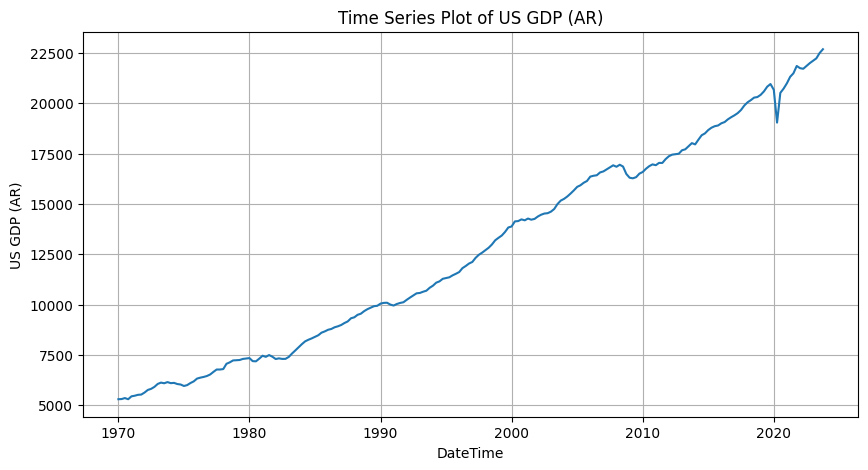

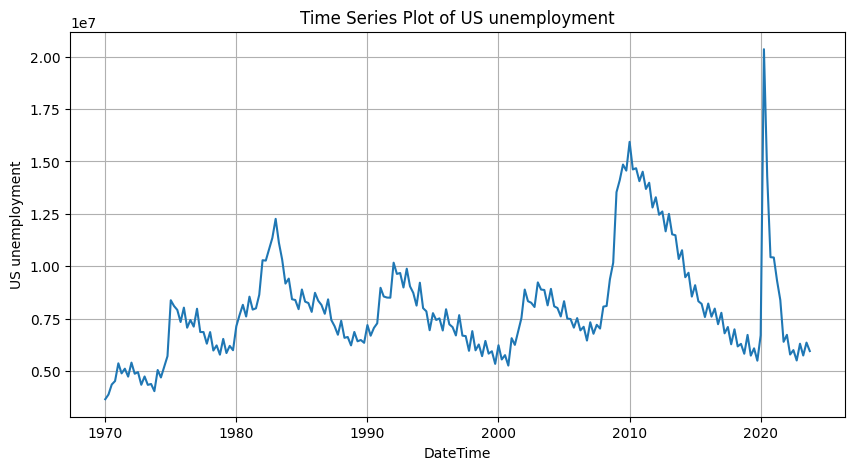

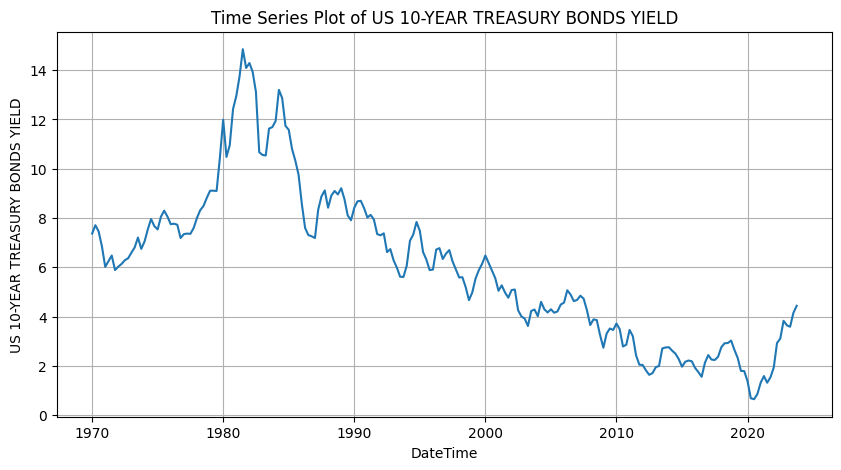

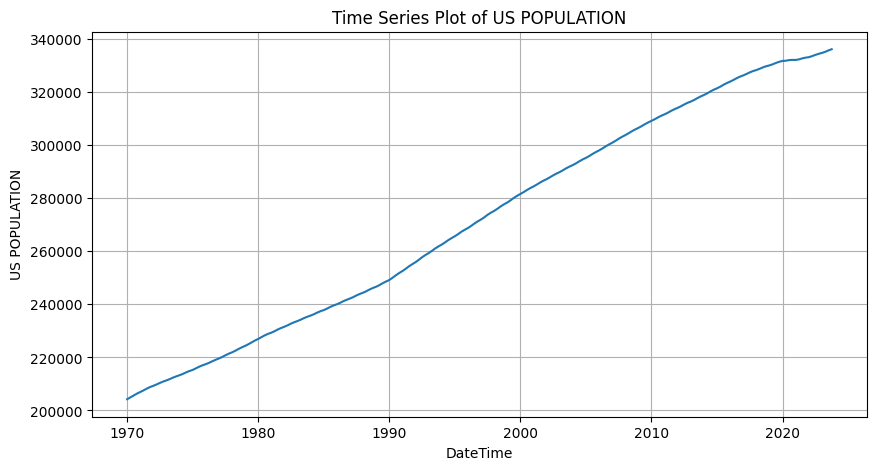

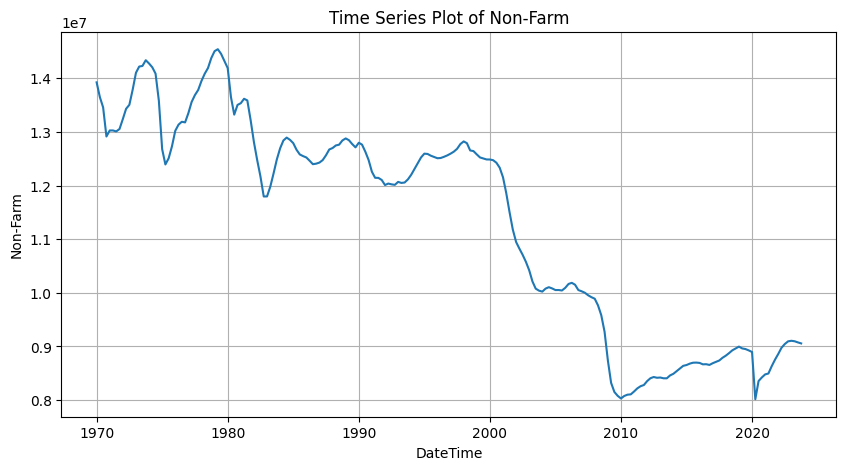

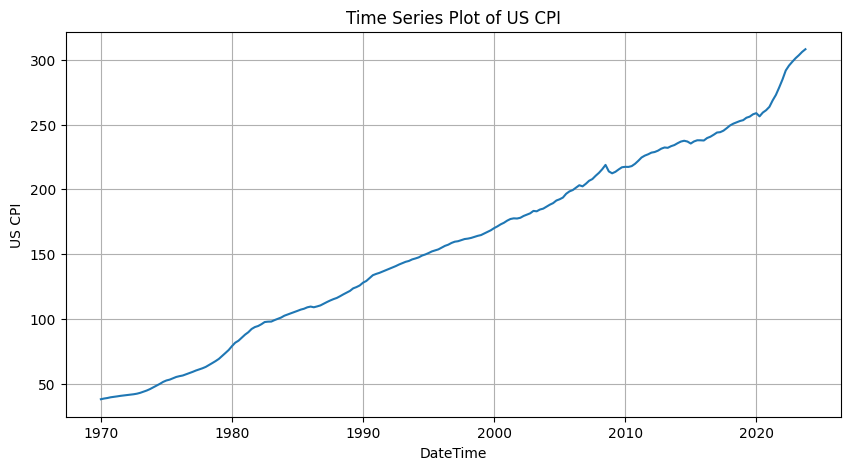

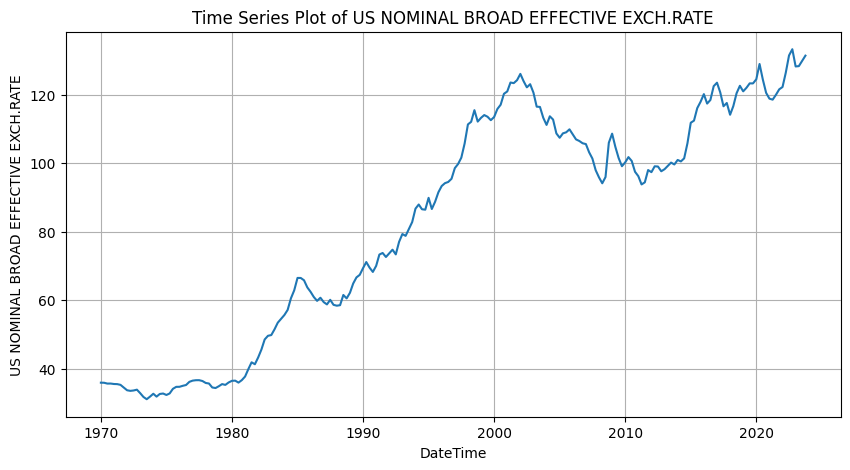

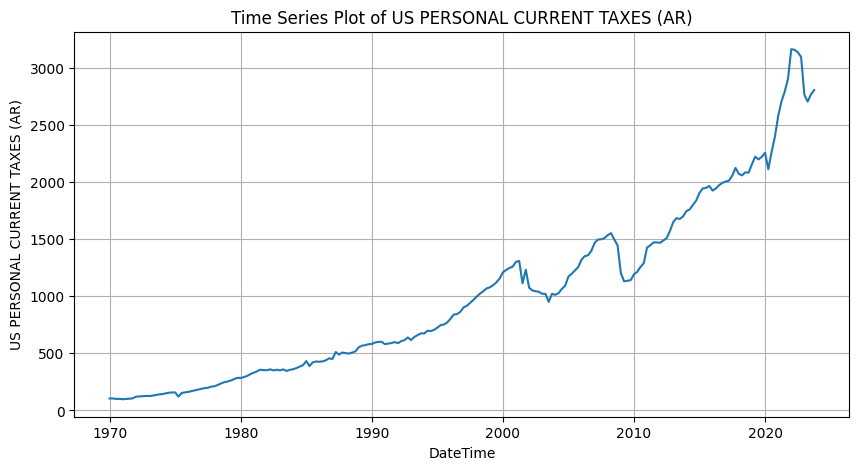

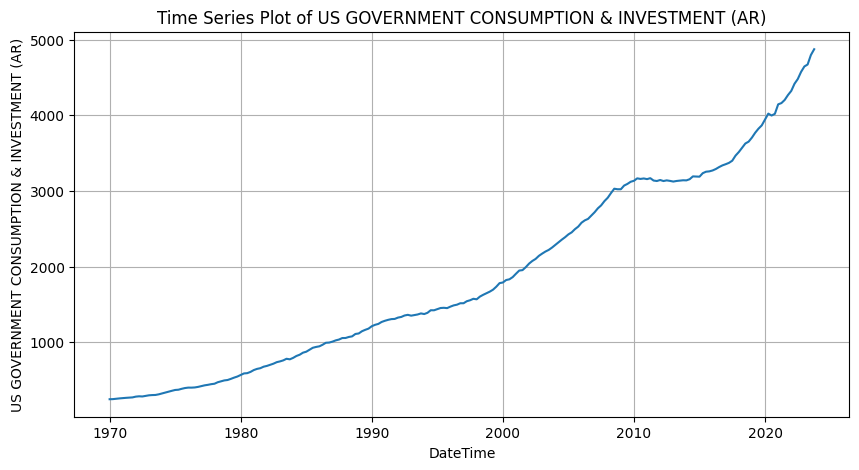

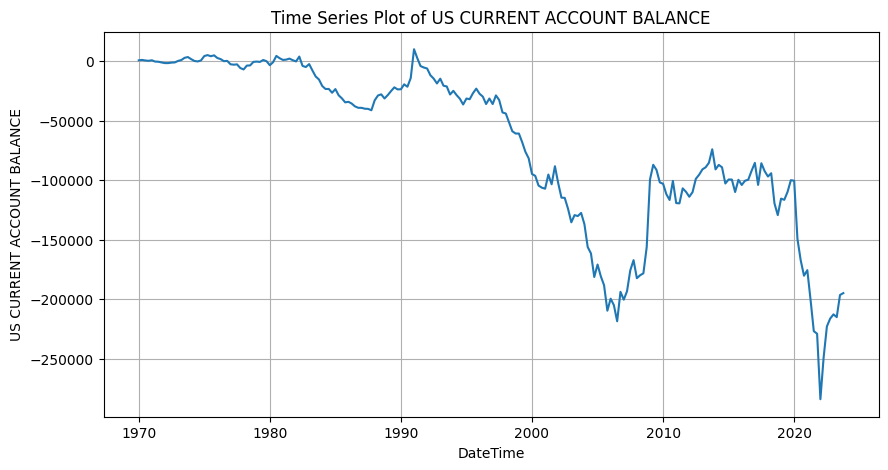

In [57]:
def parse_quarter(string):
    # Expected format: 'Q1 1970'
    # Split the string into quarter and year
    q, year = string.split(' ')
    year = int(year)
    quarter = int(q[1])
    # Calculate the month (first month of the quarter)
    month = 3 * quarter - 2
    return pd.Timestamp(year=year, month=month, day=1)

data['DateTime'] = data['Date'].apply(parse_quarter)
data.set_index('DateTime', inplace=True)

for column in data.columns:  
    plt.figure(figsize=(10, 5))  
    if column != 'Date': 
        plt.plot(data.index, data[column])
        plt.title(f'Time Series Plot of {column}')
        plt.xlabel('DateTime')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()

In [58]:
data.head(-1) # check that the function worked 

Date  US GDP (AR)  US unemployment  \
DateTime                                            
1970-01-01  Q1 1970     5300.652      3644000.000   
1970-04-01  Q2 1970     5308.164      3869333.333   
1970-07-01  Q3 1970     5357.077      4346666.667   
1970-10-01  Q4 1970     5299.672      4512333.333   
1971-01-01  Q1 1971     5443.619      5359000.000   
...             ...          ...              ...   
2022-07-01  Q3 2022    21851.134      5990333.333   
2022-10-01  Q4 2022    21989.981      5494666.667   
2023-01-01  Q1 2023    22112.329      6295333.333   
2023-04-01  Q2 2023    22225.350      5732333.333   
2023-07-01  Q3 2023    22490.692      6348000.000   

            US 10-YEAR TREASURY BONDS YIELD  US POPULATION      Non-Farm  \
DateTime                                                                   
1970-01-01                             7.37         204246  1.392600e+07   
1970-04-01                             7.71         204941  1.365167e+07   
1970-07-01                             7.46         205664  1.345900e+07   
1970-10-01                             6.85         206352  1.291600e+07   
1971-01-01                             6.02         206960  1.302867e+07   
...                                     ...            ...           ...   
2022-07-01                             3.11         333925  9.044333e+06   
2022-10-01                             3.83         334326  9.095000e+06   
2023-01-01                             3.65         334664  9.105333e+06   
2023-04-01                             3.59         335080  9.096667e+06   
2023-07-01                             4.15         335612  9.075333e+06   

             US CPI  US NOMINAL BROAD EFFECTIVE EXCH.RATE  \
DateTime                                                    
1970-01-01   38.100                              35.86958   
1970-04-01   38.633                              35.84668   
1970-07-01   39.033                              35.60398   
1970-10-01   39.600                              35.61470   
1971-01-01   39.933                              35.48114   
...             ...                                   ...   
2022-07-01  295.509                             131.40834   
2022-10-01  298.441                             133.23639   
2023-01-01  301.203                             128.20826   
2023-04-01  303.467                             128.29949   
2023-07-01  306.034                             129.82510   

            US PERSONAL CURRENT TAXES (AR)  \
DateTime                                     
1970-01-01                         104.573   
1970-04-01                         105.512   
1970-07-01                         100.657   
1970-10-01                         101.538   
1971-01-01                          98.331   
...                                    ...   
2022-07-01                        3137.041   
2022-10-01                        3095.669   
2023-01-01                        2763.673   
2023-04-01                        2703.839   
2023-07-01                        2765.325   

            US GOVERNMENT CONSUMPTION & INVESTMENT (AR)  \
DateTime                                                  
1970-01-01                                      247.889   
1970-04-01                                      249.143   
1970-07-01                                      254.584   
1970-10-01                                      258.708   
1971-01-01                                      261.905   
...                                                 ...   
2022-07-01                                     4477.855   
2022-10-01                                     4572.408   
2023-01-01                                     4643.890   
2023-04-01                                     4669.808   
2023-07-01                                     4794.830   

            US CURRENT ACCOUNT BALANCE  
DateTime                                
1970-01-01                         620  
1970-04-01                         972  
1970-07-01 

## **Analysis of High Correlation in Economic Time Series Data**

In economic datasets, particularly those involving time series data over extended periods, it is common to encounter high correlations between different variables. This section explores the reasons behind this phenomenon and underscores the importance of conducting stationarity tests.

### Reasons for High Correlation

- **Trends and Economic Cycles:** Economic time series often include trends or cycles that influence many sectors simultaneously. For instance, a booming economy might simultaneously lead to increased industrial production, higher consumer spending, and reduced unemployment. These underlying trends can induce high correlations across various economic indicators.

- **Common Driving Factors:** Economic variables often respond to the same macroeconomic policies and global events. For example, policy changes by central banks can simultaneously affect exchange rates, inflation, and stock prices.

- **Accumulation of Changes Over Time:** In non-differenced data, each data point accumulates the changes from previous periods, potentially exaggerating the correlation if the series move in similar trends over time.

### Implications of High Correlation

While high correlations can reveal important relationships and co-movements in economic data, they can also lead to issues such as:

- **Spurious Correlations:** High correlations may not always represent actual causal relationships but may instead reflect the influence of shared trends or cycles. This is problematic when the data is non-stationary, as the apparent relationships might be misleading.

- **Multicollinearity in Modeling:** For predictive modeling, high correlations between independent variables (multicollinearity) can distort the estimated effects of predictors on the dependent variable, leading to unreliable statistical inferences.

### Necessity of Stationarity Tests

- **Stationarity Tests:** It is crucial to test each time series for stationarity. A stationary time series has statistical properties such as mean and variance that do not change over time, making it more amenable to analysis and forecasting. Common tests for stationarity include the Augmented Dickey-Fuller (ADF) test.


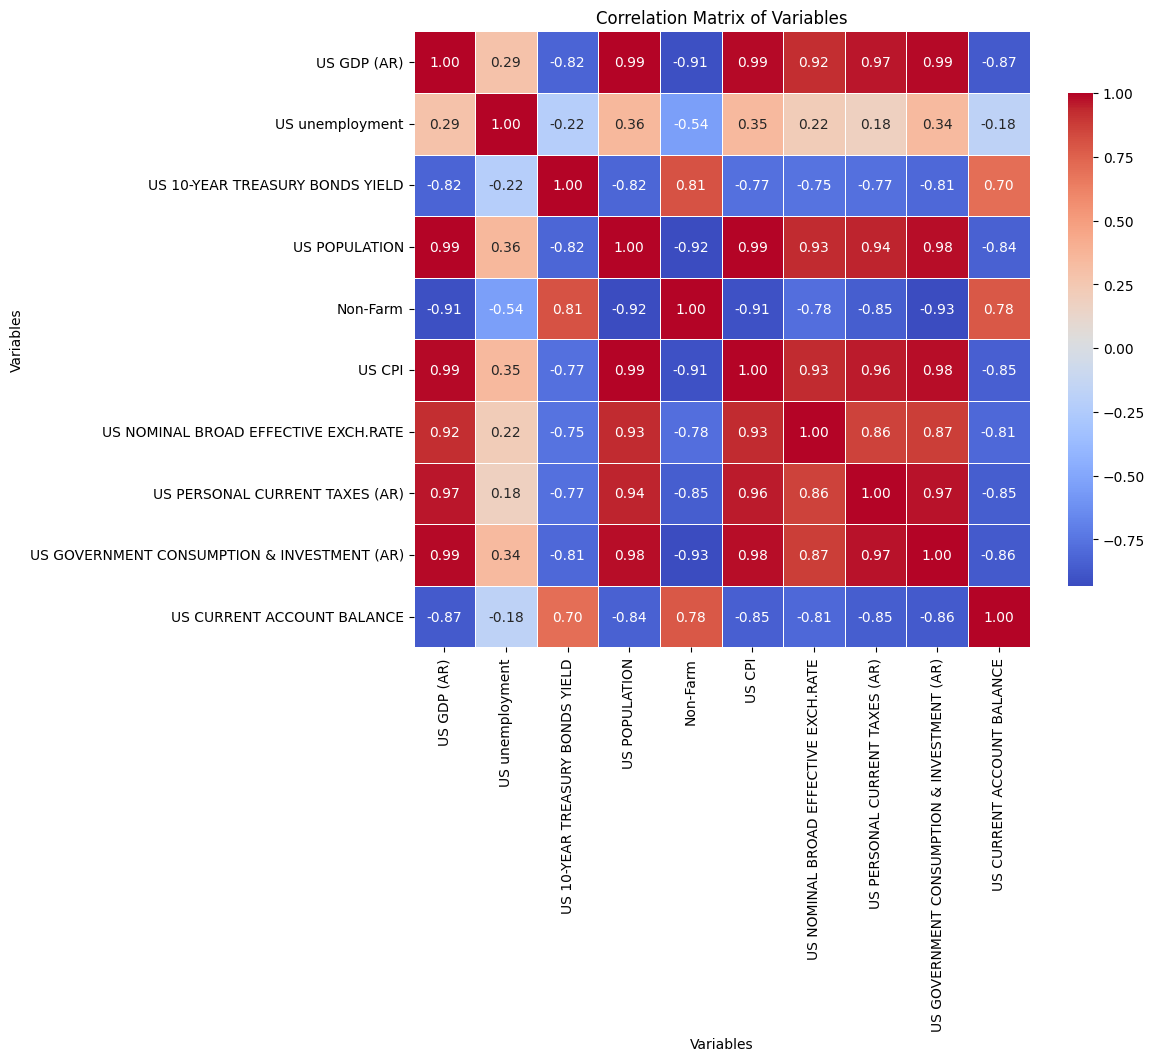

In [59]:
correlation_matr = data.drop('Date', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

## **Stationarity Check**

A stationarity check is essential in time series analysis to ensure that statistical properties such as mean, variance, and covariance are constant over time. Stationary data are easier to predict because they have consistent properties that do not change with time. Non-stationary data can lead to misleading statistics and unreliable model outcomes.


    
## Augmented Dickey-Fuller (ADF) Test Explanation

The Augmented Dickey-Fuller (ADF) test is an extension of the Dickey-Fuller test and is specifically designed to handle more complex models that include an autoregressive process. It test is a statistical test used to determine whether a time series is stationary or not.

Core Concepts of the ADF Test:

    1. Null Hypothesis (H0): The series has a unit root, indicating it is non-stationary. This means the series is defined by a stochastic trend.

    2. Alternative Hypothesis (H1): The series has no unit root, indicating it is stationary. This implies the series is defined by a deterministic trend or no trend at all.

The test equation can be represented as follows:

$$
\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \delta_2 \Delta y_{t-2} + \ldots + \delta_p \Delta y_{t-p} + \epsilon_t
$$

Where:

- $y_t$: the time series.
- $\Delta$: the difference operator, so $\Delta y_t = y_t - y_{t-1}$.
- $\alpha$: a constant.
- $\beta t$: represents a time trend.
- $\gamma$: the coefficient on $y_{t-1}$ (lagged level of the series).
- $\delta_1, \delta_2, \ldots, \delta_p$: the coefficients on the lagged differences of the series.
- $\epsilon_t$: the error term.
- $p$: the number of lagged differences included in the regression (also known as lag order).

### Key Outputs of the ADF Test:
- **ADF Statistic**: This is the test statistic. A more negative value suggests stronger evidence against the null hypothesis, supporting the idea that the series is stationary.
- **p-value**: Provides the probability of observing the test results under the null hypothesis. A low p-value (typically < 0.05) indicates that you can reject the null hypothesis and consider the series to be stationary.
- **Critical Values**: These values are provided for different significance levels (commonly 1%, 5%, and 10%). If the ADF statistic is more negative than the critical value, the null hypothesis can be rejected.

### Interpretation:
- If the ADF statistic is less negative than the critical values and the p-value is high, you fail to reject the null hypothesis, suggesting the series is non-stationary.
- If the ADF statistic is more negative than the critical values or the p-value is low, you reject the null hypothesis, suggesting the series is stationary.


### Explanation of the Augmented Dickey-Fuller Test Code

This section of the code is crucial for conducting the Augmented Dickey-Fuller (ADF) test on the time series data for US GDP (AR) CONA. Here's a breakdown of what each part of the script does:
```python
1. result = adfuller(gdp_series)
    Function Call: This line calls the adfuller function on gdp_series
```
    Output: The output, result, is stored as a tuple. It contains:
    
        Test statistic
        p-value
        Number of lags used
        Number of observations
        Critical values
        
        
2. The p-value, indexed at 1 in the tuple, assesses the statistical significance of the test results. A low p-value (typically less than 0.05) suggests that the observed data is unlikely under the null hypothesis, supporting the rejection of the null hypothesis of non-stationarity.


3. The loop iterates over the critical values, which are stored in a dictionary at the fifth position of the tuple (result[4]). Each key-value pair indicates the threshold for rejecting the null hypothesis at different significance levels, aiding in the visual comparison of the ADF statistic against standardized benchmarks.

In [60]:
column_to_test = 'US GDP (AR)'
gdp_series = data[column_to_test].dropna()  
# Apply the Augmented Dickey-Fuller test
result = adfuller(gdp_series)
print(f'ADF Statistic for {column_to_test}: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic for US GDP (AR): 1.69061141011749
p-value: 0.9981054847569254
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574
The series is not stationary.


# Test Results Analysis

## ADF Statistic
- **Value**: The ADF statistic is 1.69061141011749.
- **Interpretation**: This value is significantly higher than zero and well above any of the test's critical values. The positive statistic here suggests inclination to accept the null hypothesis of the presence of a unit root.

## p-value
- **Value**: The p-value is 0.998972870601733, almost reaching 1.
- **Implication**: This high p-value indicates a strong likelihood of observing the test results under the null hypothesis. It suggests that the series is non-stationary, retaining a unit root.

## Critical Values
- The test's critical values for rejecting the null hypothesis at different significance levels are:
  - **1%**: -3.456
  - **5%**: -2.873
  - **10%**: -2.573
- **Comparison**: The ADF statistic does not come close to falling below these critical values. In fact, it is positive, suggesting non-rejection of the null hypothesis across all conventional significance levels.

## Overall Interpretation
- **Conclusion**: The results strongly suggest that the US GDP (AR) CONA series is non-stationary. This indicates that the series likely exhibits a trend or varying volatility over time, rather than returning to a long-term mean.
- **Implications for Modeling**: Given this non-stationarity, any modeling or forecasting involving this time series should first address the non-stationarity.

## Next Steps
- To further investigate and possibly confirm these findings, applying first differencing is necessary. Subsequent retesting with the Augmented Dickey-Fuller test after adjustments will provide more insight into the adjusted series' stationarity.


## **Differencing and Re-testing for Stationarity**

In this section, we apply first differencing to the GDP series and re-evaluate it for stationarity using the Augmented Dickey-Fuller test. First differencing is a common method to remove non-stationarity related to trends in time series data.

## Step 1: First Differencing
```python
gdp_series_diff = gdp_series.diff().dropna()



- Purpose: First differencing transforms the series by subtracting the previous observation from the current observation. This method is used to eliminate or reduce trend and seasonality effects, making the series more likely to be stationary.

- Execution: diff() calculates the difference between consecutive observations. 

## Step 2: Re-applying the Augmented Dickey-Fuller Test

Function: The adfuller() function is used again, this time on the differenced series. This test will help determine if the transformation has achieved stationarity in the series.

## Step3: Interpretation of Results

If the p-value is less than 0.05, we conclude that the series, after differencing, does not have a unit root and is stationary. This is critical for further time series analysis and forecasting.

In [61]:
gdp_series_diff = gdp_series.diff().dropna()
result_diff = adfuller(gdp_series_diff)
print(f'ADF Statistic after differencing: {result_diff[0]}')
print(f'p-value after differencing: {result_diff[1]}')
print('Critical Values after differencing:')
for key, value in result_diff[4].items():
    print(f'\t{key}: {value:.3f}')

if result_diff[1] < 0.05:
    print("The differenced series is stationary.")
else:
    print("The differenced series is not stationary.")


ADF Statistic after differencing: -16.88221248947324
p-value after differencing: 1.0607485901065197e-29
Critical Values after differencing:
	1%: -3.461
	5%: -2.875
	10%: -2.574
The differenced series is stationary.


## Analysis of Stationarity After First Differencing

After the initial tests indicated non-stationarity, we applied first differencing to the GDP series to potentially eliminate any underlying trends or seasonality that might affect the stationarity of the series.

## Output of the ADF Test

**ADF Statistic**: The statistic is significantly more negative (-16.88221248947324) compared to the first test, suggesting strong evidence against the null hypothesis.
    
**p-value**: An extremely low p-value (1.0607485901065197e-29), far below the threshold of 0.05, indicating very strong evidence against the null hypothesis.
    
**Critical Values**: These values provide thresholds at which the null hypothesis can be rejected at different confidence levels:
        1%: -3.461
        5%: -2.875
        10%: -2.574
    Comparison: The ADF statistic is well below all the critical values.


## ADF test on the whole dataset 

This part use the ADF test and the logic used before, to determine what variables are stationary or not.

In [62]:
def adf_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC') # The Akaike Information Criterion (AIC)
    output = {'test_statistic': round(r[0], 4), 'pvalue': round(r[1], 4), 'critical_values': r[4]}
    p_value = r[1]
    def adjust(val, length=6): # Helper function to format the critical values for printing.
        return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {r[2]}')

    for key, val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(" => Series is Non-Stationary.")


for name, column in data.items():
    if pd.api.types.is_numeric_dtype(column):
        adf_test(column.dropna(), name=name)  
    else:
        print(f'Skipping non-numeric column: {name}')


Skipping non-numeric column: Date
    Augmented Dickey-Fuller Test on "US GDP (AR)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.6906
 No. Lags Chosen       = 1
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.9981054847569254. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
    Augmented Dickey-Fuller Test on "US unemployment" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.3387
 No. Lags Chosen       = 4
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.013233134636135676. Rejecting Null Hypothesis.
 => Series is Stationary.
    Augmented Dickey-Fuller Test on "US 10-YEAR TREASURY BONDS YIELD" 
    ----

We notice that most of the variables are non-stationary, which is a problem. In order to resolve this problem we will use the differenciation method over the whole set. 

## Process Overview for Stationarity Testing

### Step 1: Differencing the Data

We first need to prepare our data. 

- **Differencing Explained**:
  - Differencing is applied to each numeric column in the dataset.
  - **Code Implementation**:
    ```python
    diff_column = column.diff().dropna()  
    ```

### Step 2: Handling Missing Data

- After differencing, the series may have `NaN` values, particularly the first element of the series because there is no preceding value to subtract from the first data point.
- We handle this by using the `.dropna()` method to remove any missing values, ensuring the series passed to the testing function is complete and suitable for statistical analysis.

### Step 3: Applying the Augmented Dickey-Fuller Test

- With the data prepared through differencing and cleaned of NaN values, it is now ready to be tested for stationarity.

- **Function Execution**:
  - The function takes the differenced and cleaned series as input and performs the statistical test.
  - Results include the test statistic, p-value, and critical values, which are used to determine if the series is stationary.
  - **Code Snippet**:
    ```python
    adf_test(diff_column, name=name)  
```

In [63]:
def adf_test(series, name=''):
    """Perform ADFuller to test for Stationarity of given series and print a formatted report"""
    result = adfuller(series.dropna(), autolag='AIC')  # Ensure there are no NaNs and instructs the function to use the Akaike Information Criterion (AIC) to select the optimal number of lags
    print(f'\nAugmented Dickey-Fuller Test on "{name}" after differencing')
    print('---------------------------------------------------------')
    print('Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f'Significance Level    = 0.05')
    print(f'Test Statistic        = {result[0]:.4f}')
    print(f'No. Lags Chosen       = {result[2]}')

    for key, value in result[4].items():
        print(f'Critical value {key} = {value:.3f}')

    print(f' => P-Value = {result[1]:.10f}.')
    if result[1] < 0.05:
        print(" => Rejecting Null Hypothesis.")
        print(" => Series is Stationary.")
    else:
        print(" => Weak evidence to reject the Null Hypothesis.")
        print(" => Series is Non-Stationary.")


for name, column in data.items():
    if pd.api.types.is_numeric_dtype(column):
        
        diff_column = column.diff().dropna()  
        adf_test(diff_column, name=name)
    else:
        print(f'Skipping non-numeric column: {name}')


Skipping non-numeric column: Date

Augmented Dickey-Fuller Test on "US GDP (AR)" after differencing
---------------------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level    = 0.05
Test Statistic        = -16.8822
No. Lags Chosen       = 0
Critical value 1% = -3.461
Critical value 5% = -2.875
Critical value 10% = -2.574
 => P-Value = 0.0000000000.
 => Rejecting Null Hypothesis.
 => Series is Stationary.

Augmented Dickey-Fuller Test on "US unemployment" after differencing
---------------------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level    = 0.05
Test Statistic        = -7.2227
No. Lags Chosen       = 3
Critical value 1% = -3.462
Critical value 5% = -2.875
Critical value 10% = -2.574
 => P-Value = 0.0000000002.
 => Rejecting Null Hypothesis.
 => Series is Stationary.

Augmented Dickey-Fuller Test on "US 10-YEAR TREASURY BONDS YIELD" after differencing
-------------

## Conclusion

According ot the test run, two variables are still non-stationary after the differencing. This do not necessarily imply that those variables do not explain the dependant variable, but we have enough independant variables to work with. Therefore in order to avoid overfitting, we drop those two values and use a new dataset. 

In [64]:
non_stationary_variables = ['US POPULATION', 'US GOVERNMENT CONSUMPTION & INVESTMENT (AR)']
data_diff = data.drop(non_stationary_variables, axis=1)  
data_diff = data_diff.apply(lambda x: x.diff().dropna() if pd.api.types.is_numeric_dtype(x) else x)

print(data_diff.head())  

data_diff.to_csv('processed_data.csv', index=False)

               Date  US GDP (AR)  US unemployment  \
DateTime                                            
1970-01-01  Q1 1970          NaN              NaN   
1970-04-01  Q2 1970        7.512       225333.333   
1970-07-01  Q3 1970       48.913       477333.334   
1970-10-01  Q4 1970      -57.405       165666.666   
1971-01-01  Q1 1971      143.947       846666.667   

            US 10-YEAR TREASURY BONDS YIELD   Non-Farm  US CPI  \
DateTime                                                         
1970-01-01                              NaN        NaN     NaN   
1970-04-01                             0.34 -274333.33   0.533   
1970-07-01                            -0.25 -192666.67   0.400   
1970-10-01                            -0.61 -543000.00   0.567   
1971-01-01                            -0.83  112666.67   0.333   

            US NOMINAL BROAD EFFECTIVE EXCH.RATE  \
DateTime                                           
1970-01-01                                   NaN   
1970-04-0

## **Correlation after using differentiation**

By applying differencing to our time series data, we successfully mitigated the extreme correlation observed previously. Differencing helped to stabilize the variance and remove the trend present in the data, resulting in a more stationary series. As a result, our analysis is now better equipped to capture the underlying dynamics and relationships among the variables, leading to more reliable and interpretable results. Overall, differencing has improved the quality of our analysis and enhanced our ability to make informed decisions based on the data.

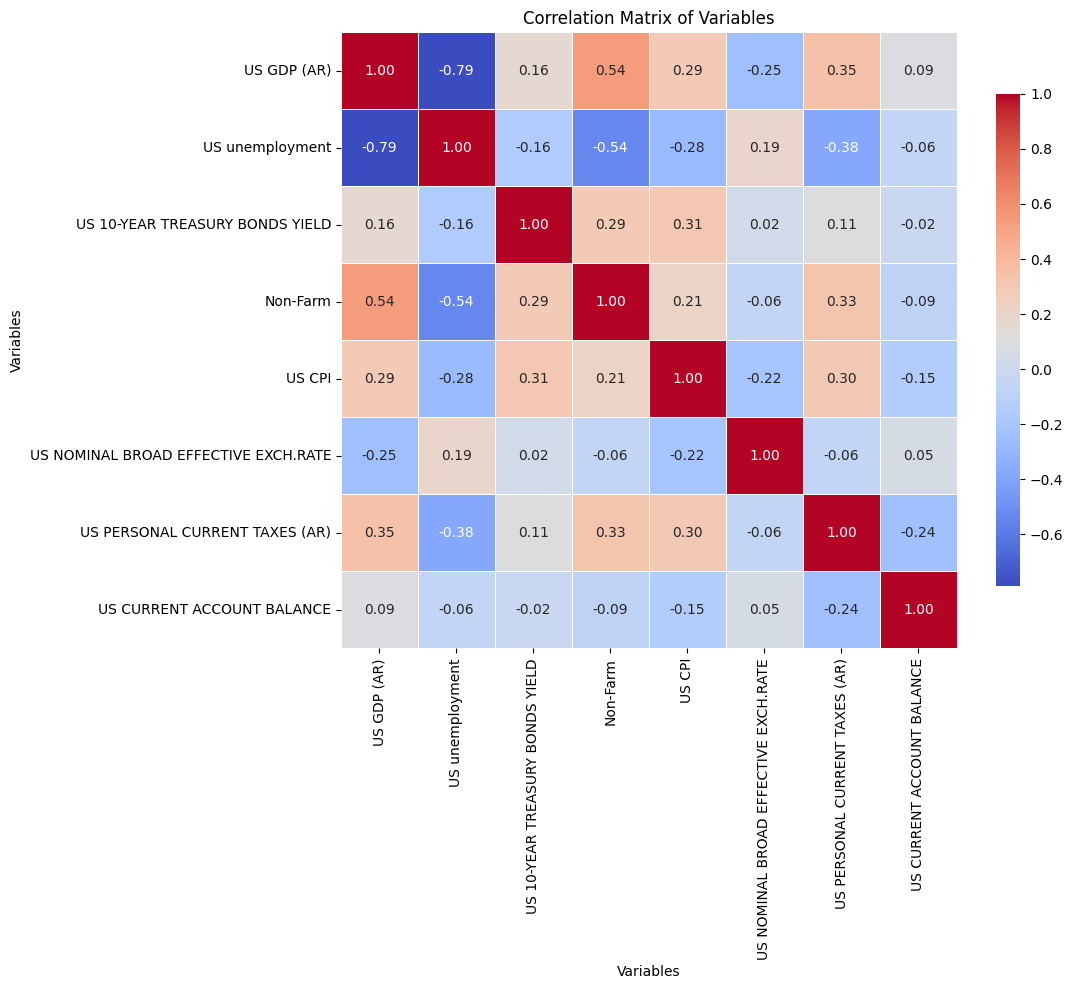

In [65]:
correlation_matrix = data_diff.drop('Date', axis=1).corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0)  
plt.show()


## **Visual representation** 

In [66]:
data_diff = pd.read_csv('processed_data.csv')
data_diff = data_diff.dropna()

In [67]:
data_diff.head()

Date  US GDP (AR)  US unemployment  US 10-YEAR TREASURY BONDS YIELD  \
1  Q2 1970        7.512       225333.333                             0.34   
2  Q3 1970       48.913       477333.334                            -0.25   
3  Q4 1970      -57.405       165666.666                            -0.61   
4  Q1 1971      143.947       846666.667                            -0.83   
5  Q2 1971       29.440      -479666.667                             0.23   

    Non-Farm  US CPI  US NOMINAL BROAD EFFECTIVE EXCH.RATE  \
1 -274333.33   0.533                              -0.02290   
2 -192666.67   0.400                              -0.24270   
3 -543000.00   0.567                               0.01072   
4  112666.67   0.333                              -0.13356   
5       0.00   0.367                              -0.03334   

   US PERSONAL CURRENT TAXES (AR)  US CURRENT ACCOUNT BALANCE  
1                           0.939                       352.0  
2                          -4.855                      -457.0  
3                           0.881                      -293.0  
4                          -3.207                       461.0  
5                           2.383                     -1092.0

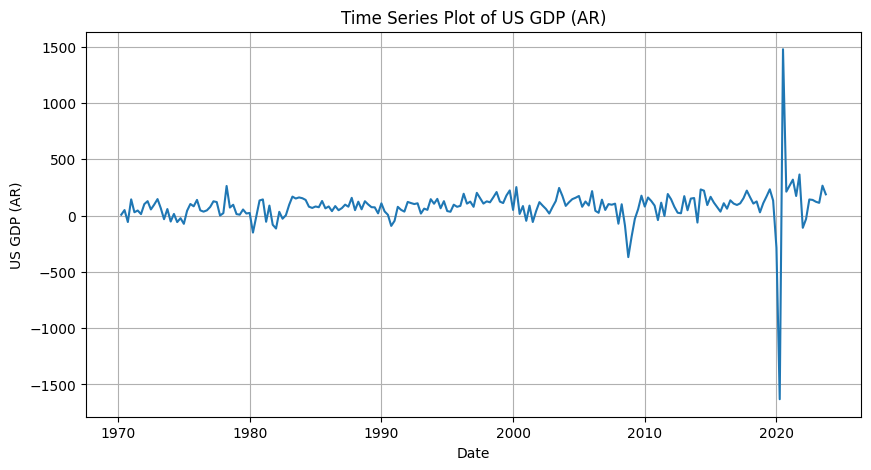

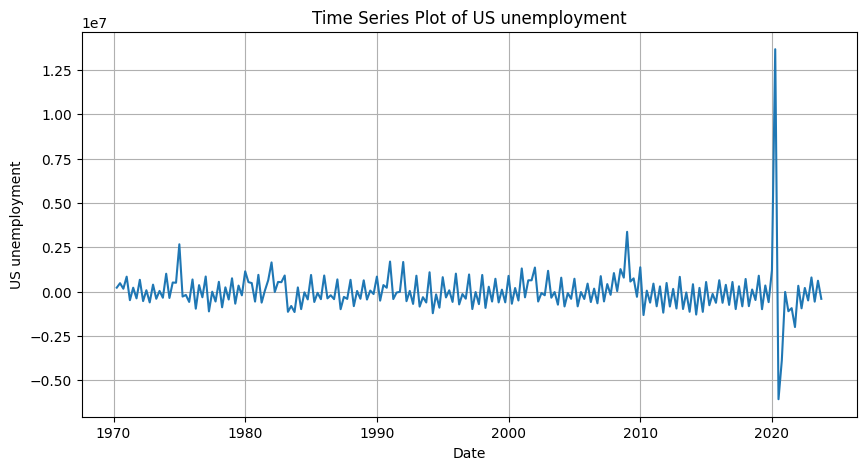

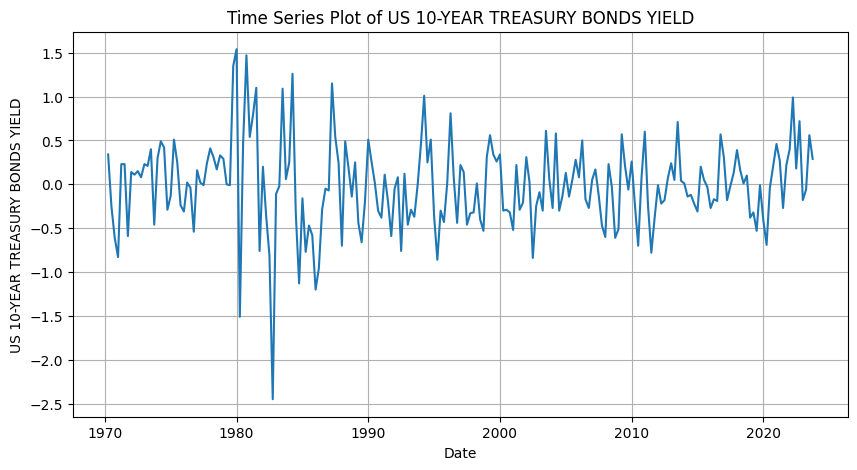

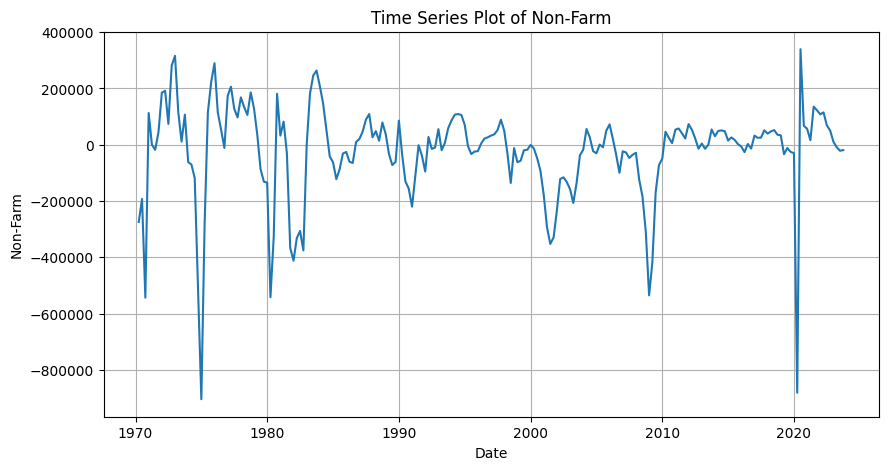

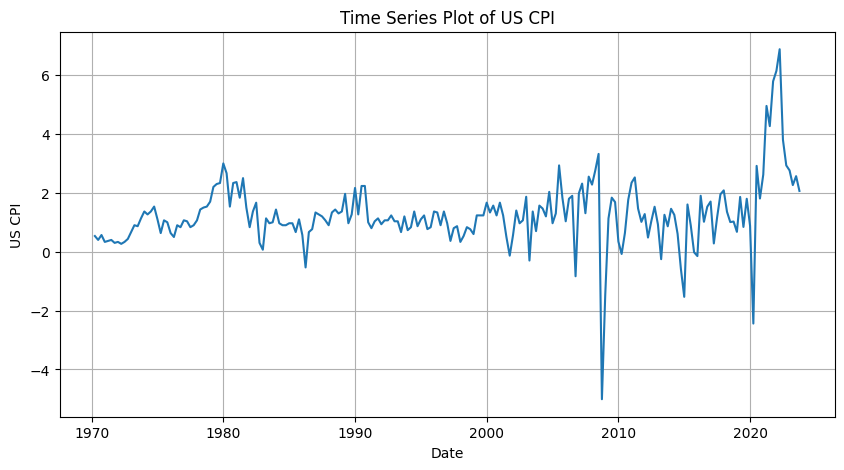

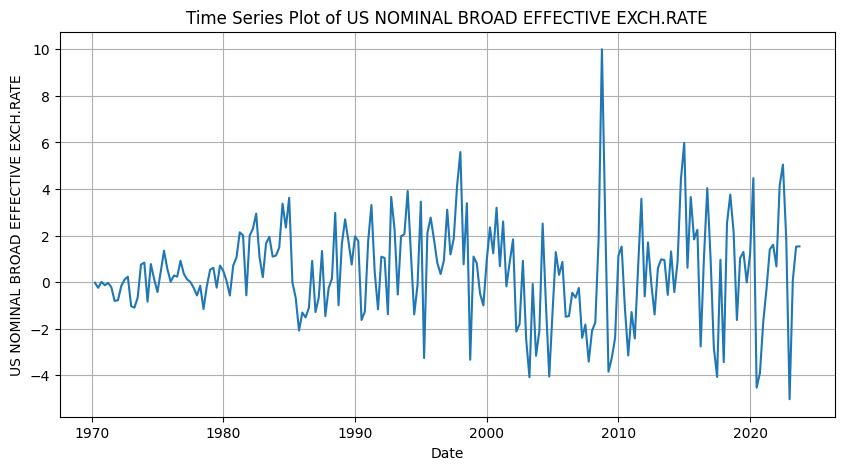

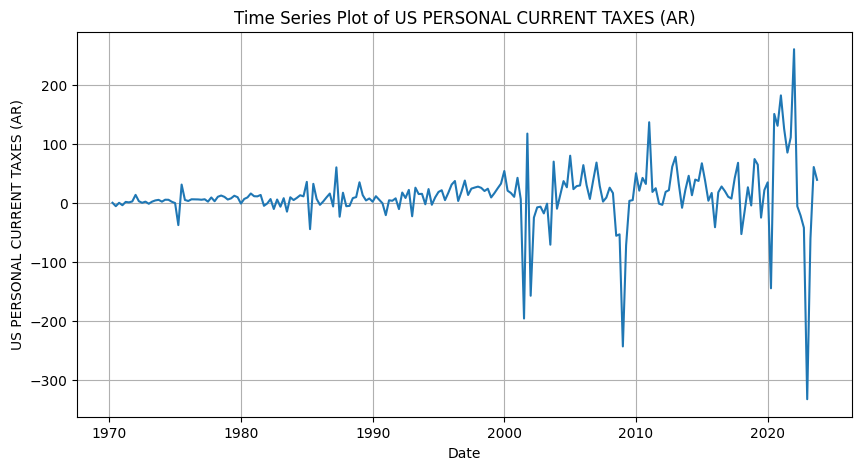

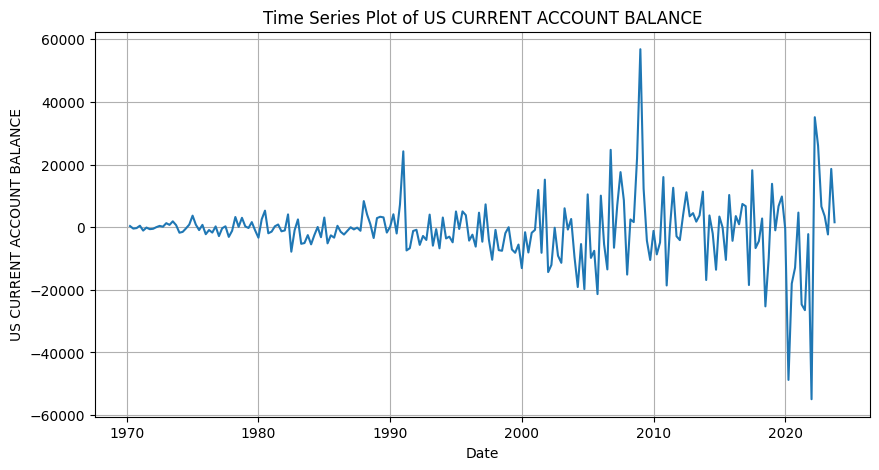

In [68]:
data_diff['Date'] = data_diff['Date'].apply(parse_quarter)
# Set 'Date' as the index of the dataframe
data_diff.set_index('Date', inplace=True)

for column in data_diff.columns:
    plt.figure(figsize=(10, 5)) 
    plt.plot(data_diff.index, data_diff[column])
    plt.title(f'Time Series Plot of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


## **Models and evaluation**

### Overview
This analysis evaluates the performance of an Ordinary Least Squares (OLS) regression model in predicting "US GDP (AR)" and compares it with Ridge and Lasso regression models to assess the impact of regularization. The objective is to understand the predictive power of various economic indicators and to optimize the model for better predictive accuracy and robustness.


In [69]:
mean_gdp = data_diff['US GDP (AR)'].mean()
gdp_stats = data_diff['US GDP (AR)'].describe()
baseline_mse = ((data_diff['US GDP (AR)'] - mean_gdp) ** 2).mean()
baseline_mae = abs(data_diff['US GDP (AR)'] - mean_gdp).mean()

print("GDP Statistics:\n", gdp_stats)
print("Baseline MSE:", baseline_mse)
print("Baseline MAE:", baseline_mae)

GDP Statistics:
 count     215.000000
mean       80.830712
std       176.489584
min     -1630.723000
25%        37.763500
50%        88.598000
75%       134.581500
max      1476.955000
Name: US GDP (AR), dtype: float64
Baseline MSE: 31003.696154679583
Baseline MAE: 80.04679489453765


### Understanding the Output

- GDP Statistics:
        Count: 215 observations.
        Mean: The average US GDP (AR) over these observations is approximately 80.83.
        Standard Deviation: The standard deviation is relatively high at 176.49, indicating substantial variability in GDP values.
        Minimum and Maximum: The range from about -1630.72 to 1476.95 shows extreme fluctuations, which may be indicative of economic downturns or booms during different periods.


- Baseline MSE (Mean Squared Error):
        Value: 31,003.70
        This indicates that on average, the squared difference between the actual GDP values and the mean GDP (used as a naive prediction) is around 31,003.70. Our models should aim to achieve lower MSE values to prove they are capturing more complex patterns and relationships in the data effectively.


- Baseline MAE (Mean Absolute Error):
        Value: 80.05
        This value tells us that, on average, the absolute error of using the mean GDP as a prediction is around 80.05. This metric is particularly useful as it provides a direct interpretation in the same units as the GDP, showing how far off the predictions are on average without squaring the errors.

Implications and Next Steps

- **Model Performance**: Any predictive model we use should aim to beat these baseline MSE and MAE values. Models yielding MSE lower than 31,003.70 and MAE lower than 80.05 can be considered improvements over the naive approach.

- **Model Evaluation**: Comparing the MSE and MAE of your Ridge and Lasso models against these baselines will help assess their effectiveness. If these models do not significantly improve on these metrics, it might indicate the need for model adjustments or different approaches.

## **Statistical Forecasting Models**

### Original Features
The original features included in the model are:
- US unemployment
- US 10-YEAR TREASURY BONDS YIELD
- Non-Farm
- US CPI
- US NOMINAL BROAD EFFECTIVE EXCH.RATE
- US PERSONAL CURRENT TAXES (AR)
- US CURRENT ACCOUNT BALANCE


## Multiple Linear Regression 

### Algebraic Formula:
The algebraic formula for the multiple linear regression model is given by:

$$ y = \beta_0 + \beta_1 \cdot \text{US unemployment} + \beta_2 \cdot \text{US 10-YEAR TREASURY BONDS YIELD} + \beta_3 \cdot \text{Non-Farm} + \beta_4 \cdot \text{US CPI} + \beta_5 \cdot \text{US NOMINAL BROAD EFFECTIVE EXCH.RATE} + \beta_6 \cdot \text{US PERSONAL CURRENT TAXES (AR)} + \beta_7 \cdot \text{US CURRENT ACCOUNT BALANCE} + \epsilon$$

Where:
- $ y $ is the US GDP (AR), the dependent variable.
- $ \beta_0 $ is the intercept term.
- $\beta_1, \beta_2, \beta_3, \beta_4, \beta_5, \beta_6, \beta_7$ are the coefficients of the independent variables.
- The independent variables are:
  - US unemployment
  - US 10-YEAR TREASURY BONDS YIELD
  - Non-Farm
  - US CPI (Consumer Price Index)
  - US NOMINAL BROAD EFFECTIVE EXCH.RATE
  - US PERSONAL CURRENT TAXES (AR)
  - US CURRENT ACCOUNT BALANCE
- $\epsilon$ represents the error term.

### Error Metrics

The model's accuracy is assessed using the Mean Squared Error (MSE) and Mean Absolute Error (MAE), computed as:

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

$$
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|
$$

where:
- $y_i$ are the actual observed values,
- $\hat{y}_i$ are the predicted values from the model,
- $n$ is the number of observations in the test set.

### Residuals

Residuals for the model are calculated as the difference between the observed values and the predicted values:

$$
\text{Residuals} = y_i - \hat{y}_i
$$

These residuals are plotted to assess the fit of the model and to identify any patterns that might suggest problems with the model such as non-linearity, autocorrelation, or heteroscedasticity.

## OLS Multiple Linear Regression

Using a simple linear regression model with a single train-test split for time series data can sometimes provide insights quickly; however, it may not be the most robust method, especially for time series forecasting. However we will use it in order to see how the MSE and MAE behave in this case. 

## Using VIF Results

VIF Values: All the VIF values are well below the commonly used threshold of 5, with most of them even lower than 2. This suggests that there is very little multicollinearity among the features in their current form. Lower VIF values indicate that the predictor variables are not linearly dependent on each other, which is a good sign for the validity of the coefficients estimated in regression analysis.

Specific VIF Outputs: 

- Constant term: The VIF for the intercept is a bit higher but still at a very reasonable level, suggesting no issues with collinearity regarding the constant term.

Individual Features:

- US unemployment: VIF of 1.663 suggests minimal collinearity with other variables.

- US 10-YEAR TREASURY BONDS YIELD: VIF of 1.196 indicates very low dependency on other predictors.

- Non-Farm, US CPI, US NOMINAL BROAD EFFECTIVE EXCH.RATE, US PERSONAL CURRENT TAXES (AR), and US CURRENT ACCOUNT BALANCE: All these features have VIFs ranging from about 1.09 to 1.56, which are quite low and indicative of little to no collinearity concerns.

In [70]:
features = ['US unemployment', 'US 10-YEAR TREASURY BONDS YIELD', 'Non-Farm', 'US CPI',
            'US NOMINAL BROAD EFFECTIVE EXCH.RATE', 'US PERSONAL CURRENT TAXES (AR)', 
            'US CURRENT ACCOUNT BALANCE']

X_original = data_diff[features]

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_original)

if hasattr(poly, 'get_feature_names_out'):
    column_names = poly.get_feature_names_out(features)
else:
    column_names = poly.get_feature_names(features)

X_poly_df = pd.DataFrame(X_poly, columns=column_names)

X_poly_df = add_constant(X_poly_df)

# Calculate VIF for each polynomial feature
vif_data_poly = pd.DataFrame()
vif_data_poly["Variable"] = X_poly_df.columns
vif_data_poly["VIF"] = [variance_inflation_factor(X_poly_df.values, i) for i in range(X_poly_df.shape[1])]

print(vif_data_poly)


                               Variable       VIF
0                                     1  2.725407
1                       US unemployment  1.663100
2       US 10-YEAR TREASURY BONDS YIELD  1.195573
3                              Non-Farm  1.557494
4                                US CPI  1.302097
5  US NOMINAL BROAD EFFECTIVE EXCH.RATE  1.092036
6        US PERSONAL CURRENT TAXES (AR)  1.340368
7            US CURRENT ACCOUNT BALANCE  1.127211


                            OLS Regression Results                            
Dep. Variable:            US GDP (AR)   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     61.96
Date:                Tue, 21 May 2024   Prob (F-statistic):           9.32e-40
Time:                        22:29:25   Log-Likelihood:                -1047.2
No. Observations:                 172   AIC:                             2108.
Df Residuals:                     165   BIC:                             2130.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

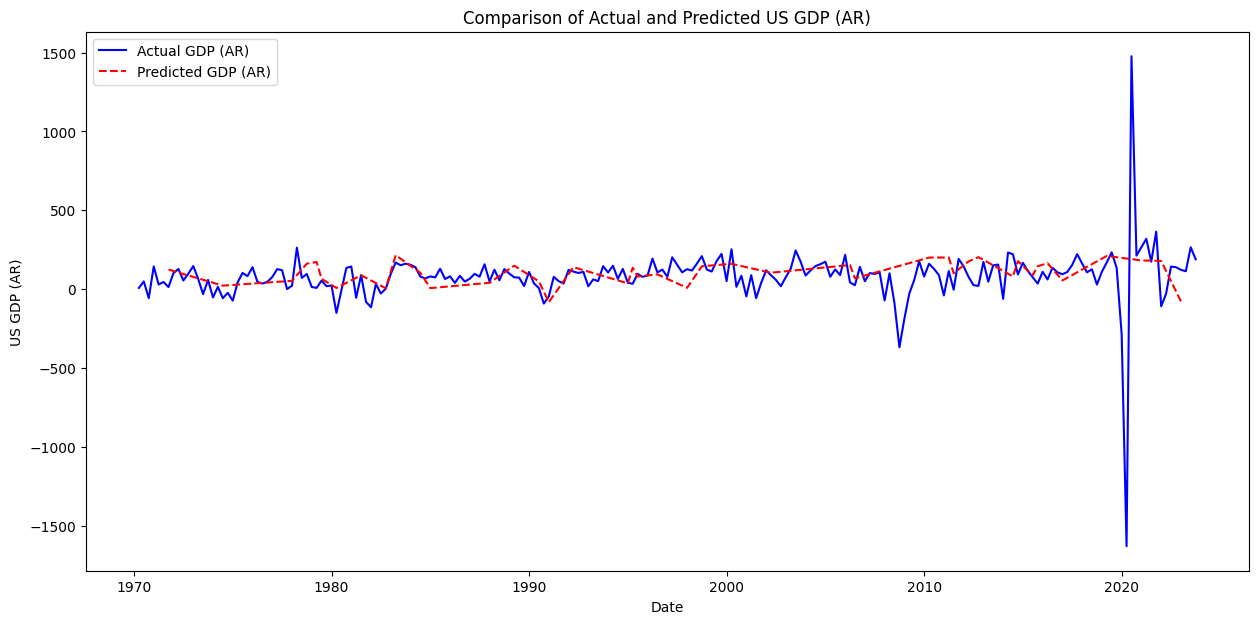

In [71]:
data_diff.sort_index(inplace=True) 

X = data_diff[['US unemployment', 'US 10-YEAR TREASURY BONDS YIELD', 'Non-Farm', 'US CPI',
               'US PERSONAL CURRENT TAXES (AR)', 'US CURRENT ACCOUNT BALANCE']]
y = data_diff['US GDP (AR)']
X = sm.add_constant(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Sort the test data by index, creating a copy to avoid SettingWithCopyWarning
X_test = X_test.sort_index().copy()  
y_test = y_test.loc[X_test.index]  


model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())


y_pred_test = results.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print("Mean Squared Error (MSE) on Test Set: {:.2f}".format(mse))
print("Mean Absolute Error (MAE) on Test Set: {:.2f}".format(mae))


plt.figure(figsize=(15, 7))
plt.plot(data_diff.index, y, label='Actual GDP (AR)', color='blue') 
plt.plot(X_test.index, y_pred_test, label='Predicted GDP (AR)', linestyle='--', color='red')  
plt.title('Comparison of Actual and Predicted US GDP (AR)')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.show()


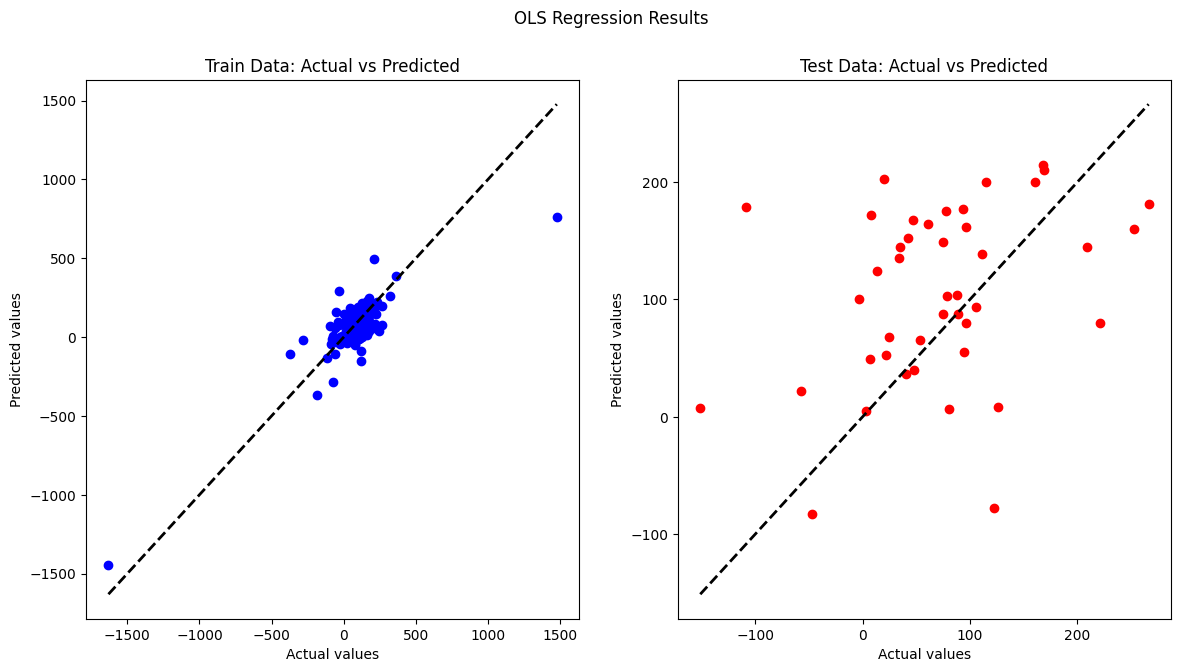

In [72]:
y_test_pred = results.predict(X_test)
y_train_pred = results.predict(X_train)

# Training data plot
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Line for perfect prediction
plt.title('Train Data: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Testing data plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(y_test, y_test_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect prediction
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.suptitle('OLS Regression Results')
plt.show()


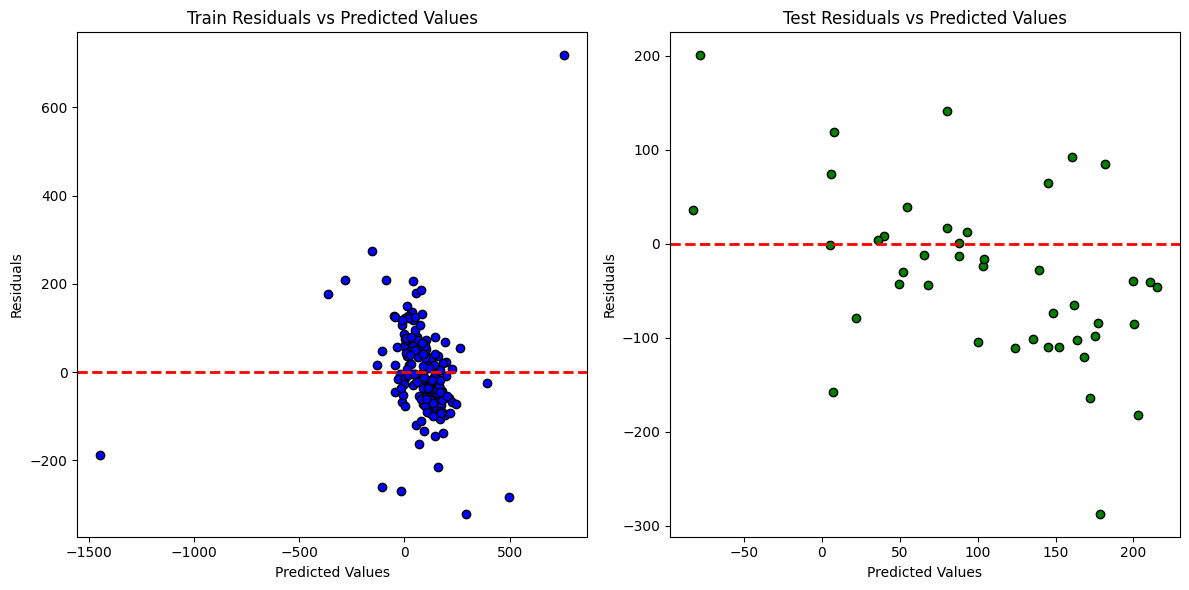

In [73]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plotting the residuals for the training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_train_pred, train_residuals, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Train Residuals vs Predicted Values')

# Plotting the residuals for the testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(y_test_pred, test_residuals, color='green', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Residuals vs Predicted Values')

plt.tight_layout()
plt.show()


## Non-Optimality of Single Split Linear Regression in Time Series

- **Ignoring Temporal Dependencies**:
    Linear regression models inherently assume independence between observations. This assumption does not hold in time series data where current values are often dependent on previous values. Ignoring these temporal dependencies can lead to biased estimates and forecasts that don't capture the underlying dynamics of the series.

- **Vulnerability to Overfitting**:
    Using a single train-test split, the model is only validated on one subset of the data. This setup increases the risk of overfitting, where the model performs well on the train and specific test set but may perform poorly on new, unseen data. This is especially problematic in time series data where structural breaks, seasonality, or other underlying changes can impact model performance significantly.

- **Limited Data Utilization**:
    Time series data are often limited in scope (covering specific periods), and a single split approach may not utilize the data efficiently. A significant portion of data used solely for training or testing can skew the results and give an incomplete picture of model performance across different time periods.

## Residuals Analysis: Interpretation and Insights

### Train Residuals vs Predicted Values:
- **Scatter Pattern**: The residuals scatter around the zero line, indicating randomness, which is desirable.
- **Spread**: Appears consistent, suggesting constant variance (homoscedasticity).
- **Outliers**: A few points significantly deviate, particularly one far above the others. These could influence the model's accuracy.

### Test Residuals vs Predicted Values:
- **Scatter Pattern**: Shows more spread and slight curvature, suggesting potential non-linear relationships not captured by the model.
- **Spread**: The residuals are more dispersed for large negative predicted values, indicating potential heteroscedasticity or model misfit.
- **Model Performance**: The spread in residuals indicates potential overfitting or insufficient model complexity.



## Cross-Validation with and without Time Series 

Cross-validation is a critical method in evaluating the performance and robustness of machine learning models. It is useful in time series analysis, providing a robust framework to understand how well a model predicts future data based on historical trends. We will run Cross-Validation with random split and with taking into account the time series to see what model fits better. 

Taking into account the temporality and Cross-Validation are important for : 

1. Robustness Against Overfitting:
        - Problem with a single train-test split: Using a simple train-test split for evaluating a time series model can lead to models that perform exceptionally well on a specific subset of the data but fail to generalize to new, unseen data.
        - Solution via Time Series cross-validation: Time series cross-validation involves sequential splits that respect the chronological order of observations. This method prevents the model from seeing future data during training, mimicking real-world forecasting scenarios and reducing the risk of overfitting. The K-Fold method selects randomly the splits. 


2. More Reliable Performance Estimates:
        - Challenges with limited data: In time series, the quantity of data may be limited, and conventional random splits could lead to variability in model performance.
        - Comprehensive utilization of data: Cross-validation in time series uses each data point for both training and validation in a sequential manner, ensuring the model's performance is tested more uniformly across all available data. This provides a more stable and reliable estimate of the model’s predictive power.


3. Model Tuning:
        - Model selection: By providing a statistical framework to assess different models, cross-validation helps determine the most suitable model for forecasting based on historical data.


4. Statistical Efficiency:
        - Better use of data: Time series cross-validation leverages the entire dataset for both training and validation, iterating through time-ordered splits. This method is particularly advantageous for time series, where every data point contributes to understanding and predicting future trends.

However, taking into account the temporality suggests that the time influence the behaviour of the data, which would mean in our case that futur GDP cannot predict past GDP (and inversely).  In this study we will assess both methods using K-Fold and Time Series to see what model fits better and if Time Series have an effect on prediction. 

## Linear Regression with Cross-Validation with K-Fold 

R^2 for each split : [-0.716313005392617, -0.03750284636269141, -1.2810727329918246, 0.279245420945212, 0.3921148827316706]
R^2 adjusted for each split: [-1.0595756064711401, -0.24500341563522965, -1.7372872795901895, 0.13509450513425436, 0.2705378592780048]
Mean Squared Error: [9000.89284289543, 4845.635238484322, 9347.713579338293, 8444.55689176066, 76650.60229750066]
Mean Absolute Error: [74.01400949273595, 54.7196188277713, 70.4639927938456, 72.4025327936098, 138.25333453824786]
Average Mean Squared Error: 21657.880
Average Mean Absolute Error: 81.971


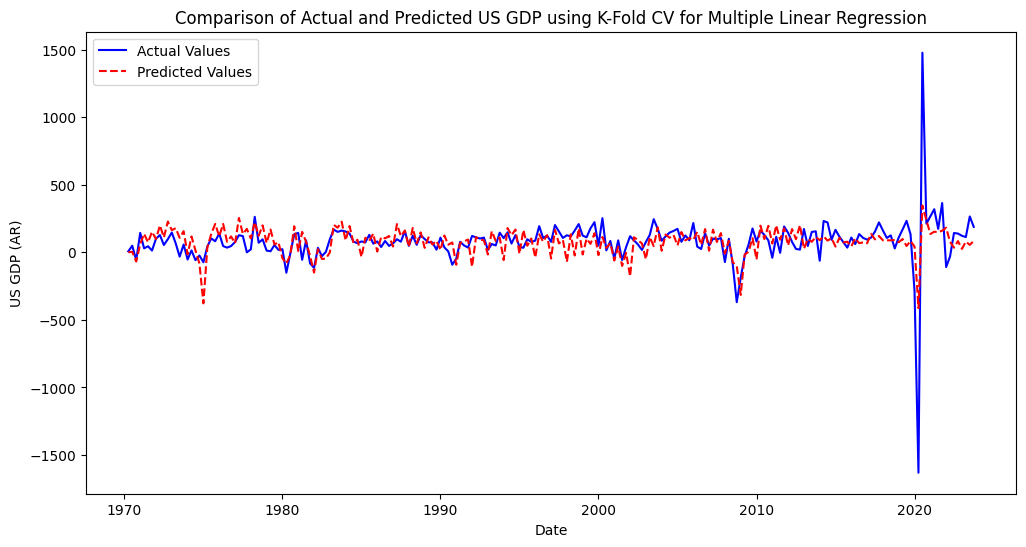

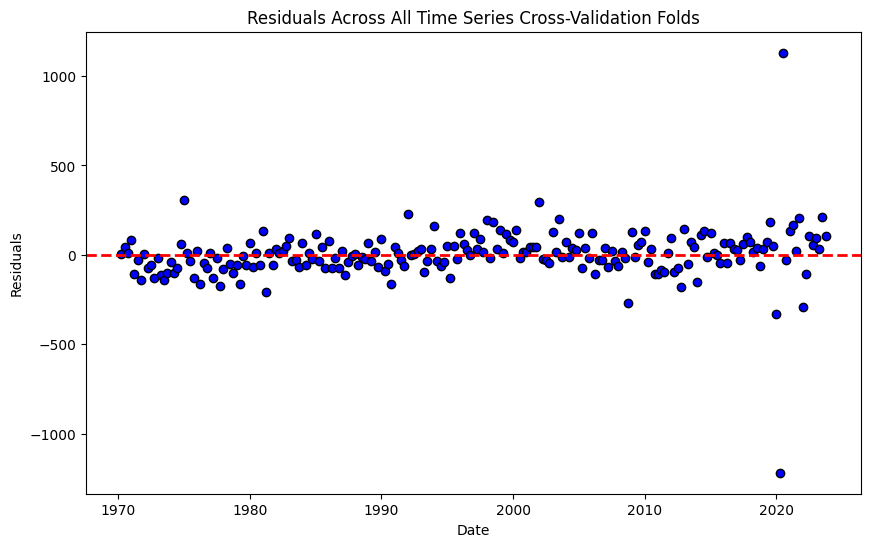

In [74]:
X = data_diff[['US unemployment', 'US 10-YEAR TREASURY BONDS YIELD', 'Non-Farm', 'US CPI',
               'US NOMINAL BROAD EFFECTIVE EXCH.RATE', 'US PERSONAL CURRENT TAXES (AR)', 
               'US CURRENT ACCOUNT BALANCE']]
y = data_diff['US GDP (AR)']
X = sm.add_constant(X) 
model = LinearRegression()

kf = KFold(n_splits=5)
#lists
mse_scores = []
mae_scores = []
residuals_list = []
r_squared = []
adjusted_r_squared = []
predicted_values = []
actual_values = []
dates_for_plot = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    dates_test = X_test.index

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicted_values.extend(y_pred)
    actual_values.extend(y_test)
    dates_for_plot.extend(dates_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse_scores.append(mse)
    mae_scores.append(mae)

    residuals = y_test - y_pred
    residuals_list.extend(residuals)


    SS_res = np.sum(residuals**2)
    SS_tot = np.sum((y_test - np.mean(y_test))**2)
    r2 = 1 - (SS_res / SS_tot)
    n = len(y_test)  
    p = X_train.shape[1] - 1  # number of predictors; adjust for constant
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    r_squared.append(r2)
    adjusted_r_squared.append(adj_r2)
    
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)


print("R^2 for each split :", r_squared)
print("R^2 adjusted for each split:", adjusted_r_squared)
print("Mean Squared Error:", (mse_scores))
print("Mean Absolute Error:", (mae_scores))
print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")

plt.figure(figsize=(12, 6))
plt.plot(dates_for_plot, actual_values, label='Actual Values', color='blue')
plt.plot(dates_for_plot, predicted_values, label='Predicted Values', linestyle='--', color='red')
plt.title('Comparison of Actual and Predicted US GDP using K-Fold CV for Multiple Linear Regression')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(dates_for_plot, residuals_list, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Across All Time Series Cross-Validation Folds')
plt.show()


## Linear Regression with Time Series (TS) Cross-Validation

R^2 for each split : [-0.16214539543730422, 0.25907089554534957, -0.5739447022084601, 0.19549897516122128, 0.4198926978869697]
R^2 adjusted for each split: [-0.4634423498099385, 0.06697816476081053, -0.982004439818061, -0.01307536461179537, 0.26949450845025824]
Mean Squared Error: [6998.791093216661, 2574.9445938884055, 8254.749079847874, 11351.129138605154, 88759.4193346955]
Mean Absolute Error: [68.334079146966, 41.914065321534764, 73.09499348056285, 74.06086233633373, 147.74018418363832]
Average Mean Squared Error: 23587.807
Average Mean Absolute Error: 81.029


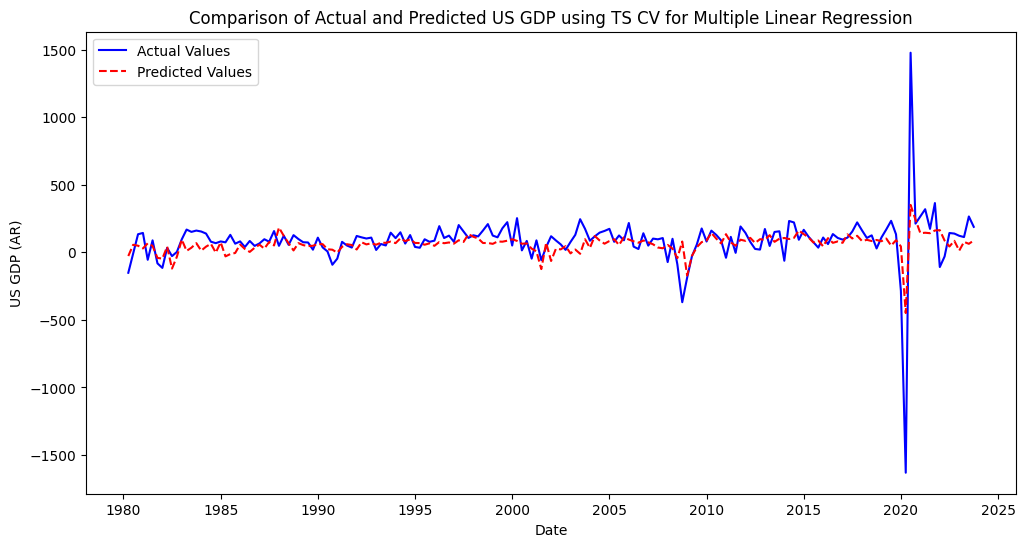

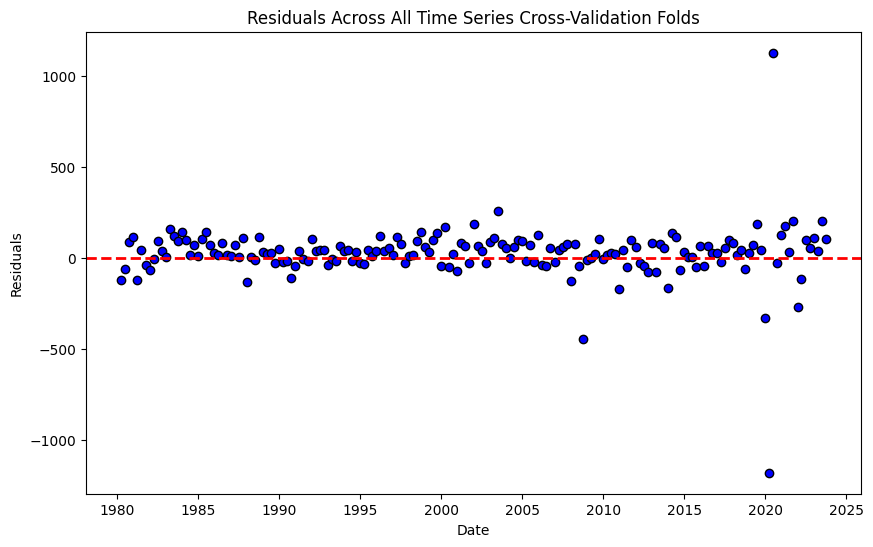

In [75]:
X = data_diff[['US unemployment', 'US 10-YEAR TREASURY BONDS YIELD', 'Non-Farm', 'US CPI',
               'US NOMINAL BROAD EFFECTIVE EXCH.RATE', 'US PERSONAL CURRENT TAXES (AR)', 
               'US CURRENT ACCOUNT BALANCE']]
y = data_diff['US GDP (AR)']
X = sm.add_constant(X)  

model = LinearRegression()

tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []
mae_scores = []
residuals_list = []
r_squared = []
adjusted_r_squared = []
predicted_values = []
actual_values = []
dates_for_plot = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    dates_test = X_test.index

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicted_values.extend(y_pred)
    actual_values.extend(y_test)
    dates_for_plot.extend(dates_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse_scores.append(mse)
    mae_scores.append(mae)

    residuals = y_test - y_pred
    residuals_list.extend(residuals)


    SS_res = np.sum(residuals**2)
    SS_tot = np.sum((y_test - np.mean(y_test))**2)
    r2 = 1 - (SS_res / SS_tot)
    n = len(y_test)  
    p = X_train.shape[1] - 1 
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    r_squared.append(r2)
    adjusted_r_squared.append(adj_r2)
    
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

print("R^2 for each split :", r_squared)
print("R^2 adjusted for each split:", adjusted_r_squared)
print("Mean Squared Error:", (mse_scores))
print("Mean Absolute Error:", (mae_scores))
print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")

plt.figure(figsize=(12, 6))
plt.plot(dates_for_plot, actual_values, label='Actual Values', color='blue')
plt.plot(dates_for_plot, predicted_values, label='Predicted Values', linestyle='--', color='red')
plt.title('Comparison of Actual and Predicted US GDP using TS CV for Multiple Linear Regression')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(dates_for_plot, residuals_list, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Across All Time Series Cross-Validation Folds')
plt.show()


## **Ridge and Lasso Regression**

### Ridge Regression
Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated. It introduces a penalty term to the loss function: the square of the magnitude of the coefficients multiplied by a factor alpha.

- **Alpha**: The strength of the regularization is controlled by the parameter `alpha`. A higher alpha value increases the smoothness or regularization of the resulting function, effectively reducing the variance of the predictions at the expense of introducing some bias. By penalizing large coefficients, Ridge regression helps reduce model complexity and multicollinearity.

- **Benefits**: Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient being zero. This shrinkage of the coefficients leads to a more robust model to overfitting.

- **Implementation in Code**: The model was trained, and predictions were made to calculate the Mean Squared Error (MSE) and Mean Absolute Error (MAE), providing metrics to evaluate model performance.

$$
\text{Ridge Loss} = \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

where:
- $ y_i $ is the actual value of the target variable at time \( i \)
- $ \beta_0$ is the intercept term.
- $\beta_j$ are the coefficients for the \( j \)-th feature.
- $x_{ij}$ are the feature values at time \( i \) (`US unemployment`, `US 10-YEAR TREASURY BONDS YIELD`, etc.).
- $\lambda$ is the regularization parameter that controls the strength of the penalty.


### Lasso Regression
Lasso (Least Absolute Shrinkage and Selection Operator) regression is a type of linear regression that uses shrinkage. Like Ridge regression, Lasso introduces a penalty to the loss function, but it uses the absolute values of the coefficients (L1 norm) instead of squares (L2 norm). This difference allows Lasso to not only penalize high values of the coefficients but also effectively perform variable selection.

- **Alpha**: Similar to Ridge, the `alpha` parameter in Lasso controls the degree of strength of the regularization. A higher `alpha` value leads to fewer variables being included in the model.

- **Benefits**: The primary attribute of Lasso regression is its ability to produce sparse models – models with fewer parameters. Certain coefficients can become exactly zero, which is equivalent to the particular feature being excluded from the model. Therefore, Lasso can also be seen as a method for feature selection.

- **Implementation in Code**: After fitting the model on the training data and making predictions on the test set, we computed the MSE and MAE to assess its accuracy and robustness.

$$
\text{Lasso Loss} = \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

where:
- $ y_i $ is the actual value of the target variable at time \( i \) (e.g., `US GDP (AR)`).
- $ \beta_0$ is the intercept term.
- $\beta_j$ are the coefficients for the \( j \)-th feature.
- $x_{ij}$ are the feature values at time \( i \) (e.g., `US unemployment`, `US 10-YEAR TREASURY BONDS YIELD`, etc.).
- $\lambda$ is the regularization parameter that controls the strength of the penalty.


In [76]:
## Be careful with this code !! It uses the last X_train and y_train, so run the first one not last**

Ridge Mean Squared Error: 88425.7735715129
Ridge Mean Absolute Error: 147.31271924319253
Ridge R-squared: 0.4220733153920422
Ridge Adjusted R-squared: 0.24424972012805513
Lasso Mean Squared Error: 87817.52644671295
Lasso Mean Absolute Error: 146.4267414017351
Lasso R-squared: 0.4260486523335242
Lasso Adjusted R-squared: 0.24944823766691626


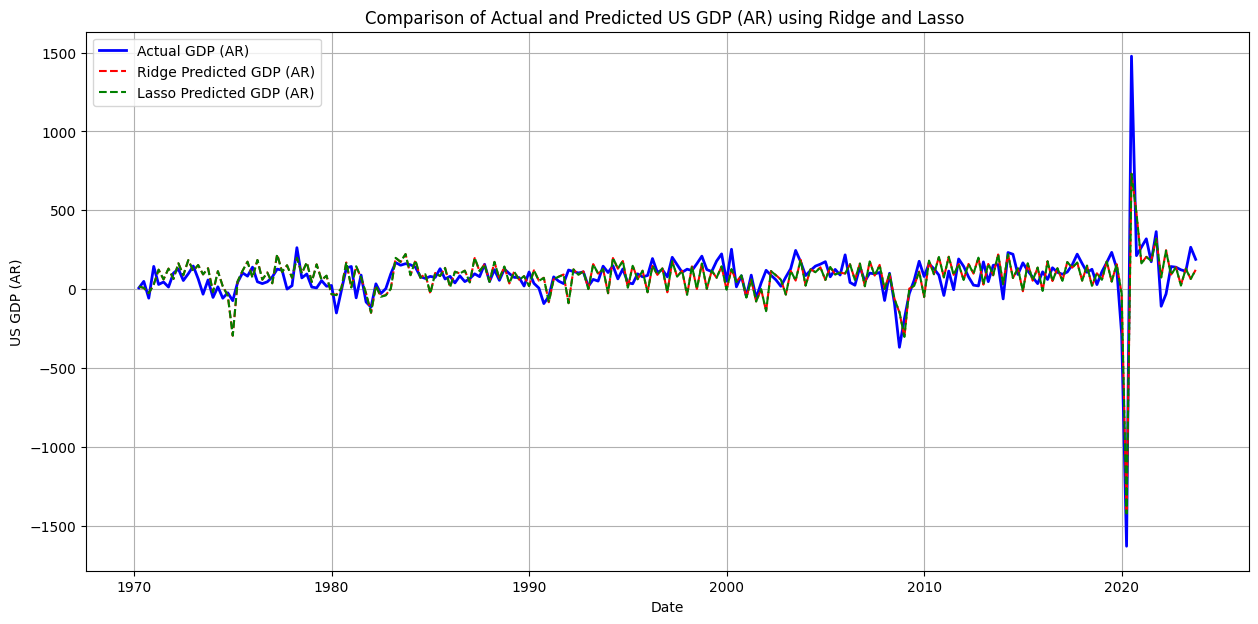

In [77]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
adj_r2_ridge = 1 - (1-r2_ridge) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
adj_r2_lasso = 1 - (1-r2_lasso) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Ridge Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge R-squared:", r2_ridge)
print("Ridge Adjusted R-squared:", adj_r2_ridge)
print("Lasso Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso R-squared:", r2_lasso)
print("Lasso Adjusted R-squared:", adj_r2_lasso)

ridge_model.fit(X, y)
lasso_model.fit(X, y)

# Predict on the entire dataset
full_pred_ridge = ridge_model.predict(X)
full_pred_lasso = lasso_model.predict(X)

# Create results DataFrame with predictions and actuals for the entire dataset
results_df = pd.DataFrame({
    'Actual GDP (AR)': y,
    'Ridge Predicted GDP (AR)': full_pred_ridge,
    'Lasso Predicted GDP (AR)': full_pred_lasso
}, index=y.index)  # Ensure to use the original index to preserve date information

# Plotting results for the entire dataset
plt.figure(figsize=(15, 7))
plt.plot(results_df['Actual GDP (AR)'], label='Actual GDP (AR)', color='blue', linewidth=2)
plt.plot(results_df['Ridge Predicted GDP (AR)'], label='Ridge Predicted GDP (AR)', linestyle='--', color='red')
plt.plot(results_df['Lasso Predicted GDP (AR)'], label='Lasso Predicted GDP (AR)', linestyle='--', color='green')
plt.title('Comparison of Actual and Predicted US GDP (AR) using Ridge and Lasso ')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.grid(True)
plt.show()


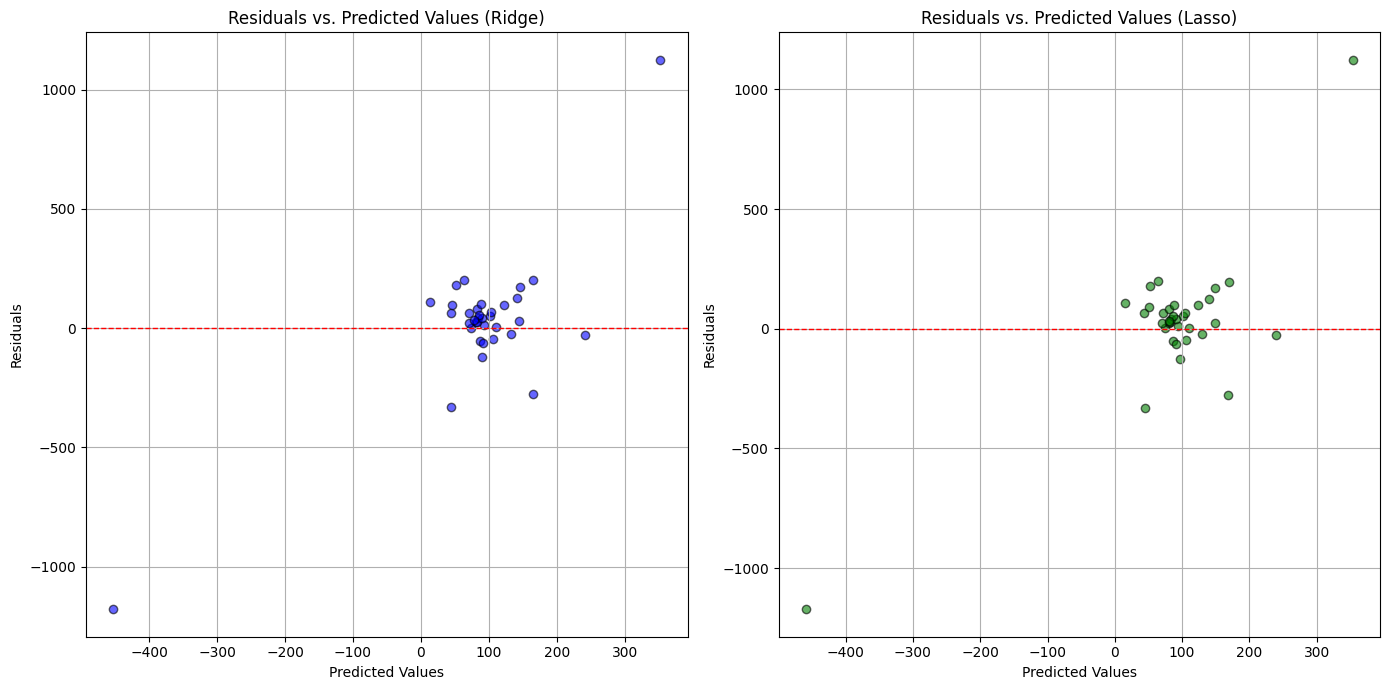

In [78]:
residuals_ridge = y_test - y_pred_ridge

residuals_lasso = y_test - y_pred_lasso

# Plotting residuals for both models
plt.figure(figsize=(14, 7))

# Subplot for Ridge residuals
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_pred_ridge, residuals_ridge, color='blue', edgecolor='k', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Predicted Values (Ridge)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Subplot for Lasso residuals
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(y_pred_lasso, residuals_lasso, color='green', edgecolor='k', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Predicted Values (Lasso)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()


## Residual Analysis for Ridge and Lasso Regression Models

- **Ridge Regression Observations**:
  - Residuals are generally clustered around zero, indicating adequate predictions for many observations.
  - There are significant outliers suggesting some predictions with large errors, which might indicate influential data points not well-handled by the model.

- **Lasso Regression Observations**:
  - Residuals show a similar clustering around zero compared to Ridge, implying prediction accuracy and model stability.
  - Outliers are similar to Ridge model.


## Ridge and Lasso Cross-Validation without Time Series

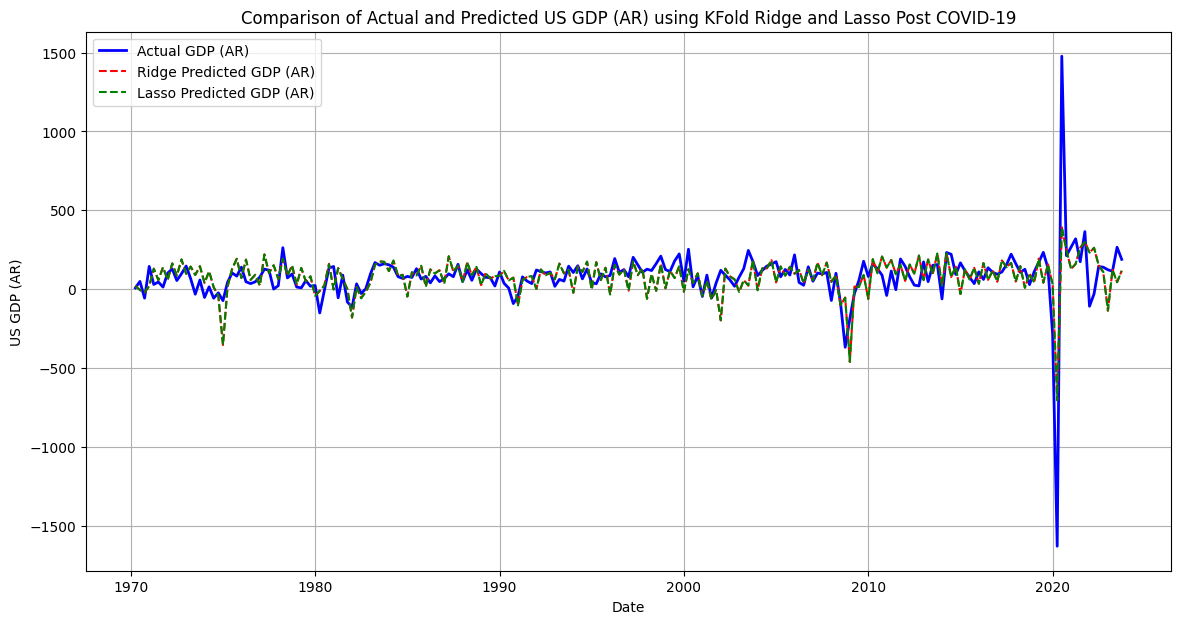

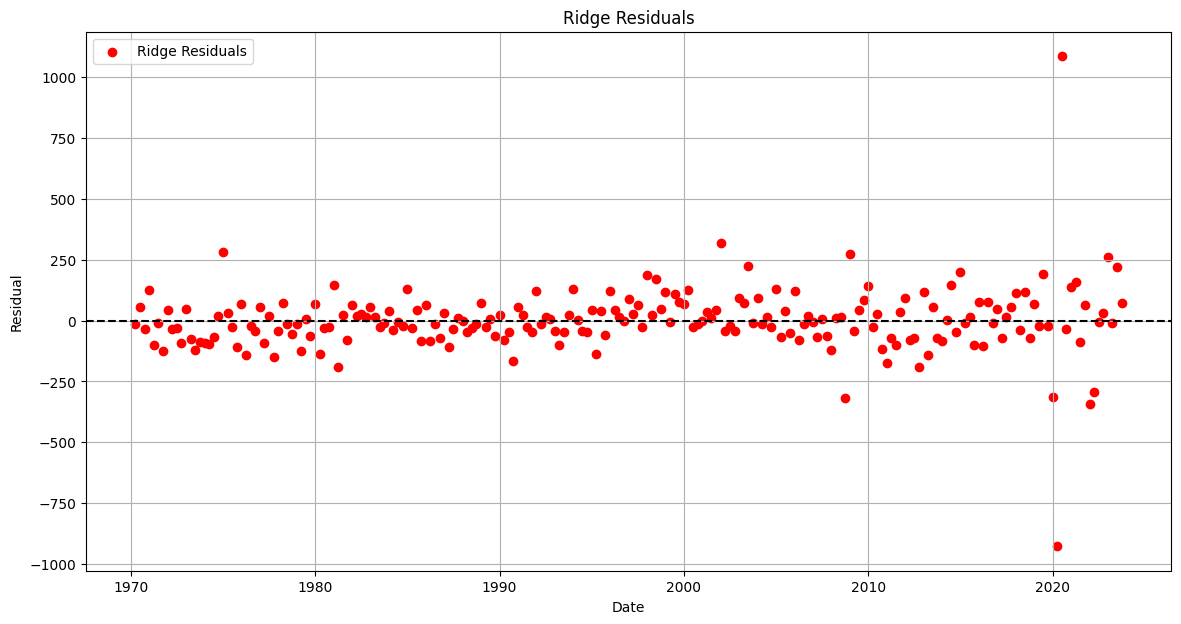

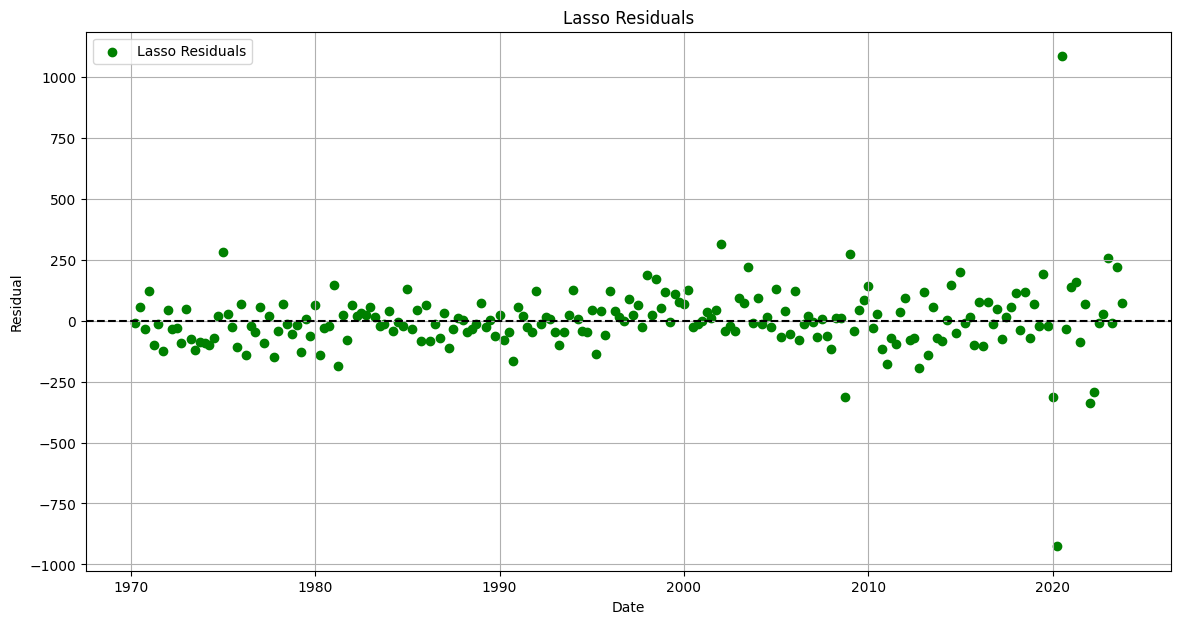

Ridge - Mean Squared Error: [11303.014977494147, 5689.003680106159, 12812.909890552366, 7514.351360268609, 57225.51151665405]
Ridge - Mean Absolute Error: [74.30158250674907, 59.84307051967356, 82.51610263003757, 69.49617754516396, 116.72545400596162]
Ridge - R-squared: [-0.29066466432485316, -0.009709314612168729, -0.6363787834476253, -0.19059699381793616, 0.5429252653899956]
Ridge - Adjusted R-squared: [-0.5487975971898238, -0.21165117753460239, -0.9636545401371504, -0.4287163925815234, 0.45151031846799483]
Average Ridge Mean Squared Error: 18908.958
Average Ridge Mean Absolute Error: 80.576
---------------------------------------
Lasso - Mean Squared Error: [11175.68165890897, 5697.952069492484, 12724.627511862811, 7531.534349583841, 57246.80638223674]
Lasso - Mean Absolute Error: [74.16847158310853, 60.035993558005295, 82.22524402628063, 69.60957622172172, 116.82812101151423]
Lasso - R-squared: [-0.27612477251577916, -0.011297513991568753, -0.625103951057959, -0.19331951961459892, 

In [79]:
X = data_diff[['US unemployment', 'US 10-YEAR TREASURY BONDS YIELD', 'Non-Farm', 'US CPI',
               'US NOMINAL BROAD EFFECTIVE EXCH.RATE', 'US PERSONAL CURRENT TAXES (AR)', 
               'US CURRENT ACCOUNT BALANCE']].values
y = data_diff['US GDP (AR)'].values


kf = KFold(n_splits=5, shuffle=True) # usage of shuffle mix the data before the split and somehow it works way better

ridge = Ridge(alpha=10)
lasso = Lasso(alpha=1)

ridge_mse, lasso_mse = [], []
ridge_mae, lasso_mae = [], []
ridge_r2, lasso_r2 = [], []
ridge_adj_r2, lasso_adj_r2 = [], []
ridge_predictions, lasso_predictions = [], []
actuals = []
test_dates = []
ridge_residuals, lasso_residuals = [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    test_dates.extend(data_diff.index[test_index].tolist())

    # Fit and predict with Ridge
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_predictions.extend(y_pred_ridge)

    # Fit and predict with Lasso
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_predictions.extend(y_pred_lasso)

    actuals.extend(y_test)

    # Calculate metrics for Ridge
    ridge_mse.append(mean_squared_error(y_test, y_pred_ridge))
    ridge_mae.append(mean_absolute_error(y_test, y_pred_ridge))
    ridge_r2_val = r2_score(y_test, y_pred_ridge)
    ridge_r2.append(ridge_r2_val)
    n, p = len(y_test), X_test.shape[1]
    ridge_adj_r2.append(1 - (1 - ridge_r2_val) * (n - 1) / (n - p - 1))

    # Calculate metrics for Lasso
    lasso_mse.append(mean_squared_error(y_test, y_pred_lasso))
    lasso_mae.append(mean_absolute_error(y_test, y_pred_lasso))
    lasso_r2_val = r2_score(y_test, y_pred_lasso)
    lasso_r2.append(lasso_r2_val)
    lasso_adj_r2.append(1 - (1 - lasso_r2_val) * (n - 1) / (n - p - 1))

    # Calculate and store residuals
    ridge_residuals.extend(y_test - y_pred_ridge)
    lasso_residuals.extend(y_test - y_pred_lasso)

# Convert lists to arrays for plotting
actuals = np.array(actuals)
ridge_predictions = np.array(ridge_predictions)
lasso_predictions = np.array(lasso_predictions)
test_dates = np.array(test_dates)
ridge_residuals_array = np.array(ridge_residuals)
lasso_residuals_array = np.array(lasso_residuals)

# Sort by date 
sorted_indices = np.argsort(test_dates)
actuals = actuals[sorted_indices]
ridge_predictions = ridge_predictions[sorted_indices]
lasso_predictions = lasso_predictions[sorted_indices]
test_dates = test_dates[sorted_indices]
ridge_residuals_array = ridge_residuals_array[sorted_indices]
lasso_residuals_array = lasso_residuals_array[sorted_indices]

avg_ridge_mse = np.mean(ridge_mse)
avg_ridge_mae = np.mean(ridge_mae)

avg_lasso_mse = np.mean(lasso_mse)
avg_lasso_mae = np.mean(lasso_mae)


# Plotting actual vs. predicted GDP values
plt.figure(figsize=(14, 7))
plt.plot(test_dates, actuals, label='Actual GDP (AR)', color='blue', linewidth=2)
plt.plot(test_dates, ridge_predictions, label='Ridge Predicted GDP (AR)', linestyle='--', color='red')
plt.plot(test_dates, lasso_predictions, label='Lasso Predicted GDP (AR)', linestyle='--', color='green')
plt.title('Comparison of Actual and Predicted US GDP (AR) using KFold Ridge and Lasso Post COVID-19')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Ridge residuals
plt.figure(figsize=(14, 7))
plt.scatter(test_dates, ridge_residuals_array, label='Ridge Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Ridge Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

# Plot Lasso residuals
plt.figure(figsize=(14, 7))
plt.scatter(test_dates, lasso_residuals_array, label='Lasso Residuals', color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Lasso Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()


print("Ridge - Mean Squared Error:", (ridge_mse))
print("Ridge - Mean Absolute Error:", (ridge_mae))
print("Ridge - R-squared:", (ridge_r2))
print("Ridge - Adjusted R-squared:", (ridge_adj_r2))
print(f"Average Ridge Mean Squared Error: {avg_ridge_mse:.3f}")
print(f"Average Ridge Mean Absolute Error: {avg_ridge_mae:.3f}")

print('---------------------------------------')
print("Lasso - Mean Squared Error:", (lasso_mse))
print("Lasso - Mean Absolute Error:", (lasso_mae))
print("Lasso - R-squared:", (lasso_r2))
print("Lasso - Adjusted R-squared:", (lasso_adj_r2))
print(f"Average Lasso Mean Squared Error: {avg_lasso_mse:.3f}")
print(f"Average Lasso Mean Absolute Error: {avg_lasso_mae:.3f}")

## Ridge and Lasso Cross-Validation with Time Series

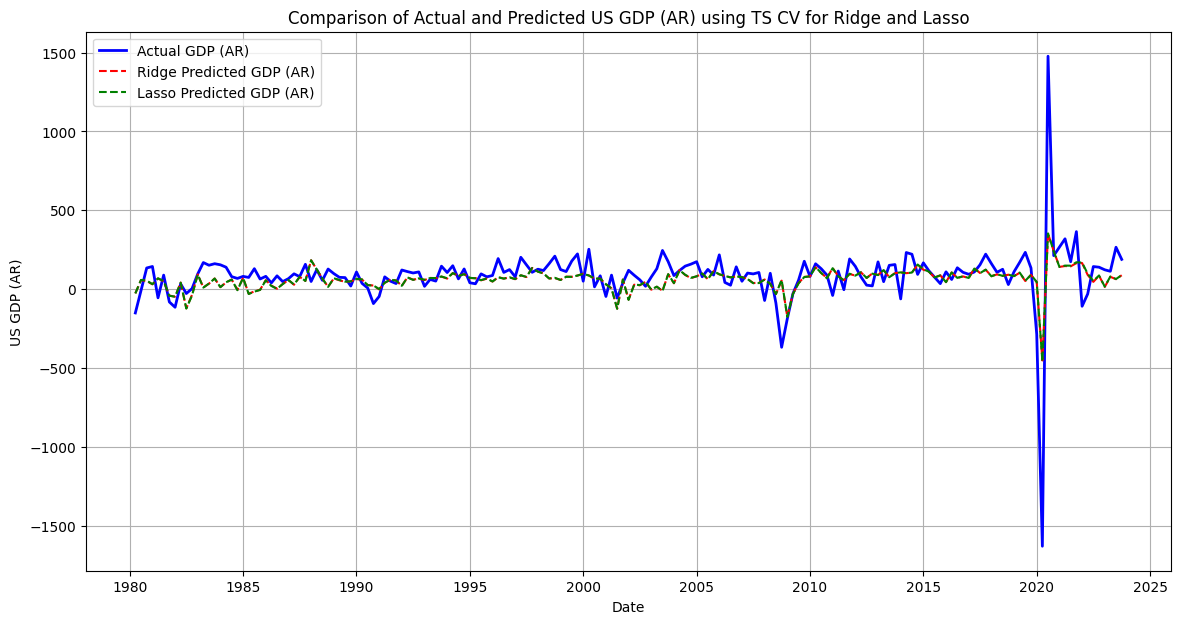

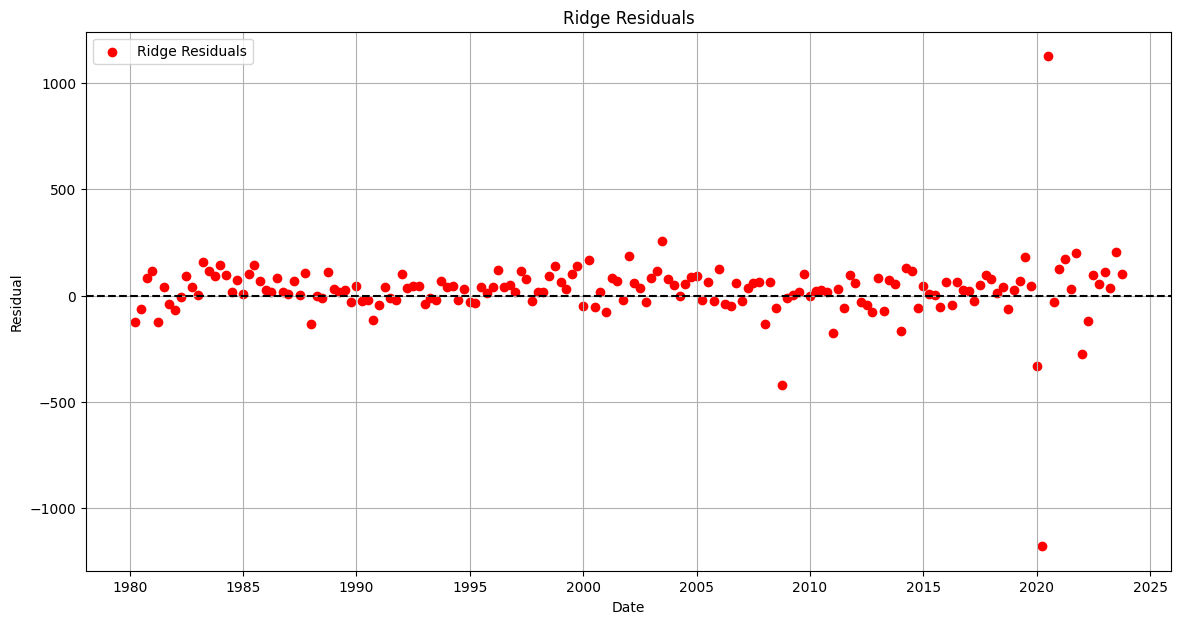

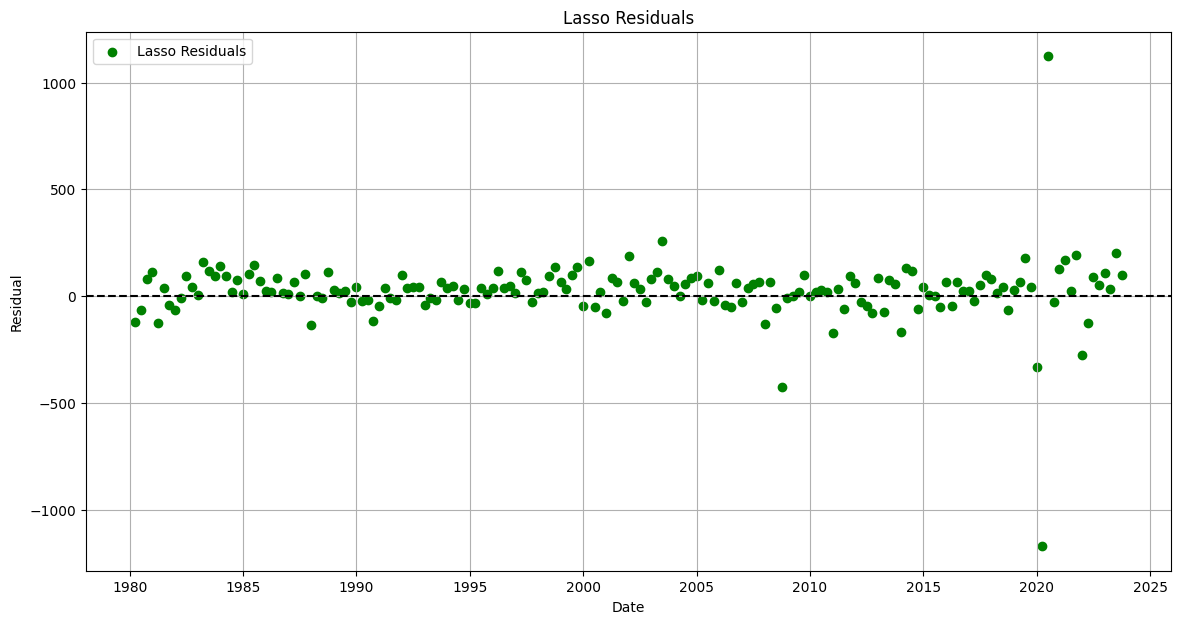

Ridge - Mean Squared Error: [7025.8146050368505, 2637.763267903275, 8281.098941202159, 10670.786135599556, 88425.7735715129]
Ridge - Mean Absolute Error: [68.63905693005432, 42.43236250698999, 73.20372800017518, 72.86384927949462, 147.31271924319253]
Ridge - R-squared: [-0.16663263464934697, 0.24099509539363462, -0.5789688676048079, 0.2437176709822746, 0.4220733153920422]
Ridge - Adjusted R-squared: [-0.46909294733621465, 0.04421604605124352, -0.9883311666134618, 0.047644474570271655, 0.2722404712344235]
Average Ridge Mean Squared Error: 23408.247
Average Ridge Mean Absolute Error: 80.890
----------------------------------
Lasso - Mean Squared Error: [7062.229122621119, 2617.320567832012, 8286.763793852702, 10811.647447285364, 87817.52644671295]
Lasso - Mean Absolute Error: [69.0145438599326, 42.087568247228255, 73.099256245917, 73.31679891492705, 146.4267414017351]
Lasso - R-squared: [-0.17267924518164968, 0.24687739340206016, -0.5800489930855304, 0.2337342527489329, 0.426048652333524

In [80]:
X = data_diff[['US unemployment', 'US 10-YEAR TREASURY BONDS YIELD', 'Non-Farm', 'US CPI',
               'US NOMINAL BROAD EFFECTIVE EXCH.RATE', 'US PERSONAL CURRENT TAXES (AR)', 
               'US CURRENT ACCOUNT BALANCE']].values
y = data_diff['US GDP (AR)'].values

tscv = TimeSeriesSplit(n_splits=5)

# Initialize Ridge and Lasso regression models
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=1)

# Prepare to collect residuals, metrics, predictions, and dates for plots
ridge_residuals, lasso_residuals = [], []
ridge_mse, lasso_mse, ridge_mae, lasso_mae = [], [], [], []
ridge_r2, lasso_r2, ridge_adj_r2, lasso_adj_r2 = [], [], [], []
ridge_predictions, lasso_predictions = [], []
actuals, dates_for_plot = [], []

# Perform time series cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit and predict with Ridge
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_predictions.extend(y_pred_ridge)
    actuals.extend(y_test)
    dates_for_plot.extend(data_diff.iloc[test_index].index)  # Assuming data_diff index contains dates

    # Ridge residuals and metrics
    residuals_ridge = y_test - y_pred_ridge
    ridge_residuals.append(residuals_ridge)
    ridge_mse.append(mean_squared_error(y_test, y_pred_ridge))
    ridge_mae.append(mean_absolute_error(y_test, y_pred_ridge))
    ridge_r2.append(r2_score(y_test, y_pred_ridge))
    n, p = len(y_test), X_test.shape[1]
    ridge_adj_r2.append(1 - (1 - ridge_r2[-1]) * (n - 1) / (n - p - 1))

    # Fit and predict with Lasso
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_predictions.extend(y_pred_lasso)

    # Lasso residuals and metrics
    residuals_lasso = y_test - y_pred_lasso
    lasso_residuals.append(residuals_lasso)
    lasso_mse.append(mean_squared_error(y_test, y_pred_lasso))
    lasso_mae.append(mean_absolute_error(y_test, y_pred_lasso))
    lasso_r2.append(r2_score(y_test, y_pred_lasso))
    lasso_adj_r2.append(1 - (1 - lasso_r2[-1]) * (n - 1) / (n - p - 1))
avg_ridge_mse = np.mean(ridge_mse)
avg_ridge_mae = np.mean(ridge_mae)

avg_lasso_mse = np.mean(lasso_mse)
avg_lasso_mae = np.mean(lasso_mae)

# Plotting actual vs. predicted GDP values
plt.figure(figsize=(14, 7))
plt.plot(dates_for_plot, actuals, label='Actual GDP (AR)', color='blue', linewidth=2)
plt.plot(dates_for_plot, ridge_predictions, label='Ridge Predicted GDP (AR)', linestyle='--', color='red')
plt.plot(dates_for_plot, lasso_predictions, label='Lasso Predicted GDP (AR)', linestyle='--', color='green')
plt.title('Comparison of Actual and Predicted US GDP (AR) using TS CV for Ridge and Lasso')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.grid(True)
plt.show()
ridge_residuals_array = np.concatenate(ridge_residuals)
lasso_residuals_array = np.concatenate(lasso_residuals)

# Plot Ridge residuals
plt.figure(figsize=(14, 7))
plt.scatter(dates_for_plot, ridge_residuals_array, label='Ridge Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Ridge Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

# Plot Lasso residuals
plt.figure(figsize=(14, 7))
plt.scatter(dates_for_plot, lasso_residuals_array, label='Lasso Residuals', color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Lasso Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()
avg_ridge_mse = np.mean(ridge_mse)
avg_ridge_mae = np.mean(ridge_mae)

avg_lasso_mse = np.mean(lasso_mse)
avg_lasso_mae = np.mean(lasso_mae)


print("Ridge - Mean Squared Error:", (ridge_mse))
print("Ridge - Mean Absolute Error:", (ridge_mae))
print("Ridge - R-squared:", (ridge_r2))
print("Ridge - Adjusted R-squared:", (ridge_adj_r2))
print(f"Average Ridge Mean Squared Error: {avg_ridge_mse:.3f}")
print(f"Average Ridge Mean Absolute Error: {avg_ridge_mae:.3f}")
print('----------------------------------')
print("Lasso - Mean Squared Error:", (lasso_mse))
print("Lasso - Mean Absolute Error:", (lasso_mae))
print("Lasso - R-squared:", (lasso_r2))
print("Lasso - Adjusted R-squared:", (lasso_adj_r2))
print(f"Average Lasso Mean Squared Error: {avg_lasso_mse:.3f}")
print(f"Average Lasso Mean Absolute Error: {avg_lasso_mae:.3f}")

### Residual Analysis for Ridge and Lasso Regression

#### Observations from the Residual Plots:

- **Ridge Residuals:**
  - The Ridge residuals appear relatively centered around zero, indicating that the model does not systematically overestimate or underestimate across all folds.
  - There is a visible spread in the residuals, but no clear patterns or trends, suggesting that the Ridge model deals fairly consistently with the variance in the data. However, the presence of several outliers indicates potential leverage points or instances where the model fails to capture the underlying pattern adequately.


- **Lasso Residuals:**
  - Similar to Ridge



## **Polynomial Regression Model Explanation**

### Polynomial Transformation
Using `PolynomialFeatures` with `degree=2`, we transform these features into a new feature set that includes:
- All linear terms (e.g., US unemployment)
- All possible interactions between the features up to the second degree (e.g., US unemployment * US CPI)
- All squared and cubed terms (e.g., US unemployment^2)

### Algebraic Model Formulation
The polynomial regression model can be described by the following equation:

$$
 GDP = \beta_0 + \beta_1 \cdot \text{US unemployment} + \beta_2 \cdot \text{US 10-YEAR TREASURY BONDS YIELD} + \ldots + \beta_n \cdot \text{Interaction Terms} + \epsilon 
$$
Where:
- $\beta_0, \beta_1, \ldots, \beta_n$ are the model coefficients.
- Interaction terms include products of different features (e.g., $ \text{US unemployment} \times \text{US 10-YEAR TREASURY BONDS YIELD} $).
- $\epsilon$ is the error term.

### Feature Names and Model Coefficients
Each term in the model corresponds to a feature created by the polynomial transformation. For example:
- `1` corresponds to the intercept $ \beta_0$.
- `US unemployment` corresponds to $ \beta_1$ .
- Higher degree terms and interactions have their respective coefficients which capture more complex dependencies in the data.

By fitting this model, we assess how well these predictors explain the variance in U.S. GDP, considering both individual effects and their interactions up to the second degree.

#### In these Regressions we will not go through every step like previously but rather focus on the Cross-Validation method. The reason is that the latter method is more robust and representative. 


                            OLS Regression Results                            
Dep. Variable:            US GDP (AR)   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     23.61
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.97e-42
Time:                        22:29:31   Log-Likelihood:                -977.21
No. Observations:                 172   AIC:                             2026.
Df Residuals:                     136   BIC:                             2140.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.7831     19.921      3.804      0.0

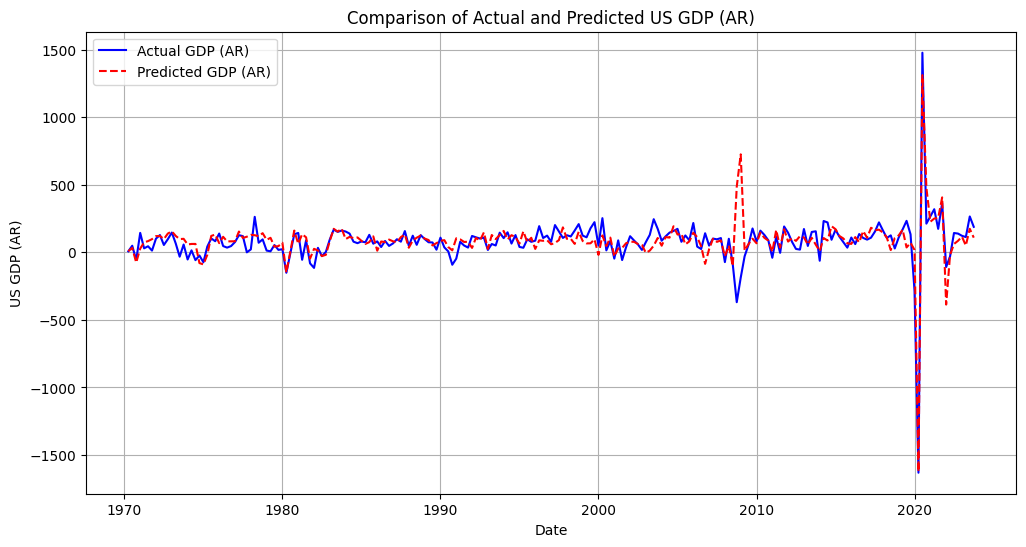

Mean Squared Error (MSE): 42161.63331578796
Mean Absolute Error (MAE): 94.82979022286978


In [81]:
data_diff.dropna(inplace=True)

X = data_diff[['US unemployment', 'US 10-YEAR TREASURY BONDS YIELD', 'Non-Farm', 'US CPI',
               'US NOMINAL BROAD EFFECTIVE EXCH.RATE', 'US PERSONAL CURRENT TAXES (AR)', 
               'US CURRENT ACCOUNT BALANCE']]

y = data_diff['US GDP (AR)']

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Add a constant to the model (the intercept)
X_poly = sm.add_constant(X_poly)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

# Creating a linear regression model using statsmodels
model = sm.OLS(y_train, X_train)
results = model.fit()

# Predictions across the entire dataset for a comprehensive line
y_pred_full = results.predict(X_poly)

# Sorting the data by index for coherent plotting (if the index is date or sequential)
sorted_idx = np.argsort(data_diff.index)
sorted_dates = data_diff.index[sorted_idx]
sorted_y = y.iloc[sorted_idx]
sorted_y_pred = y_pred_full[sorted_idx]
print(results.summary())

plt.figure(figsize=(12, 6))
plt.plot(sorted_dates, sorted_y, label='Actual GDP (AR)', color='blue')
plt.plot(sorted_dates, sorted_y_pred, label='Predicted GDP (AR)', color='red', linestyle='--')
plt.title('Comparison of Actual and Predicted US GDP (AR)')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.grid(True)
plt.show()

# Displaying MSE and MAE for test set
mse = mean_squared_error(y_test, results.predict(X_test))
mae = mean_absolute_error(y_test, results.predict(X_test))

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)



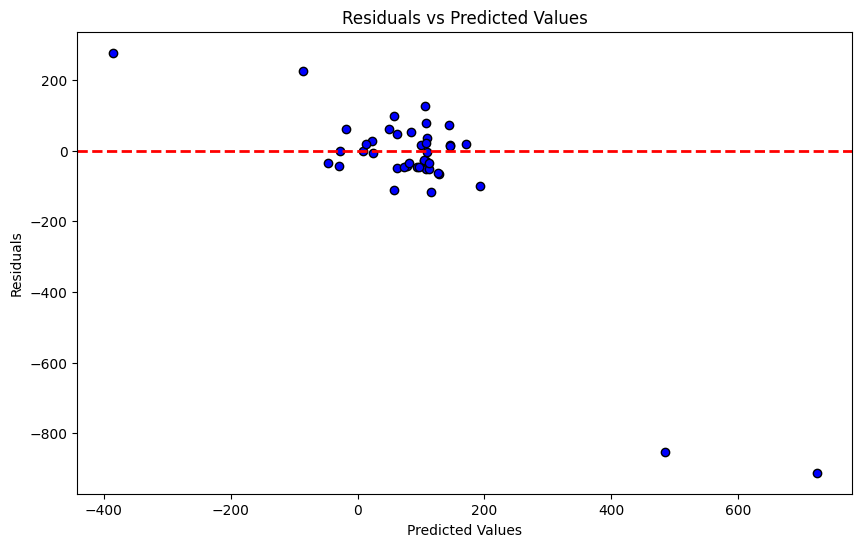

In [82]:
residuals = y_test - results.predict(X_test)

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(results.predict(X_test), residuals, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


## VIF Results 

In [83]:
features = ['US unemployment', 'US 10-YEAR TREASURY BONDS YIELD', 'Non-Farm', 'US CPI',
            'US NOMINAL BROAD EFFECTIVE EXCH.RATE', 'US PERSONAL CURRENT TAXES (AR)', 
            'US CURRENT ACCOUNT BALANCE']

X_original = data_diff[features]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_original)

if hasattr(poly, 'get_feature_names_out'):
    column_names = poly.get_feature_names_out(features)
else:
    column_names = poly.get_feature_names(features)

X_poly_df = pd.DataFrame(X_poly, columns=column_names)

X_poly_df = add_constant(X_poly_df)

# Calculate VIF for each polynomial feature
vif_data_poly = pd.DataFrame()
vif_data_poly["Variable"] = X_poly_df.columns
vif_data_poly["VIF"] = [variance_inflation_factor(X_poly_df.values, i) for i in range(X_poly_df.shape[1])]

print(vif_data_poly)


                                             Variable         VIF
0                                                   1    0.000000
1                                     US unemployment   10.535607
2                     US 10-YEAR TREASURY BONDS YIELD    7.551116
3                                            Non-Farm    7.700461
4                                              US CPI   10.076907
5                US NOMINAL BROAD EFFECTIVE EXCH.RATE    5.485075
6                      US PERSONAL CURRENT TAXES (AR)   11.941882
7                          US CURRENT ACCOUNT BALANCE    5.866649
8                                   US unemployment^2  248.144824
9     US unemployment US 10-YEAR TREASURY BONDS YIELD    8.485754
10                           US unemployment Non-Farm  110.102537
11                             US unemployment US CPI   29.929560
12  US unemployment US NOMINAL BROAD EFFECTIVE EXC...   16.733232
13     US unemployment US PERSONAL CURRENT TAXES (AR)   52.157887
14        

/opt/conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


## Cross-Validation for Polynomial Regression with K-Fold and TS

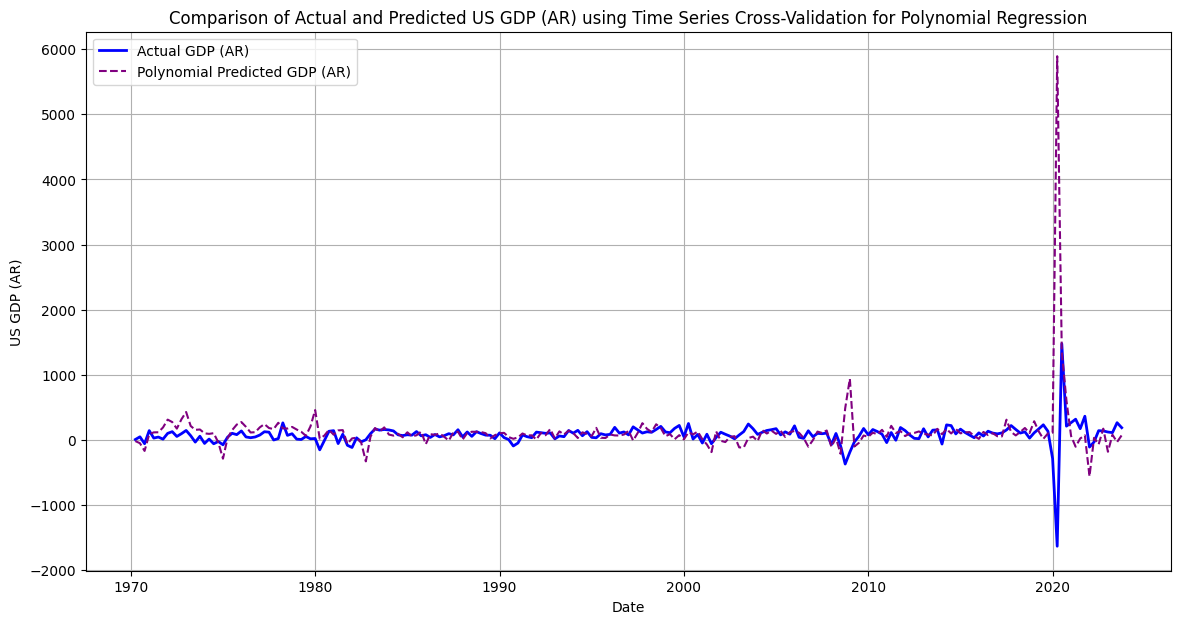

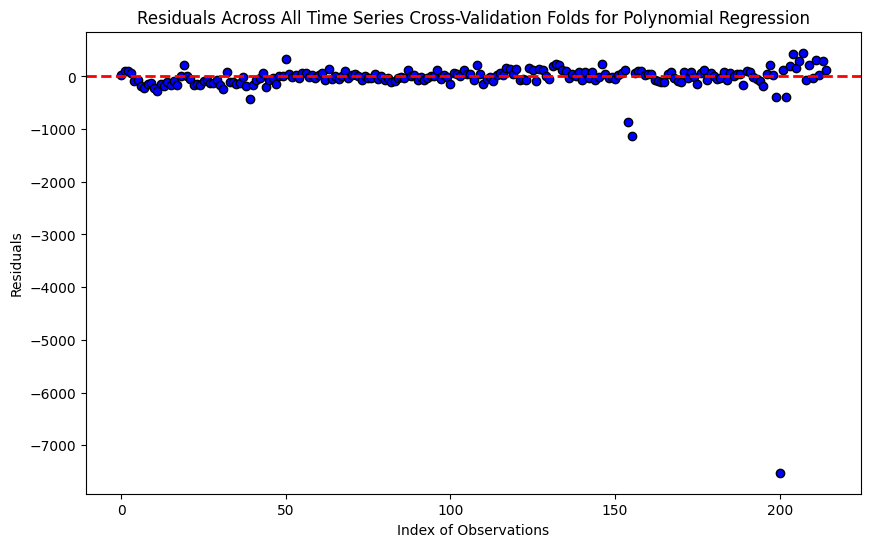

Mean Squared Error: [22743.063600505757, 6602.80259872015, 7924.298992396243, 55688.551617328165, 1346332.1819787694]
Mean Absolute Error: [128.2148045639343, 55.636348592779036, 71.0543862051763, 121.18671493020882, 301.47013071008365]
R-squared: [-3.336704871542815, -0.41373135883952594, -0.9337244563829714, -3.753094696807663, -9.677219379800958]
Adjusted R-squared: [-29.356934100799705, -8.896119511876682, -12.536071194680801, -32.27166287765364, -73.7405356586067]
Average Mean Squared Error: 287858.180
Average Mean Absolute Error: 135.512


In [84]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()

kf = KFold(n_splits=5)

mse_scores = []
mae_scores = []
residuals_list = []
r2_scores = []
adj_r2_scores = []
Poly_predictions = []
actuals, dates_for_plot = [], []

for train_index, test_index in kf.split(X_poly):

    X_train, X_test = X_poly[train_index], X_poly[test_index]

    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    Poly_predictions.extend(y_pred)

    dates_for_plot.extend(data_diff.iloc[test_index].index)


    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2 = r2_score(y_test, y_pred)
    n, p = len(y_test), X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)

    residuals = y_test - y_pred
    residuals_list.extend(residuals)

    actuals.extend(y_test)


residuals_array = np.array(residuals_list)

plt.figure(figsize=(14, 7))
plt.plot(dates_for_plot, actuals, label='Actual GDP (AR)', color='blue', linewidth=2)
plt.plot(dates_for_plot, Poly_predictions, label='Polynomial Predicted GDP (AR)', linestyle='--', color='purple')
plt.title('Comparison of Actual and Predicted US GDP (AR) using Time Series Cross-Validation for Polynomial Regression')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_array)), residuals_array, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Index of Observations')
plt.ylabel('Residuals')
plt.title('Residuals Across All Time Series Cross-Validation Folds for Polynomial Regression')
plt.show()


print("Mean Squared Error:",(mse_scores))
print("Mean Absolute Error:",(mae_scores))
print("R-squared:", (r2_scores))
print("Adjusted R-squared:", (adj_r2_scores))
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")


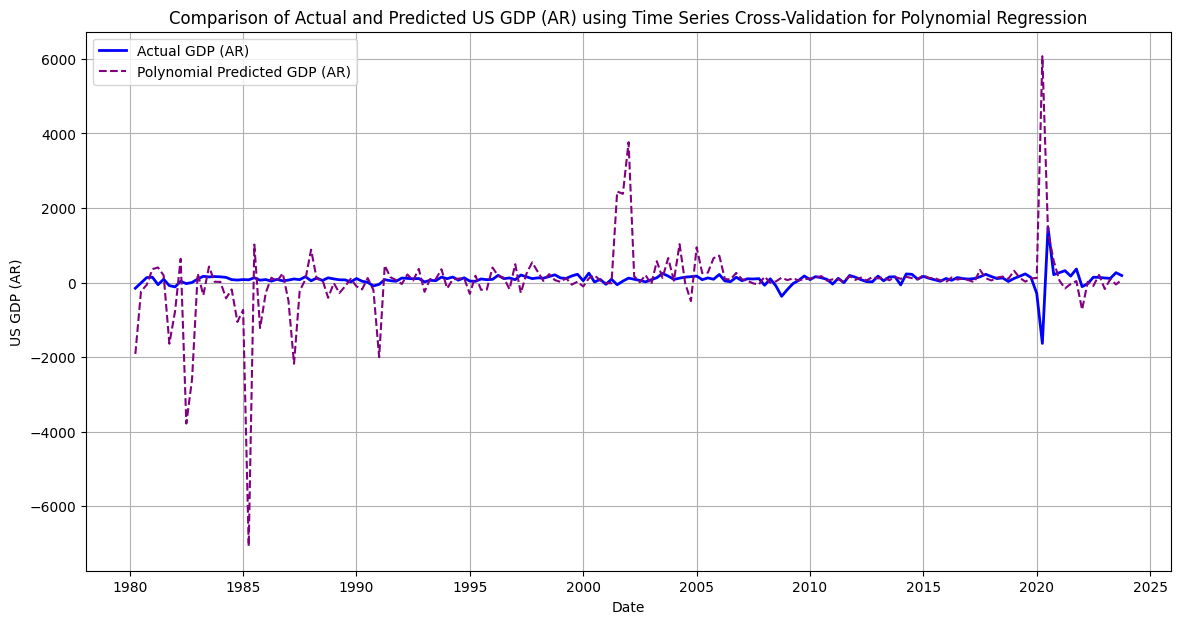

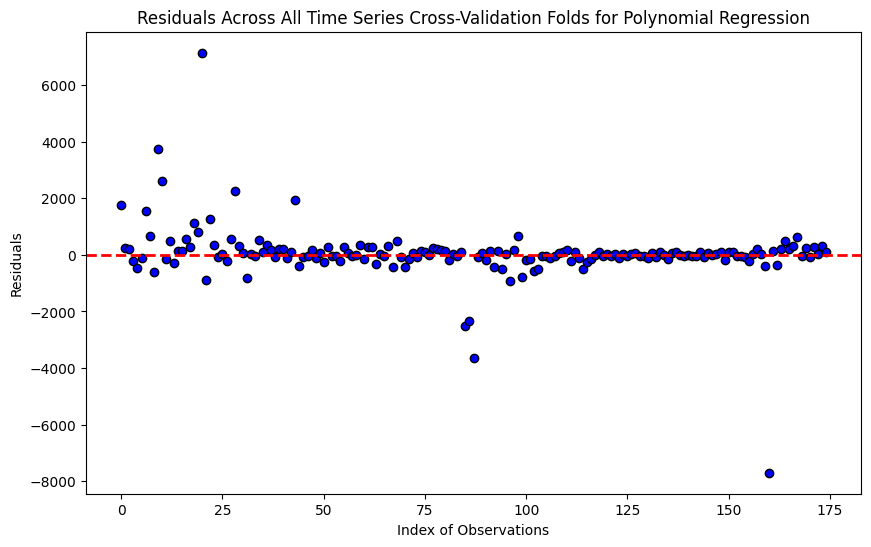

Mean Squared Error: [2584509.6448954768, 155998.4944382058, 813560.6918483151, 16961.082245073598, 1739004.9671191787]
Mean Absolute Error: [878.2855922777459, 229.25370990412137, 457.3548076270017, 92.57754773501414, 370.3243641842332]
R-squared: [-428.156399051501, -43.887888094644886, -154.12276975029548, -0.20210138409307787, -10.365661102768486]
Adjusted R-squared: [7296.658783875517, 764.094097608963, 2638.087085755023, 21.435723529582322, 194.21623874706427]
Average Mean Squared Error: 1062006.976
Average Mean Absolute Error: 405.559


In [85]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()

tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []
mae_scores = []
residuals_list = []
r2_scores = []
adj_r2_scores = []
Poly_predictions = []
actuals, dates_for_plot = [], []

for train_index, test_index in tscv.split(X_poly):

    X_train, X_test = X_poly[train_index], X_poly[test_index]

    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    Poly_predictions.extend(y_pred)

    dates_for_plot.extend(data_diff.iloc[test_index].index)


    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2 = r2_score(y_test, y_pred)
    n, p = len(y_test), X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)


    residuals = y_test - y_pred
    residuals_list.extend(residuals)

    actuals.extend(y_test)
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

residuals_array = np.array(residuals_list)

# Plotting actual vs. predicted GDP values
plt.figure(figsize=(14, 7))
plt.plot(dates_for_plot, actuals, label='Actual GDP (AR)', color='blue', linewidth=2)
plt.plot(dates_for_plot, Poly_predictions, label='Polynomial Predicted GDP (AR)', linestyle='--', color='purple')
plt.title('Comparison of Actual and Predicted US GDP (AR) using Time Series Cross-Validation for Polynomial Regression')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_array)), residuals_array, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Index of Observations')
plt.ylabel('Residuals')
plt.title('Residuals Across All Time Series Cross-Validation Folds for Polynomial Regression')
plt.show()

# Print the average MSE and MAE
print("Mean Squared Error:",(mse_scores))
print("Mean Absolute Error:",(mae_scores))
print("R-squared:", (r2_scores))
print("Adjusted R-squared:", (adj_r2_scores))
print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")


### Analysis 

The exploding Mean Squared Error (MSE) and Mean Absolute Error (MAE) when using cross-validation with polynomial regression compared to classic polynomial regression can be explained by several factors, particularly when considering the context of the model and the results from the Variance Inflation Factor (VIF) analysis.

1. **Model Sensitivity**: Time series data often have inherent autocorrelation and trends which make them sensitive to the partitioning of data. Classic train-test splits may inadvertently align with the trends, thus minimizing apparent error on small test sets. Time series cross-validation, however, which uses multiple sequential splits, can expose the model to more varied conditions, revealing weaknesses that were not apparent in a single split.

2. **Exposure to Volatility**: Using cross-validation on time series data, especially with a model involving higher-degree polynomial features, might expose the model to varying levels of volatility in different segments of the data. Each fold in the cross-validation might contain different characteristics or shock events that the model must predict, leading to larger errors if the model is not capable of generalizing well across these variations.

## Polynomial Regression and VIF Analysis

Polynomial regression can lead to models with high complexity, especially with many input features. The VIF results indicate significant multicollinearity, particularly for higher powers and interaction terms:

1. **High VIF Values**: Several terms, especially polynomial terms like US unemployment^2, have exceptionally high VIF values (e.g., 248). This suggests severe multicollinearity, which can make the model's estimates highly sensitive to small changes in the model input, leading to high variance in the prediction errors when the model is evaluated on new data segments during cross-validation.
    
2. **Impact on Stability**: High multicollinearity can destabilize the regression coefficients, causing large swings in output for small changes in input, which is exacerbated when these inputs are involved in interactions or squared terms in polynomial regression. This can lead to higher MSE and MAE as the model becomes overly fitted to the training data but performs poorly on validation data.


## Scaling Data and Applying Ridge and Lasso Regression

Scaling the data along with using regularization techniques like Ridge and Lasso can help in reducing the Mean Squared Error (MSE) and Mean Absolute Error (MAE) during the cross-validation of polynomial regression, especially when dealing with time series data. 

- **Data Scaling**: Standardizing the features (i.e., scaling them to have zero mean and unit variance) is crucial when working with regularization techniques. Many machine learning algorithms, including Ridge and Lasso, assume that all features are centered around zero and have variance in the same order. If a feature's variance is orders of magnitude more than the variance of other features, it might dominate the objective function and make the estimator unable to learn from other features correctly.

- **Ridge Regression (L2 Regularization)**: This method adds a penalty equivalent to the square of the magnitude of coefficients. All coefficients are shrunk by the same factor (none are eliminated). Ridge handles the multicollinearity (when independent variables are highly correlated) better by reducing the model complexity and preventing overfitting, which often results in lower MSE and MAE.

- **Lasso Regression (L1 Regularization)**: Lasso adds a penalty equivalent to the absolute value of the magnitude of coefficients. This type of regularization can lead to sparse models with few coefficients; some can become zero and be eliminated from the model. This is particularly useful in feature selection if you have a huge number of features.



In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print("Best Ridge alpha:", ridge_cv.alpha_)

lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, max_iter=50000)
lasso_cv.fit(X_train_scaled, y_train)
print("Best Lasso alpha:", lasso_cv.alpha_)

Best Ridge alpha: 100.0
Best Lasso alpha: 10.0


The use of a pipeline in this analysis enhances the workflow's cleanliness and efficiency, ensuring systematic and error-free processing. By integrating data scaling and polynomial feature creation directly into the pipeline, we ensure consistent application of these preprocessing steps across every phase of model training and validation. This method effectively prevents data leakage, which can occur if the validation data inadvertently influences the training process, and guarantees that scaling and transformations are uniformly applied during all cross-validation folds.

Additionally, encapsulating complex preprocessing and modeling steps into a single pipeline simplifies the code and management of the process. For this specific case, it allows for the straightforward integration of Ridge and Lasso regression models with necessary preprocessing steps such as polynomial feature expansion and feature scaling. These steps are crucial for addressing the nonlinear relationships and varying scales of the economic indicators used in GDP prediction. The systematic approach of the pipeline not only enhances the reliability of the models but also supports the validity and reproducibility of our predictive analysis.


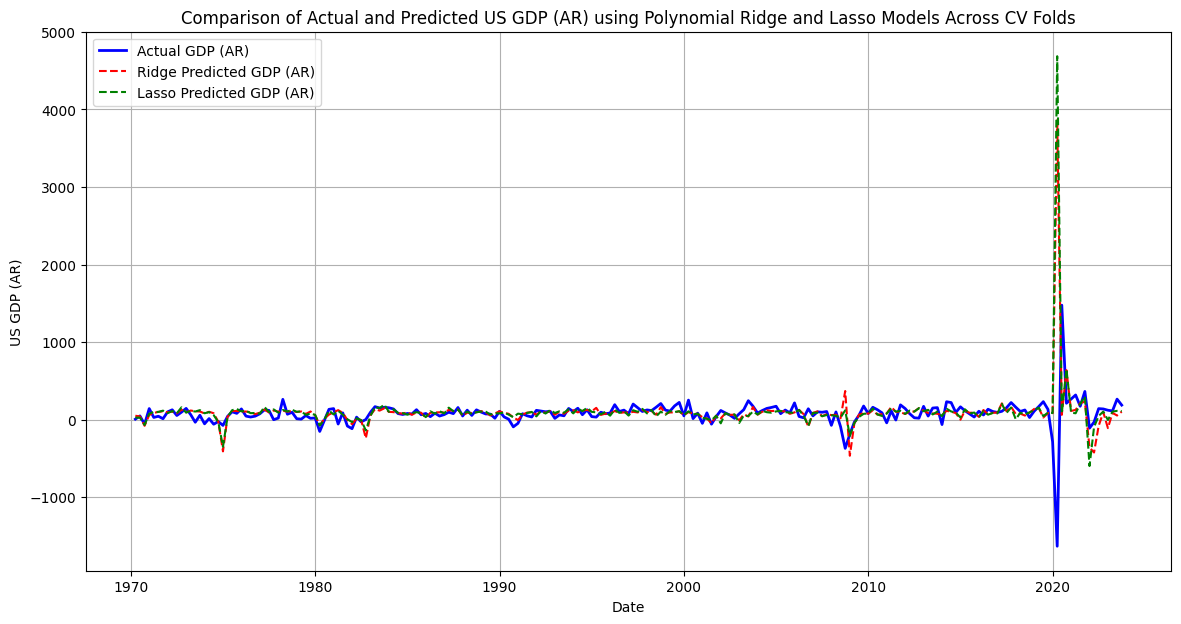

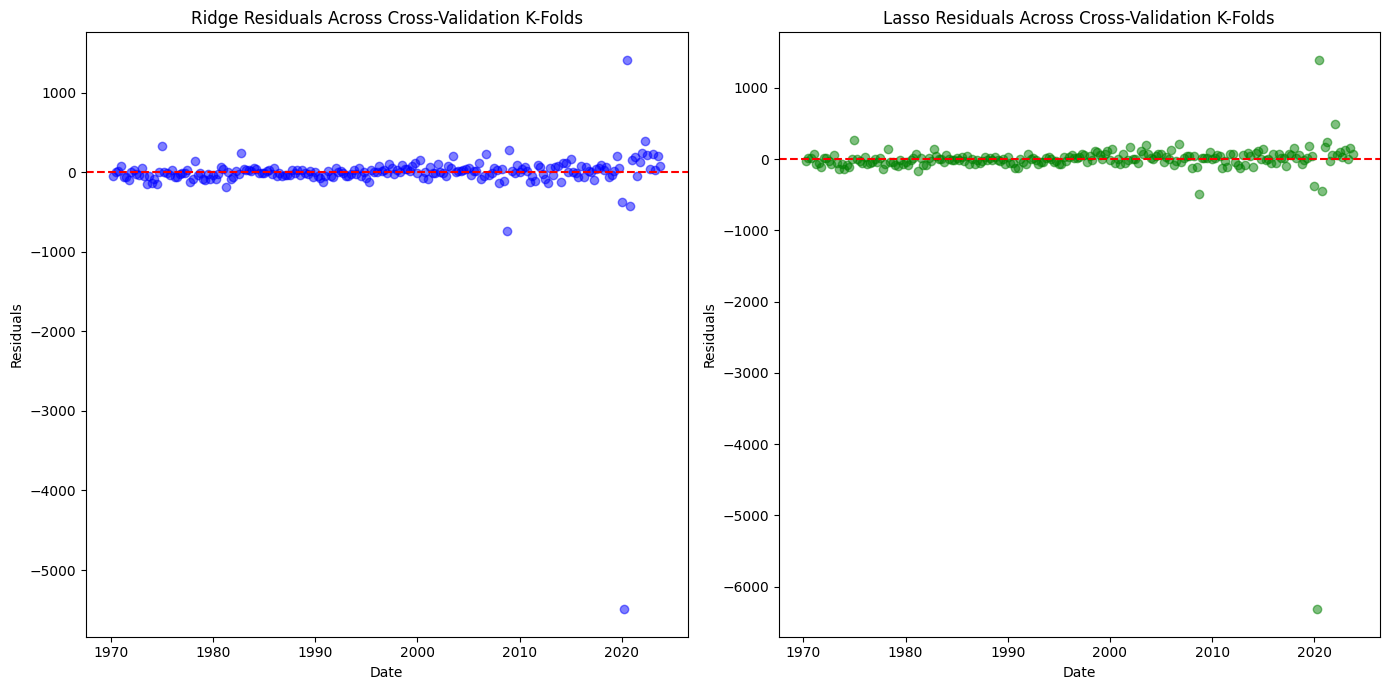

Ridge - MSE: [12743.324224617229, 720795.6841176209, 59659.32978273314, 8924.204873325089, 3043.4435620526956]
Ridge - MAE: [74.56291711204686, 203.42673146137878, 113.22884837971858, 60.37444960256659, 43.52129524423401]
Ridge - R-squared: [-1.2699413518703282, -8.17662547089345, -0.0043785573816721435, -0.29431436758212914, -0.0516147589407594]
Ridge - Adjusted R-squared: [-1.7239296222443938, -10.01195056507214, -0.20525426885800657, -0.5531772410985549, -0.26193771072891137]
Lasso - MSE: [10866.326539977565, 939251.4191856402, 56279.62073452962, 9194.612154699873, 3551.016097850487]
Lasso - MAE: [67.17674300229379, 215.72813042054813, 106.09119749414687, 60.5343647179838, 48.34341354397336]
Lasso - R-squared: [-0.9355957300664215, -10.957838659124482, 0.05251962284540246, -0.3335326547405013, -0.22699858288718877]
Lasso - Adjusted R-squared: [-1.3227148760797056, -13.349406390949378, -0.13697645258551705, -0.6002391856886016, -0.4723982994646265]
Average Ridge Mean Squared Error: 1

In [87]:
X = data_diff[['US unemployment', 'US 10-YEAR TREASURY BONDS YIELD', 'Non-Farm', 'US CPI',
               'US NOMINAL BROAD EFFECTIVE EXCH.RATE', 'US PERSONAL CURRENT TAXES (AR)', 
               'US CURRENT ACCOUNT BALANCE']]
y = data_diff['US GDP (AR)']


ridge_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha=100))
lasso_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso(alpha=10, max_iter=10000))

kf = KFold(n_splits=5, shuffle=True)

all_actuals = np.array([])
all_ridge_preds = np.array([])
all_lasso_preds = np.array([])

ridge_residuals = []
lasso_residuals = []

ridge_mse = []
lasso_mse = []

ridge_mae = []
lasso_mae = []

ridge_r2 = []
lasso_r2 = []

ridge_adj_r2 = []
lasso_adj_r2 = []

time_indexed_ridge_residuals = []
time_indexed_lasso_residuals = []

dates_for_plot = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    ridge_pipeline.fit(X_train, y_train)
    y_pred_ridge = ridge_pipeline.predict(X_test)

    residuals_ridge = y_test - y_pred_ridge
    ridge_residuals.extend(residuals_ridge)
    ridge_mse.append(mean_squared_error(y_test, y_pred_ridge))
    ridge_mae.append(mean_absolute_error(y_test, y_pred_ridge))
    ridge_r2.append(r2_score(y_test, y_pred_ridge))
    ridge_adj_r2.append(1 - (1 - r2_score(y_test, y_pred_ridge)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

    lasso_pipeline.fit(X_train, y_train)
    y_pred_lasso = lasso_pipeline.predict(X_test)

    residuals_lasso = y_test - y_pred_lasso
    lasso_residuals.extend(residuals_lasso)
    lasso_mse.append(mean_squared_error(y_test, y_pred_lasso))
    lasso_mae.append(mean_absolute_error(y_test, y_pred_lasso))
    lasso_r2.append(r2_score(y_test, y_pred_lasso))
    lasso_adj_r2.append(1 - (1 - r2_score(y_test, y_pred_lasso)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

    all_actuals = np.concatenate((all_actuals, y_test))
    all_ridge_preds = np.concatenate((all_ridge_preds, y_pred_ridge))
    all_lasso_preds = np.concatenate((all_lasso_preds, y_pred_lasso))

    dates_for_plot.extend(data_diff.iloc[test_index].index)

    time_indexed_ridge_residuals.append(pd.Series(y_test - y_pred_ridge, index=X_test.index))
    time_indexed_lasso_residuals.append(pd.Series(y_test - y_pred_lasso, index=X_test.index))

all_ridge_residuals = pd.concat(time_indexed_ridge_residuals)
all_lasso_residuals = pd.concat(time_indexed_lasso_residuals)

# Sort by date
dates_for_plot = np.array(dates_for_plot)
sorted_indices = np.argsort(dates_for_plot)
dates_for_plot = dates_for_plot[sorted_indices]
all_actuals = all_actuals[sorted_indices]
all_ridge_preds = all_ridge_preds[sorted_indices]
all_lasso_preds = all_lasso_preds[sorted_indices]

# Plotting the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(dates_for_plot, all_actuals, label='Actual GDP (AR)', color='blue', linewidth=2)
plt.plot(dates_for_plot, all_ridge_preds, label='Ridge Predicted GDP (AR)', linestyle='--', color='red')
plt.plot(dates_for_plot, all_lasso_preds, label='Lasso Predicted GDP (AR)', linestyle='--', color='green')
plt.title('Comparison of Actual and Predicted US GDP (AR) using Polynomial Ridge and Lasso Models Across CV Folds')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting residuals for Ridge
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(all_ridge_residuals.index, all_ridge_residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Ridge Residuals Across Cross-Validation K-Folds')
plt.xlabel('Date')
plt.ylabel('Residuals')

# Plotting residuals for Lasso
plt.subplot(1, 2, 2)
plt.scatter(all_lasso_residuals.index, all_lasso_residuals, color='green', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Lasso Residuals Across Cross-Validation K-Folds')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Print average MSE and MAE for both models
print("Ridge - MSE:", ridge_mse)
print("Ridge - MAE:", ridge_mae)
print("Ridge - R-squared:", ridge_r2)
print("Ridge - Adjusted R-squared:", ridge_adj_r2)
print("Lasso - MSE:", lasso_mse)
print("Lasso - MAE:", lasso_mae)
print("Lasso - R-squared:", lasso_r2)
print("Lasso - Adjusted R-squared:", lasso_adj_r2)
avg_ridge_mse = np.mean(ridge_mse)
avg_ridge_mae = np.mean(ridge_mae)

avg_lasso_mse = np.mean(lasso_mse)
avg_lasso_mae = np.mean(lasso_mae)
print(f"Average Ridge Mean Squared Error: {avg_ridge_mse:.3f}")
print(f"Average Ridge Mean Absolute Error: {avg_ridge_mae:.3f}")
print(f"Average Lasso Mean Squared Error: {avg_lasso_mse:.3f}")
print(f"Average Lasso Mean Absolute Error: {avg_lasso_mae:.3f}")

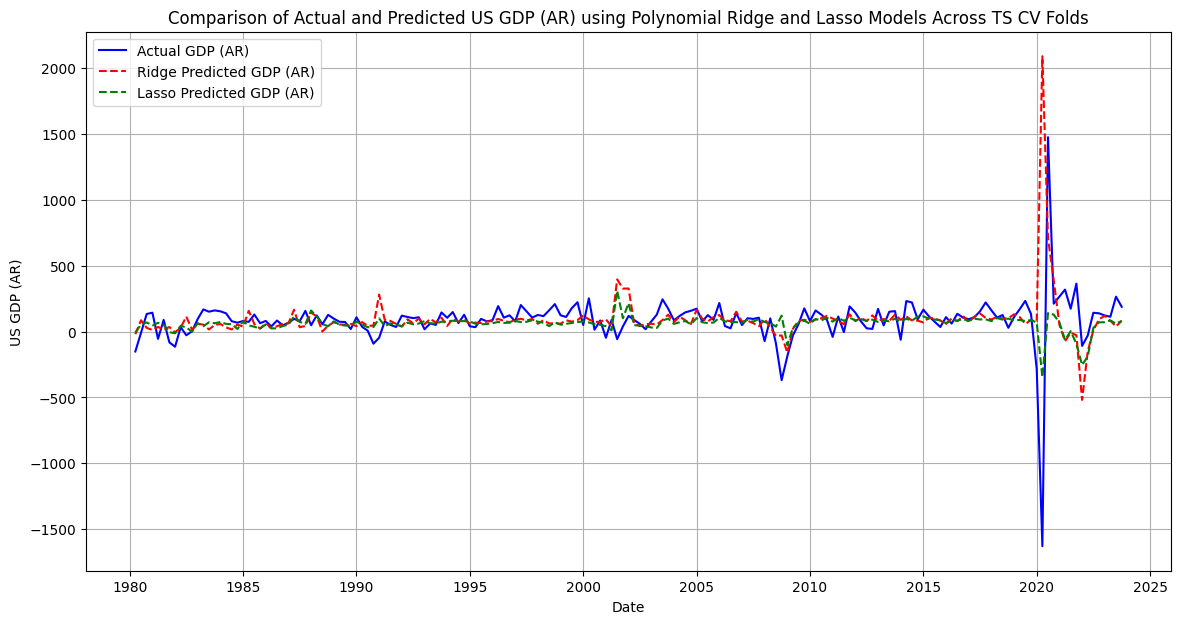

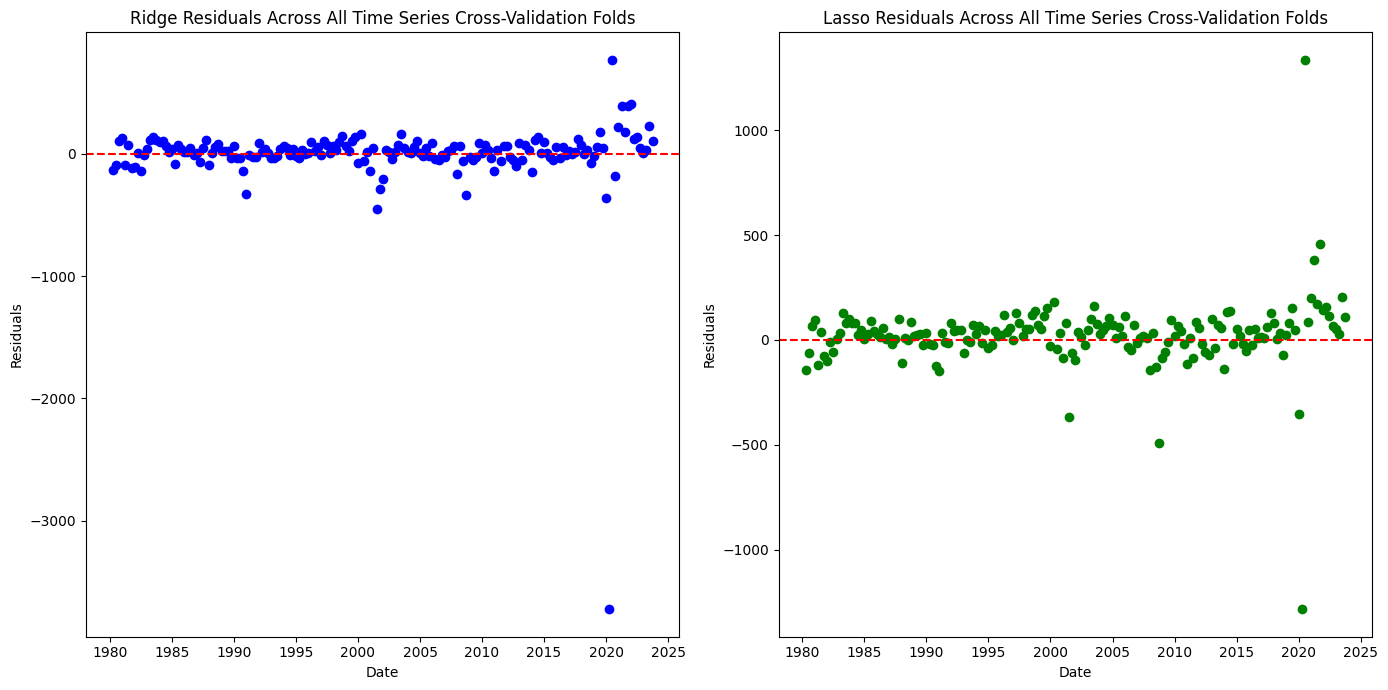

Ridge - MSE: [6904.161868087542, 5459.931777231961, 14896.043287757153, 8721.409045208611, 438302.5674679648]
Ridge - MAE: [71.12533597429554, 47.80850501628125, 83.14493310329554, 70.00487188479026, 233.41536446069873]
Ridge - R-squared: [-0.14643226487048477, -0.5710716151678437, -1.8402496780756588, 0.3818780114970389, -1.8646257696242707]
Ridge - Adjusted R-squared: [-0.4436554446517216, -0.9783864783595069, -2.5766107057249035, 0.2216241626259008, -2.6073065247120444]
Lasso - MSE: [4848.166327641974, 3424.3151341696944, 10552.698683064677, 12352.030134521998, 119619.3541346916]
Lasso - MAE: [56.09740488621764, 45.78847822577648, 78.73199880695873, 74.71641134095539, 173.59089514851075]
Lasso - R-squared: [0.19496465904745575, 0.014668217812217832, -1.0120980087401925, 0.12456102113524836, 0.21820059969168615]
Lasso - Adjusted R-squared: [-0.013748207125426015, -0.2407881701623924, -1.5337530480432058, -0.10240464005190941, 0.015511866278419606]
Average Ridge Mean Squared Error: 94

In [88]:
X = data_diff[['US unemployment', 'US 10-YEAR TREASURY BONDS YIELD', 'Non-Farm', 'US CPI',
               'US NOMINAL BROAD EFFECTIVE EXCH.RATE', 'US PERSONAL CURRENT TAXES (AR)', 
               'US CURRENT ACCOUNT BALANCE']]
y = data_diff['US GDP (AR)']


ridge_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha=100))
lasso_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso(alpha=10, max_iter=10000))

tscv = TimeSeriesSplit(n_splits=5)


all_actuals = np.array([])
all_ridge_preds = np.array([])
all_lasso_preds = np.array([])

ridge_residuals = []
lasso_residuals = []

ridge_mse = []
lasso_mse = []

ridge_mae = []
lasso_mae = []

ridge_r2 = []
lasso_r2 = []

ridge_adj_r2 = []
lasso_adj_r2 = []

time_indexed_ridge_residuals = []
time_indexed_lasso_residuals = []

actuals, dates_for_plot = [], []

for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    ridge_pipeline.fit(X_train, y_train)
    y_pred_ridge = ridge_pipeline.predict(X_test)

    residuals_ridge = y_test - y_pred_ridge
    ridge_residuals.extend(residuals_ridge)
    ridge_mse.append(mean_squared_error(y_test, y_pred_ridge))
    ridge_mae.append(mean_absolute_error(y_test, y_pred_ridge))
    ridge_r2.append(r2_score(y_test, y_pred_ridge))
    ridge_adj_r2.append(1 - (1-r2_score(y_test, y_pred_ridge)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))

    actual_values.extend(y_test)


    lasso_pipeline.fit(X_train, y_train)
    y_pred_lasso = lasso_pipeline.predict(X_test)

    residuals_lasso = y_test - y_pred_lasso
    lasso_residuals.extend(residuals_lasso)
    lasso_mse.append(mean_squared_error(y_test, y_pred_lasso))
    lasso_mae.append(mean_absolute_error(y_test, y_pred_lasso))
    lasso_r2.append(r2_score(y_test, y_pred_lasso))
    lasso_adj_r2.append(1 - (1-r2_score(y_test, y_pred_lasso)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))
    all_actuals = np.concatenate((all_actuals, y_test))
    all_ridge_preds = np.concatenate((all_ridge_preds, y_pred_ridge))
    all_lasso_preds = np.concatenate((all_lasso_preds, y_pred_lasso))

    dates_for_plot.extend(data_diff.iloc[test_index].index)

    time_indexed_ridge_residuals.append(pd.Series(y_test - y_pred_ridge, index=X_test.index))
    time_indexed_lasso_residuals.append(pd.Series(y_test - y_pred_lasso, index=X_test.index))

all_ridge_residuals = pd.concat(time_indexed_ridge_residuals)
all_lasso_residuals = pd.concat(time_indexed_lasso_residuals)

avg_ridge_mse = np.mean(ridge_mse)
avg_ridge_mae = np.mean(ridge_mae)

avg_lasso_mse = np.mean(lasso_mse)
avg_lasso_mae = np.mean(lasso_mae)
# Plotting the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(dates_for_plot, all_actuals, label='Actual GDP (AR)', color='blue')
plt.plot(dates_for_plot, all_ridge_preds, label='Ridge Predicted GDP (AR)', linestyle='--', color='red')
plt.plot(dates_for_plot, all_lasso_preds, label='Lasso Predicted GDP (AR)', linestyle='--', color='green')
plt.title('Comparison of Actual and Predicted US GDP (AR) using Polynomial Ridge and Lasso Models Across TS CV Folds')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting residuals for Ridge
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(all_ridge_residuals.index, all_ridge_residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Ridge Residuals Across All Time Series Cross-Validation Folds')
plt.xlabel('Date')
plt.ylabel('Residuals')

# Plotting residuals for Lasso
plt.subplot(1, 2, 2)
plt.scatter(all_lasso_residuals.index, all_lasso_residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Lasso Residuals Across All Time Series Cross-Validation Folds')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Print average MSE and MAE for both models
print("Ridge - MSE:", (ridge_mse))
print("Ridge - MAE:",(ridge_mae))
print("Ridge - R-squared:",(ridge_r2))
print("Ridge - Adjusted R-squared:",(ridge_adj_r2))
print("Lasso - MSE:",(lasso_mse))
print("Lasso - MAE:",(lasso_mae))
print("Lasso - R-squared:",(lasso_r2))
print("Lasso - Adjusted R-squared:", (lasso_adj_r2))

print(f"Average Ridge Mean Squared Error: {avg_ridge_mse:.3f}")
print(f"Average Ridge Mean Absolute Error: {avg_ridge_mae:.3f}")
print(f"Average Lasso Mean Squared Error: {avg_lasso_mse:.3f}")
print(f"Average Lasso Mean Absolute Error: {avg_lasso_mae:.3f}")


## **Ensemble Forecasting Models**

## Gradient Boosting

Gradient Boosting is an ensemble machine learning technique that builds models incrementally. It is a type of boosting algorithm where each new model iteratively corrects errors made by the previous models. The method relies on the principle that the best possible next model, when combined with previous models, minimizes the overall prediction error.

The core idea is to combine many simple models (known as "weak learners") to create a robust overall model. Each tree is trained so that it attempts to correct the mistakes of the previous tree in the chain. This is done by fitting the new tree to the residual errors of the preceding tree. Key parameters of the model include:
- **n_estimators**: Number of trees to be used in the process.
- **learning_rate**: The rate at which the model adapts over each iteration or tree.
- **max_depth**: The maximum depth of each tree. Keeping it in a reasonable range helps prevent overfitting.

Gradient Boosting is crucial because of its effectiveness in handling various types of data and its ability to improve predictively over simple models through robustness and accuracy, especially on complex datasets where relationships between variables are non-linear.

### Explanation of the Provided Code

The provided code performs the following operations:

1. **Feature and Target Definition**:
   - `X` represents the feature set derived from dropping the target variable column 'US GDP (AR)' from the dataset.
   - `y` is the target variable which is 'US GDP (AR)'.

2. **Data Sorting**:
   - The dataset is sorted based on the index to maintain chronological order, essential for time series data to make logical sense.

3. **Train-Test Split**:
   - The data is split into training and testing sets, using a 80-20 ratio without shuffling. This approach ensures that the temporal sequence is respected.

4. **Model Training**:
   - A Gradient Boosting Regressor is instantiated and trained on the training data.

5. **Prediction and Evaluation**:
   - The model is used to predict the GDP on the test set.
   - Metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE) are computed to evaluate the model's performance.
   - A plot is generated to visually compare the actual and predicted GDP values.

6. **Metric Calculation**:
   - The R-squared and Adjusted R-squared values are calculated to determine the model's goodness of fit.
   - R-squared measures the proportion of variance in the dependent variable that is predictable from the independent variables.
   - Adjusted R-squared also considers the number of predictors in the model, providing a more adjusted metric.


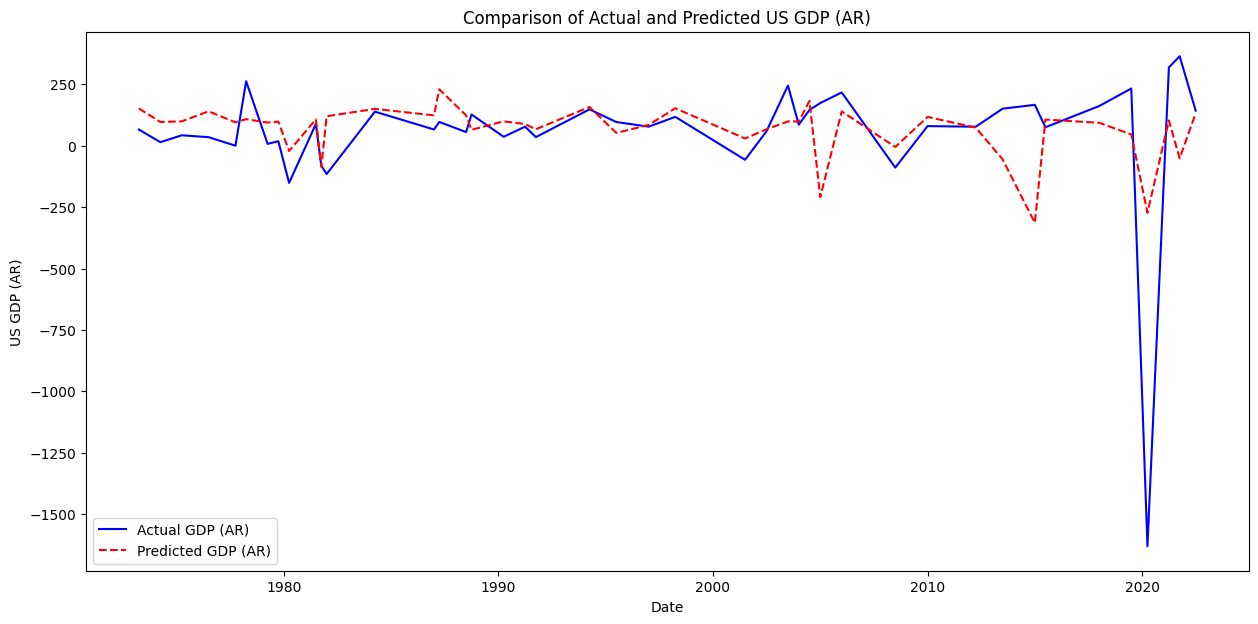

Mean Squared Error (MSE) on Test Set: 64049.52
Mean Absolute Error (MAE) on Test Set: 128.32
R-squared (R2) on Test Set: 0.18
Adjusted R-squared (R2 adjusted) on Test Set: 0.02
43


In [89]:
X = data_diff.drop('US GDP (AR)', axis=1)  
y = data_diff['US GDP (AR)']

data_diff.sort_index(inplace=True)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_test.sort_index(inplace=True)  
y_test = y_test.reindex(X_test.index)  # Align y_test with the sorted X_test

model = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.1, max_depth=5000)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Plot the actual vs predicted values
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual GDP (AR)', color='blue')  # Ensure the index is used for x-axis
plt.plot(X_test.index, y_pred_test, label='Predicted GDP (AR)', linestyle='--', color='red')
plt.title('Comparison of Actual and Predicted US GDP (AR)')
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.legend()
plt.show()

r2 = r2_score(y_test, y_pred_test)
n_obs = len(X_test)
n_features = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2) * (n_obs - 1) / (n_obs - n_features - 1))

print("Mean Squared Error (MSE) on Test Set: {:.2f}".format(mse))
print("Mean Absolute Error (MAE) on Test Set: {:.2f}".format(mae))
print("R-squared (R2) on Test Set: {:.2f}".format(r2))
print("Adjusted R-squared (R2 adjusted) on Test Set: {:.2f}".format(r2_adjusted))
print(n_obs)


## Gradient Boosting Regressor with Cross-validation with K-Fold

Mean Squared Error: [20652.375528222834, 3781.5440880256415, 6636.260961162323, 8859.536908757365, 100835.08445489744]
Mean Absolute Error: [89.27486768358304, 43.97918035151461, 64.06968601138077, 71.38630112858874, 144.72088674839924]
R-squared: [-2.9380471837656863, 0.19033056309871776, -0.6194113992736465, 0.24382630407497807, 0.200317475644599]
Adjusted R-squared: [-3.7256566205188237, 0.028396675718461273, -0.9432936791283757, 0.09259156488997367, 0.040380970773518765]
Average Mean Squared Error: 28152.96
Average Mean Absolute Error: 82.69


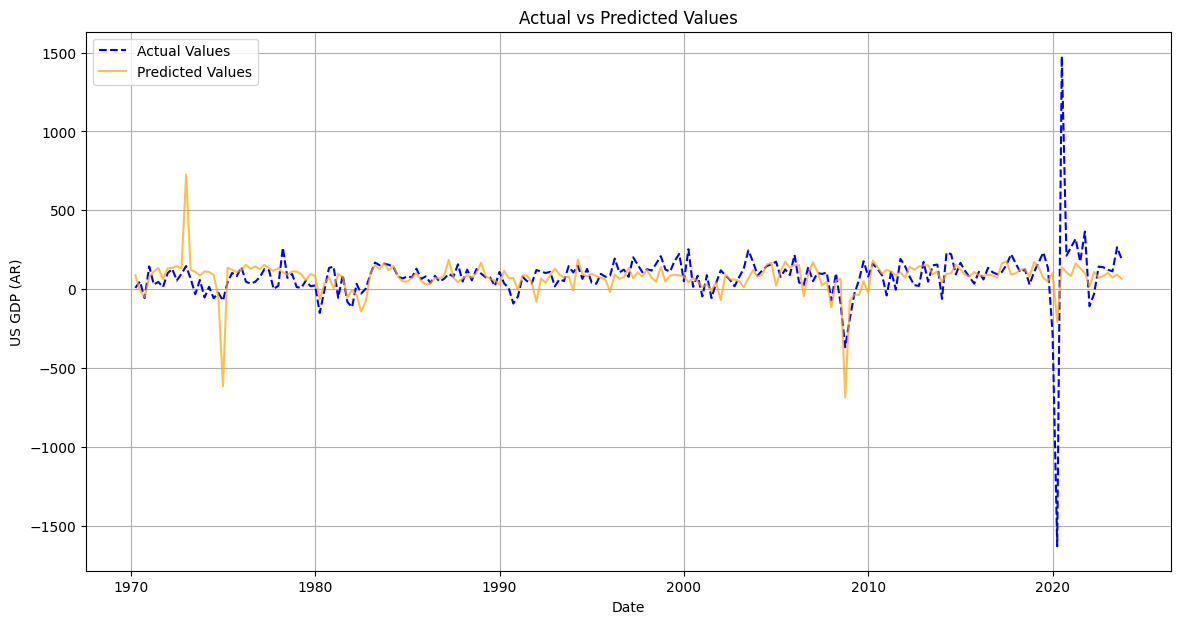

In [90]:
X = data_diff.drop('US GDP (AR)', axis=1)
y = data_diff['US GDP (AR)']
kf = KFold(n_splits=5)

mse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []

all_y_test = []
all_y_pred = []
test_dates = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.1, max_depth=5)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred_test)
    test_dates.extend(X_test.index)

    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    n_obs = len(y_test)
    n_features = X_test.shape[1]
    r2_adjusted = 1 - ((1 - r2) * (n_obs - 1) / (n_obs - n_features - 1))

    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adjusted_r2_scores.append(r2_adjusted)

avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

print(f"Mean Squared Error:", mse_scores)
print(f"Mean Absolute Error:", mae_scores)
print(f"R-squared:", r2_scores)
print(f"Adjusted R-squared:", adjusted_r2_scores)

print(f"Average Mean Squared Error: {avg_mse:.2f}")
print(f"Average Mean Absolute Error: {avg_mae:.2f}")

# Sort the data by dates
sorted_indices = np.argsort(test_dates)
test_dates = np.array(test_dates)[sorted_indices]
all_y_test = np.array(all_y_test)[sorted_indices]
all_y_pred = np.array(all_y_pred)[sorted_indices]

# Plot actual vs predicted values with dates as the x-axis
plt.figure(figsize=(14, 7))
plt.plot(test_dates, all_y_test, label='Actual Values', color='blue', linestyle='dashed')
plt.plot(test_dates, all_y_pred, label='Predicted Values', color='orange', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Gradient Boosting Regressor with Cross-validation with Time Series

Mean Squared Error: [7154.341092782747, 3423.4937376253565, 8764.836331546247, 11251.586630021578, 132045.27258169575]
Mean Absolute Error: [75.42008363025305, 48.251554331857854, 73.386551470819, 76.8410522186507, 172.69398509369753]
R-squared: [-0.18797438695145408, 0.01490457109432064, -0.6712037611706161, 0.20255396054572827, 0.13698819338485024]
Adjusted R-squared: [-0.4959677465314607, -0.24049054010344806, -1.1044788103629979, -0.00419130894241615, -0.08675560833018858]
Average Mean Squared Error: 32527.91
Average Mean Absolute Error: 89.32


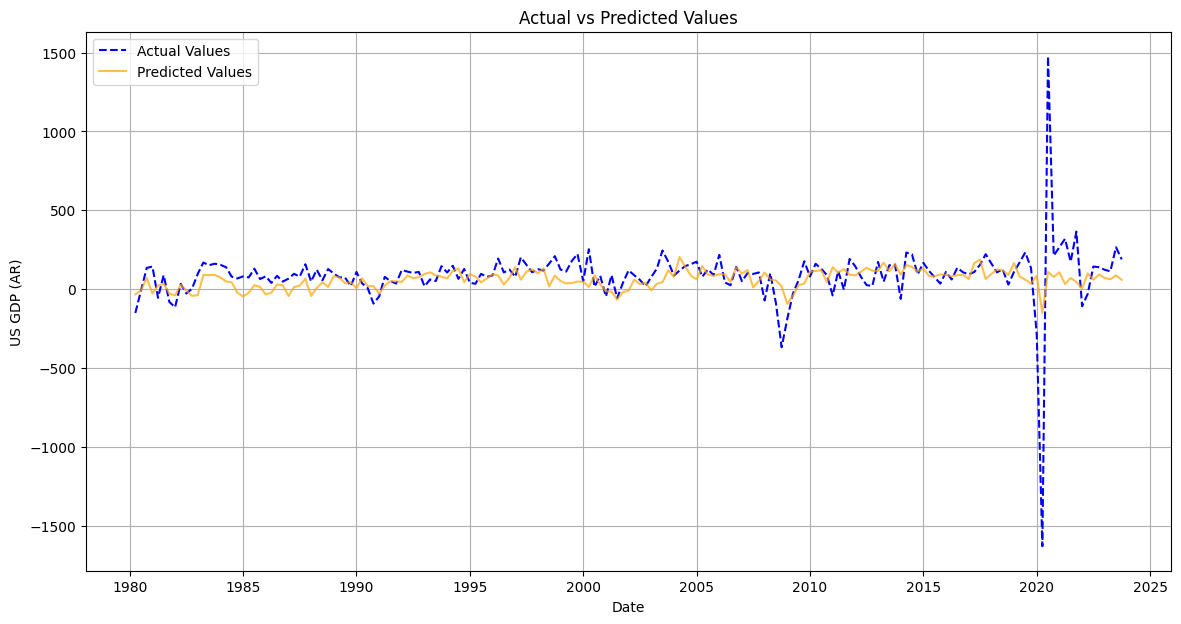

In [91]:
X = data_diff.drop('US GDP (AR)', axis=1)
y = data_diff['US GDP (AR)']

tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []

all_y_test = []
all_y_pred = []
test_dates = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    model = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.1, max_depth=5)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)


    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred_test)
    test_dates.extend(X_test.index)

    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    n_obs = len(y_test)
    n_features = X_test.shape[1]
    r2_adjusted = 1 - ((1 - r2) * (n_obs - 1) / (n_obs - n_features - 1))


    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adjusted_r2_scores.append(r2_adjusted)


avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

print(f"Mean Squared Error:", mse_scores)
print(f"Mean Absolute Error:", mae_scores)
print(f"R-squared:", r2_scores)
print(f"Adjusted R-squared:", adjusted_r2_scores)

print(f"Average Mean Squared Error: {avg_mse:.2f}")
print(f"Average Mean Absolute Error: {avg_mae:.2f}")


# Sort the data by dates
sorted_indices = np.argsort(test_dates)
test_dates = np.array(test_dates)[sorted_indices]
all_y_test = np.array(all_y_test)[sorted_indices]
all_y_pred = np.array(all_y_pred)[sorted_indices]

# Plot actual vs predicted values with dates as the x-axis
plt.figure(figsize=(14, 7))
plt.plot(test_dates, all_y_test, label='Actual Values', color='blue', linestyle='dashed')
plt.plot(test_dates, all_y_pred, label='Predicted Values', color='orange', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('US GDP (AR)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## **Deep Learning**

## **RNN Model**

## RNN with Cross-Validation with K-Fold

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_40 (SimpleRNN)   (None, 5, 30)             1140      
                                                                 
 time_distributed_40 (TimeDi  (None, 5, 30)            0         
 stributed)                                                      
                                                                 
 simple_rnn_41 (SimpleRNN)   (None, 30)                1830      
                                                                 
 dense_40 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 4ms/step
Model: "sequential_41"
______________________________________

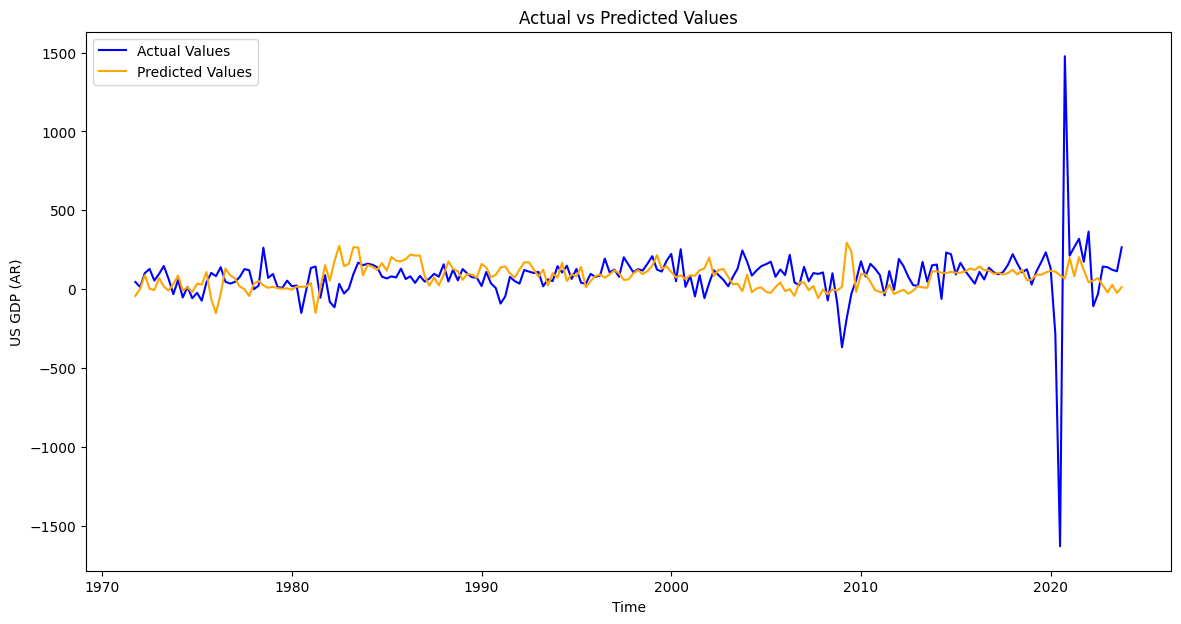

In [92]:
features = [col for col in data_diff.columns if col != 'US GDP (AR)']
target = 'US GDP (AR)'

# Data preparation
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_diff[features + [target]])

# Function to create dataset suitable for RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :-1]  # Features
        X.append(a)
        Y.append(dataset[i + look_back, -1])  # Target
    return np.array(X), np.array(Y)

# Define look-back period
look_back = 5
X, y = create_dataset(scaled_data, look_back)
kf = KFold(n_splits=5)
mse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []
all_y_test_rescaled = []
all_y_pred_rescaled = []
all_test_indices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = Sequential([
        SimpleRNN(30, input_shape=(look_back, len(features)), return_sequences=True),
        TimeDistributed(Dropout(rate=0.2)),
        SimpleRNN(30),
        Dense(1)
    ])
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0) 

    y_pred = model.predict(X_test)

    # Inverse transform to convert predictions back to original scale
    y_pred_rescaled = scaler.inverse_transform(np.column_stack([np.zeros((y_pred.shape[0], len(features))), y_pred]))[:, -1]
    y_test_rescaled = scaler.inverse_transform(np.column_stack([np.zeros((y_test.shape[0], len(features))), y_test]))[:, -1]
    all_y_test_rescaled.extend(y_test_rescaled)
    all_y_pred_rescaled.extend(y_pred_rescaled)
    all_test_indices.extend(test_index)
    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)
    n = len(y_test_rescaled)
    p = len(features) + 1  # Number of predictors + intercept
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adj_r2)

# Calculate average metrics
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

print(f"Mean Squared Error:", mse_scores)
print(f"Mean Absolute Error:", mae_scores)
print(f"R-squared:", r2_scores)
print(f"Adjusted R-squared:", adjusted_r2_scores)

print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")


# Plot actual vs predicted values with time as the x-axis
test_dates = data_diff.index[look_back + 1:][all_test_indices]

plt.figure(figsize=(14, 7))
plt.plot(test_dates, all_y_test_rescaled, label='Actual Values', color='blue')
plt.plot(test_dates, all_y_pred_rescaled, label='Predicted Values', color='orange')
plt.xlabel('Time')
plt.ylabel('US GDP (AR)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


## RNN with Cross-Validation and Time Series

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_50 (SimpleRNN)   (None, 5, 30)             1140      
                                                                 
 time_distributed_45 (TimeDi  (None, 5, 30)            0         
 stributed)                                                      
                                                                 
 simple_rnn_51 (SimpleRNN)   (None, 30)                1830      
                                                                 
 dense_45 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 4ms/step
Model: "sequential_46"
______________________________________

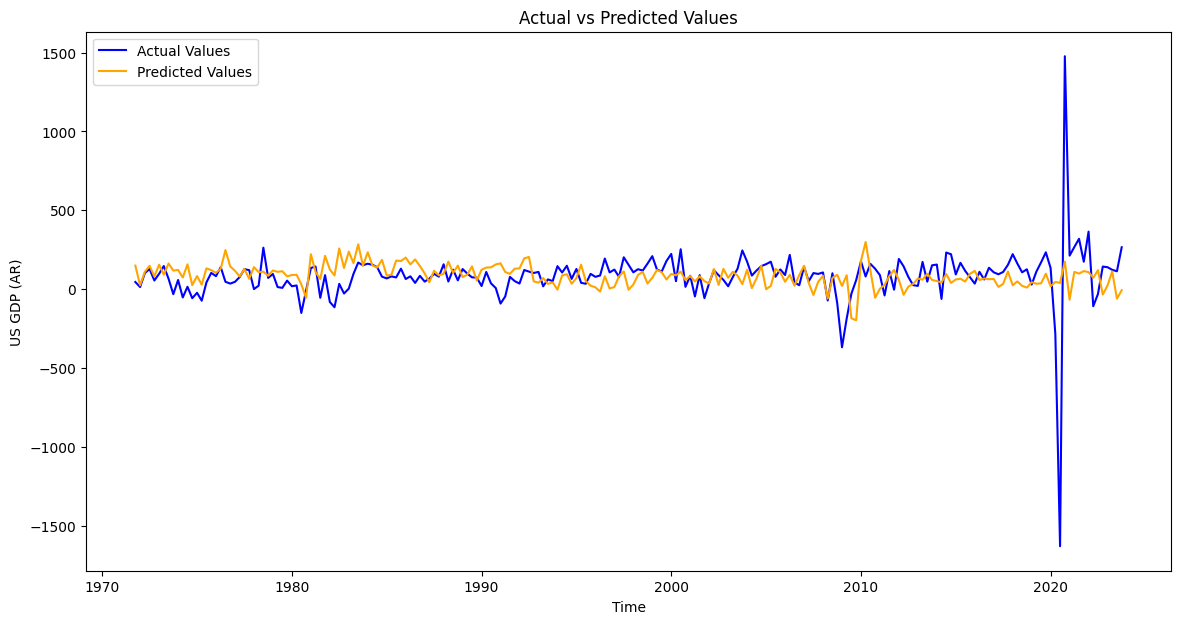

In [93]:
features = [col for col in data_diff.columns if col != 'US GDP (AR)']
target = 'US GDP (AR)'


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_diff[features + [target]])


def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :-1]  # Features
        X.append(a)
        Y.append(dataset[i + look_back, -1])  # Target
    return np.array(X), np.array(Y)


look_back = 5
X, y = create_dataset(scaled_data, look_back)


kf = KFold(n_splits=5)

mse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []

all_y_test_rescaled = []
all_y_pred_rescaled = []
all_test_indices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = Sequential([
        SimpleRNN(30, input_shape=(look_back, len(features)), return_sequences=True),
        TimeDistributed(Dropout(rate=0.2)),
        SimpleRNN(30),
        Dense(1)
    ])
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0) 

    y_pred = model.predict(X_test)

    y_pred_rescaled = scaler.inverse_transform(np.column_stack([np.zeros((y_pred.shape[0], len(features))), y_pred]))[:, -1]
    y_test_rescaled = scaler.inverse_transform(np.column_stack([np.zeros((y_test.shape[0], len(features))), y_test]))[:, -1]

    all_y_test_rescaled.extend(y_test_rescaled)
    all_y_pred_rescaled.extend(y_pred_rescaled)
    all_test_indices.extend(test_index)

    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)

    n = len(y_test_rescaled)
    p = len(features) + 1  # Number of predictors + intercept
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adj_r2)

avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

print(f"Mean Squared Error:", mse_scores)
print(f"Mean Absolute Error:", mae_scores)
print(f"R-squared:", r2_scores)
print(f"Adjusted R-squared:", adjusted_r2_scores)

print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")

# Plot actual vs predicted values with time as the x-axis
test_dates = data_diff.index[look_back + 1:][all_test_indices]

plt.figure(figsize=(14, 7))
plt.plot(test_dates, all_y_test_rescaled, label='Actual Values', color='blue')
plt.plot(test_dates, all_y_pred_rescaled, label='Predicted Values', color='orange')
plt.xlabel('Time')
plt.ylabel('US GDP (AR)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## LSTM with Cross-Validation with K-Fold 

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 5, 30)             4560      
                                                                 
 time_distributed_50 (TimeDi  (None, 5, 30)            0         
 stributed)                                                      
                                                                 
 lstm_41 (LSTM)              (None, 30)                7320      
                                                                 
 dense_50 (Dense)            (None, 1)                 31        
                                                                 
Total params: 11,911
Trainable params: 11,911
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 1s 5ms/step
Model: "sequential_51"
____________________________________

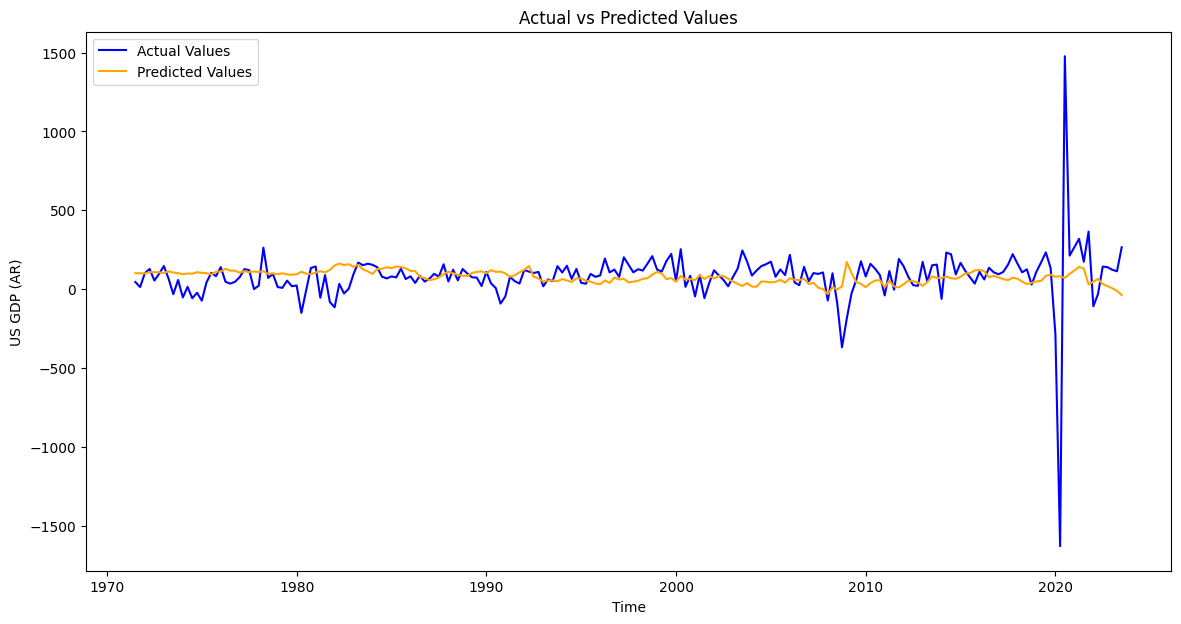

In [94]:
features = [col for col in data_diff.columns if col != 'US GDP (AR)']
target = 'US GDP (AR)'

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_diff[features + [target]])

def create_dataset(dataset, look_back=1):
    X, Y, dates = [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :-1]  # Features
        X.append(a)
        Y.append(dataset[i + look_back, -1])  # Target
        dates.append(data_diff.index[i + look_back])  # Record the date
    return np.array(X), np.array(Y), dates

look_back = 5
X, y, dates = create_dataset(scaled_data, look_back)

kf = KFold(n_splits=5)

mse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []
all_y_test_rescaled = []
all_y_pred_rescaled = []
all_test_dates = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_dates = [dates[i] for i in test_index]
    model = Sequential([
        LSTM(30, input_shape=(look_back, len(features)), return_sequences=True),
        TimeDistributed(Dropout(rate=0.2)),
        LSTM(30),
        Dense(1)
    ])
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0) 

    y_pred = model.predict(X_test)

    y_pred_rescaled = scaler.inverse_transform(np.column_stack([np.zeros((y_pred.shape[0], len(features))), y_pred]))[:, -1]
    y_test_rescaled = scaler.inverse_transform(np.column_stack([np.zeros((y_test.shape[0], len(features))), y_test]))[:, -1]

    all_y_test_rescaled.extend(y_test_rescaled)
    all_y_pred_rescaled.extend(y_pred_rescaled)
    all_test_dates.extend(test_dates)

    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)

    n = len(y_test_rescaled)
    p = len(features) + 1  
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

  
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adj_r2)

avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)


print(f"Mean Squared Error:", mse_scores)
print(f"Mean Absolute Error:", mae_scores)
print(f"R-squared:", r2_scores)
print(f"Adjusted R-squared:", adjusted_r2_scores)

print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")

# Plot actual vs predicted values with time as the x-axis
plt.figure(figsize=(14, 7))
plt.plot(all_test_dates, all_y_test_rescaled, label='Actual Values', color='blue')
plt.plot(all_test_dates, all_y_pred_rescaled, label='Predicted Values', color='orange')
plt.xlabel('Time')
plt.ylabel('US GDP (AR)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## LSTM with Cross-Validation with Time Series 

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 5, 30)             4560      
                                                                 
 time_distributed_55 (TimeDi  (None, 5, 30)            0         
 stributed)                                                      
                                                                 
 lstm_51 (LSTM)              (None, 30)                7320      
                                                                 
 dense_55 (Dense)            (None, 1)                 31        
                                                                 
Total params: 11,911
Trainable params: 11,911
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 1s 4ms/step
Model: "sequential_56"
____________________________________

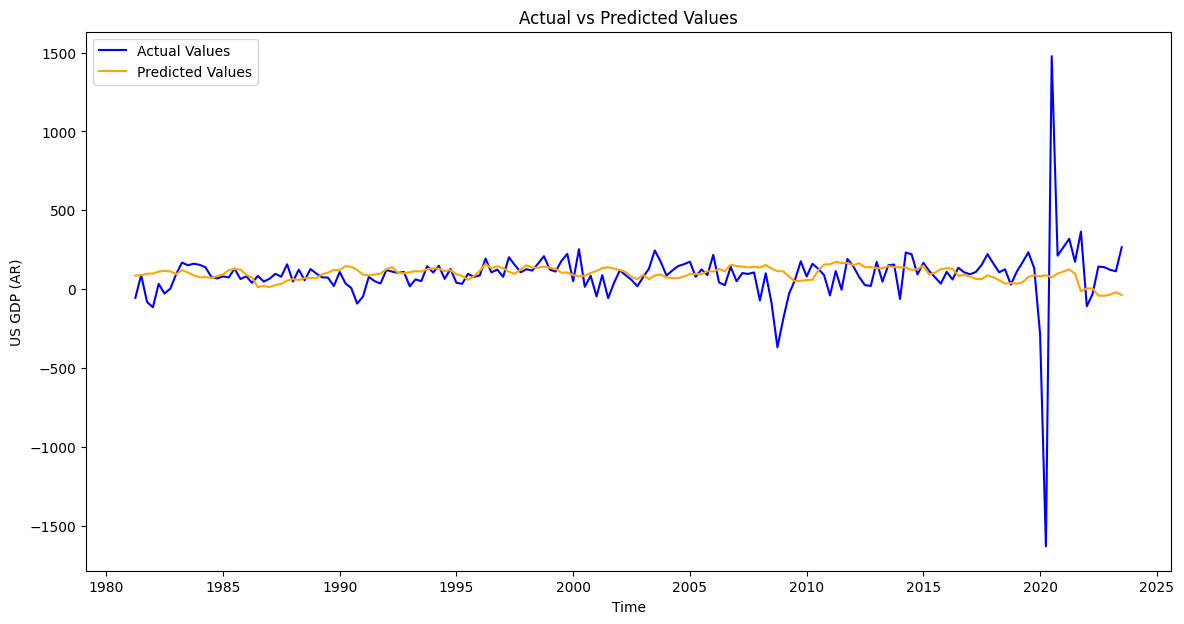

In [95]:
features = [col for col in data_diff.columns if col != 'US GDP (AR)']
target = 'US GDP (AR)'


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_diff[features + [target]])


def create_dataset(dataset, look_back=1):
    X, Y, dates = [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :-1]  # Features
        X.append(a)
        Y.append(dataset[i + look_back, -1])  # Target
        dates.append(data_diff.index[i + look_back])  # Record the date
    return np.array(X), np.array(Y), dates

look_back = 5
X, y, dates = create_dataset(scaled_data, look_back)


tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []
all_y_test_rescaled = []
all_y_pred_rescaled = []
all_test_dates = []


for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_dates = [dates[i] for i in test_index]

    model = Sequential([
        LSTM(30, input_shape=(look_back, len(features)), return_sequences=True),
        TimeDistributed(Dropout(rate=0.2)),
        LSTM(30),
        Dense(1)
    ])
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0) 

    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler.inverse_transform(np.column_stack([np.zeros((y_pred.shape[0], len(features))), y_pred]))[:, -1]
    y_test_rescaled = scaler.inverse_transform(np.column_stack([np.zeros((y_test.shape[0], len(features))), y_test]))[:, -1]

    all_y_test_rescaled.extend(y_test_rescaled)
    all_y_pred_rescaled.extend(y_pred_rescaled)
    all_test_dates.extend(test_dates)

    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)
    n = len(y_test_rescaled)
    p = len(features) + 1  # Number of predictors + intercept
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adj_r2)


avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)


print(f"Mean Squared Error:", mse_scores)
print(f"Mean Absolute Error:", mae_scores)
print(f"R-squared:", r2_scores)
print(f"Adjusted R-squared:", adjusted_r2_scores)

print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")



plt.figure(figsize=(14, 7))
plt.plot(all_test_dates, all_y_test_rescaled, label='Actual Values', color='blue')
plt.plot(all_test_dates, all_y_pred_rescaled, label='Predicted Values', color='orange')
plt.xlabel('Time')
plt.ylabel('US GDP (AR)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## RNN with the target variable only and Cross-Validation with K-Fold

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_60 (SimpleRNN)   (None, 5, 30)             960       
                                                                 
 time_distributed_60 (TimeDi  (None, 5, 30)            0         
 stributed)                                                      
                                                                 
 simple_rnn_61 (SimpleRNN)   (None, 30)                1830      
                                                                 
 dense_60 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,821
Trainable params: 2,821
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 4ms/step
Model: "sequential_61"
______________________________________

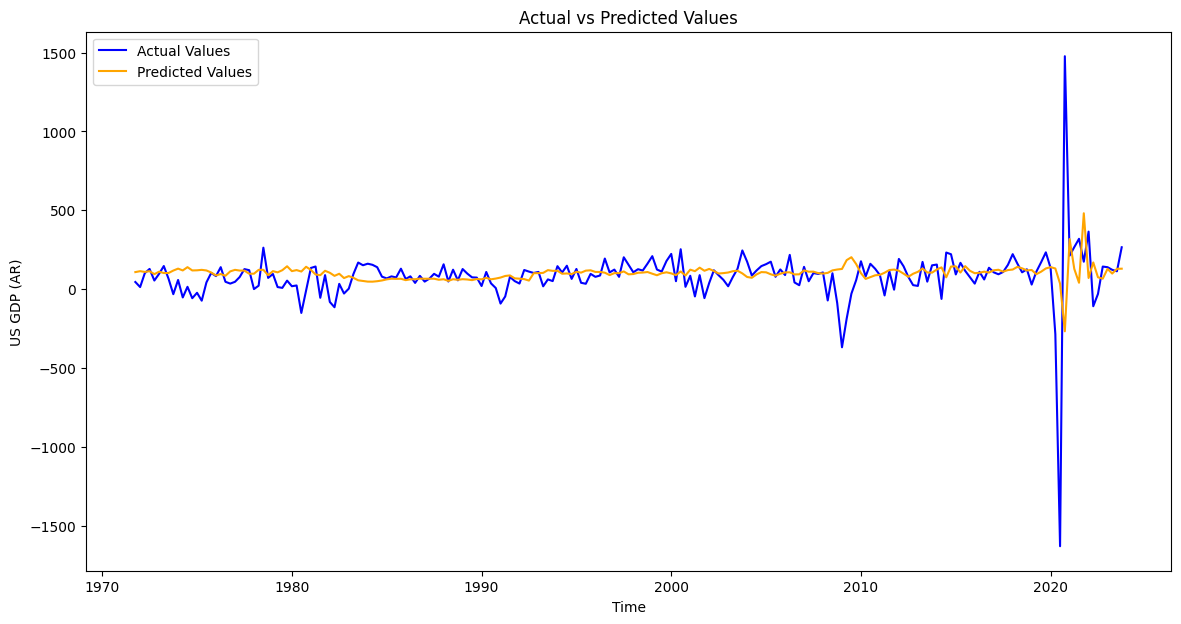

In [96]:
target = 'US GDP (AR)'
data = data_diff[[target]]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]  # Only the target column
        X.append(a)
        Y.append(dataset[i + look_back, 0])  # Target
    return np.array(X), np.array(Y)

look_back = 5
X, y = create_dataset(scaled_data, look_back)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

kf = KFold(n_splits=5)

mse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []
all_y_test_rescaled = []
all_y_pred_rescaled = []
all_test_indices = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    model = Sequential([
        SimpleRNN(30, input_shape=(look_back, 1), return_sequences=True),
        TimeDistributed(Dropout(rate=0.2)),
        SimpleRNN(30),
        Dense(1)
    ])
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0) 

    y_pred = model.predict(X_test)

    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    all_y_test_rescaled.extend(y_test_rescaled[:, 0])
    all_y_pred_rescaled.extend(y_pred_rescaled[:, 0])
    all_test_indices.extend(test_index)

    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)

    n = len(y_test_rescaled)
    p = 1  # Number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adj_r2)


avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)


print(f"Mean Squared Error:", mse_scores)
print(f"Mean Absolute Error:", mae_scores)
print(f"R-squared:", r2_scores)
print(f"Adjusted R-squared:", adjusted_r2_scores)

print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")

# Plot actual vs predicted values with time as the x-axis
test_dates = data_diff.index[look_back + 1:][all_test_indices]

plt.figure(figsize=(14, 7))
plt.plot(test_dates, all_y_test_rescaled, label='Actual Values', color='blue')
plt.plot(test_dates, all_y_pred_rescaled, label='Predicted Values', color='orange')
plt.xlabel('Time')
plt.ylabel('US GDP (AR)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## RNN with the target variable only and Cross-Validation with Time Series

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_70 (SimpleRNN)   (None, 5, 30)             960       
                                                                 
 time_distributed_65 (TimeDi  (None, 5, 30)            0         
 stributed)                                                      
                                                                 
 simple_rnn_71 (SimpleRNN)   (None, 30)                1830      
                                                                 
 dense_65 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,821
Trainable params: 2,821
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 5ms/step
Model: "sequential_66"
______________________________________

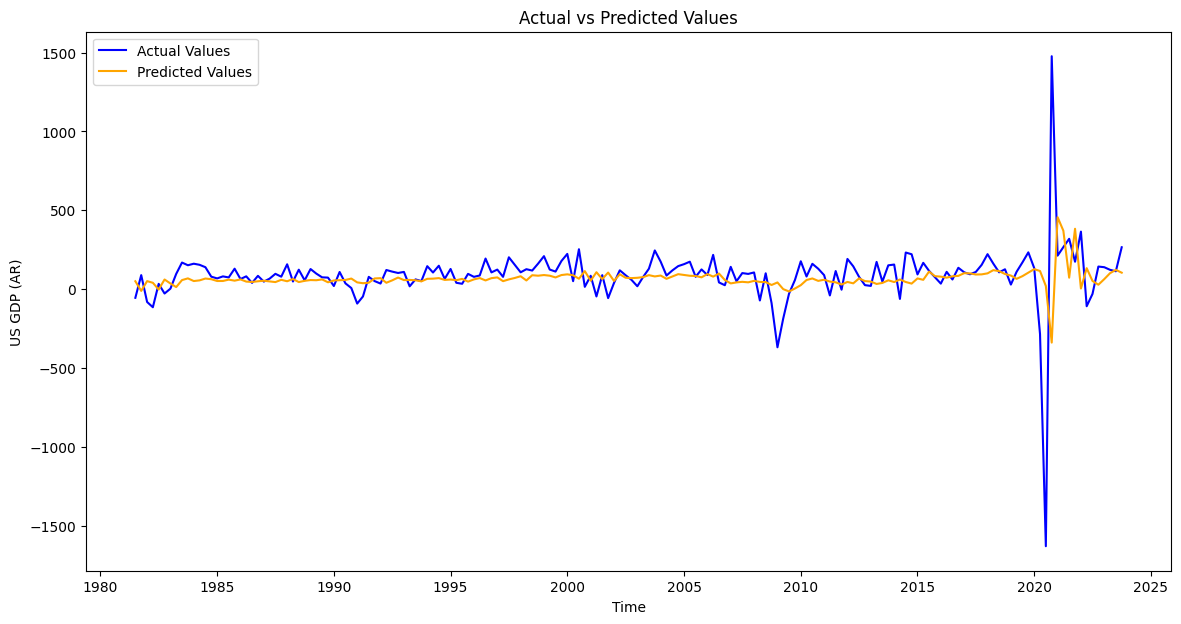

In [97]:
target = 'US GDP (AR)'
data = data_diff[[target]]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]  
        X.append(a)
        Y.append(dataset[i + look_back, 0])  
    return np.array(X), np.array(Y)

# Define look-back period
look_back = 5
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []

all_y_test_rescaled = []
all_y_pred_rescaled = []
all_test_indices = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = Sequential([
        SimpleRNN(30, input_shape=(look_back, 1), return_sequences=True),
        TimeDistributed(Dropout(rate=0.2)),
        SimpleRNN(30),
        Dense(1)
    ])
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0) 
    y_pred = model.predict(X_test)

    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    all_y_test_rescaled.extend(y_test_rescaled[:, 0])
    all_y_pred_rescaled.extend(y_pred_rescaled[:, 0])
    all_test_indices.extend(test_index)

    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)

    n = len(y_test_rescaled)
    p = 1  
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Store metrics
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adj_r2)

avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

print(f"Mean Squared Error:", mse_scores)
print(f"Mean Absolute Error:", mae_scores)
print(f"R-squared:", r2_scores)
print(f"Adjusted R-squared:", adjusted_r2_scores)

print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")

# Plot actual vs predicted values with time as the x-axis
test_dates = data_diff.index[look_back + 1:][all_test_indices]

plt.figure(figsize=(14, 7))
plt.plot(test_dates, all_y_test_rescaled, label='Actual Values', color='blue')
plt.plot(test_dates, all_y_pred_rescaled, label='Predicted Values', color='orange')
plt.xlabel('Time')
plt.ylabel('US GDP (AR)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## LSTM with the target variable only and Cross-Validation with K-Fold

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 5, 30)             3840      
                                                                 
 time_distributed_70 (TimeDi  (None, 5, 30)            0         
 stributed)                                                      
                                                                 
 lstm_61 (LSTM)              (None, 30)                7320      
                                                                 
 dense_70 (Dense)            (None, 1)                 31        
                                                                 
Total params: 11,191
Trainable params: 11,191
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 1s 5ms/step
Model: "sequential_71"
____________________________________

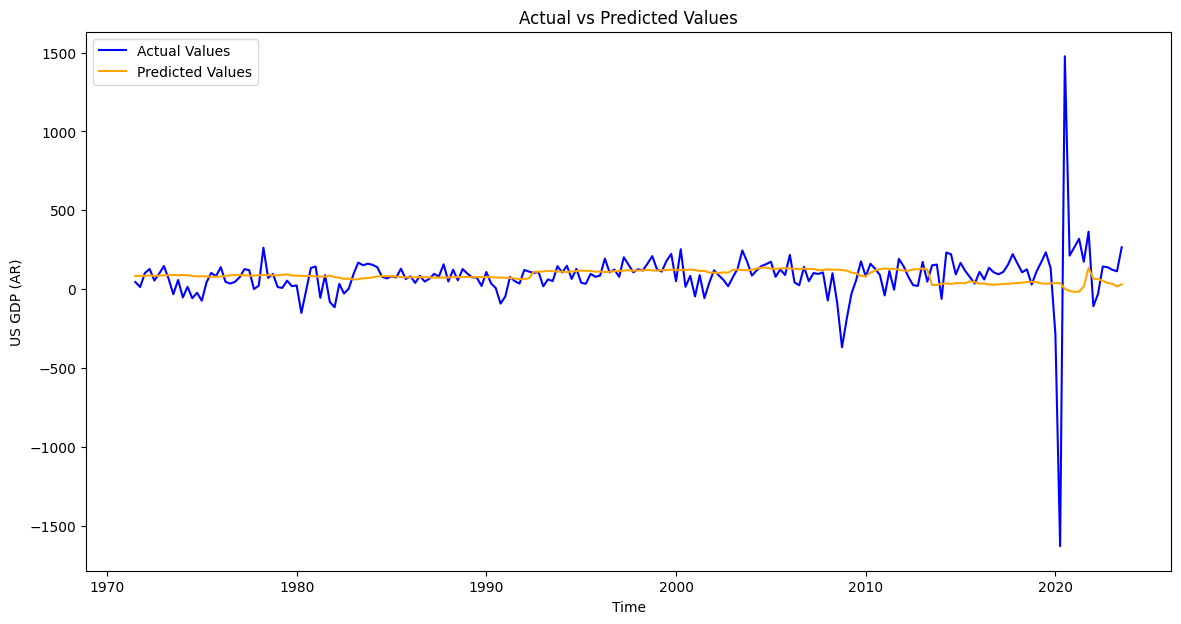

In [98]:
target = 'US GDP (AR)'
data = data_diff[[target]]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y, dates = [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]  # Only the target column
        X.append(a)
        Y.append(dataset[i + look_back, 0])  # Target
        dates.append(data.index[i + look_back])  # Record the date
    return np.array(X), np.array(Y), dates

look_back = 5
X, y, dates = create_dataset(scaled_data, look_back)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

kf = KFold(n_splits=5)

mse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []

all_y_test_rescaled = []
all_y_pred_rescaled = []
all_test_dates = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_dates = [dates[i] for i in test_index]

    model = Sequential([
        LSTM(30, input_shape=(look_back, 1), return_sequences=True),
        TimeDistributed(Dropout(rate=0.2)),
        LSTM(30),
        Dense(1)
    ])
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0) 

    # Predict on the testing data
    y_pred = model.predict(X_test)

    y_pred_rescaled = scaler.inverse_transform(np.column_stack([y_pred]))[:, 0]
    y_test_rescaled = scaler.inverse_transform(np.column_stack([y_test]))[:, 0]

    all_y_test_rescaled.extend(y_test_rescaled)
    all_y_pred_rescaled.extend(y_pred_rescaled)
    all_test_dates.extend(test_dates)

    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)

    n = len(y_test_rescaled)
    p = 1  # Number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Store metrics
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adj_r2)

# Calculate average metrics
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)


print(f"Mean Squared Error:", mse_scores)
print(f"Mean Absolute Error:", mae_scores)
print(f"R-squared:", r2_scores)
print(f"Adjusted R-squared:", adjusted_r2_scores)

print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")

# Plot actual vs predicted values with time as the x-axis
plt.figure(figsize=(14, 7))
plt.plot(all_test_dates, all_y_test_rescaled, label='Actual Values', color='blue')
plt.plot(all_test_dates, all_y_pred_rescaled, label='Predicted Values', color='orange')
plt.xlabel('Time')
plt.ylabel('US GDP (AR)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## LSTM with the target variable only and Cross-Validation with Time Series

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_70 (LSTM)              (None, 5, 30)             3840      
                                                                 
 time_distributed_75 (TimeDi  (None, 5, 30)            0         
 stributed)                                                      
                                                                 
 lstm_71 (LSTM)              (None, 30)                7320      
                                                                 
 dense_75 (Dense)            (None, 1)                 31        
                                                                 
Total params: 11,191
Trainable params: 11,191
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 1s 6ms/step
Model: "sequential_76"
____________________________________

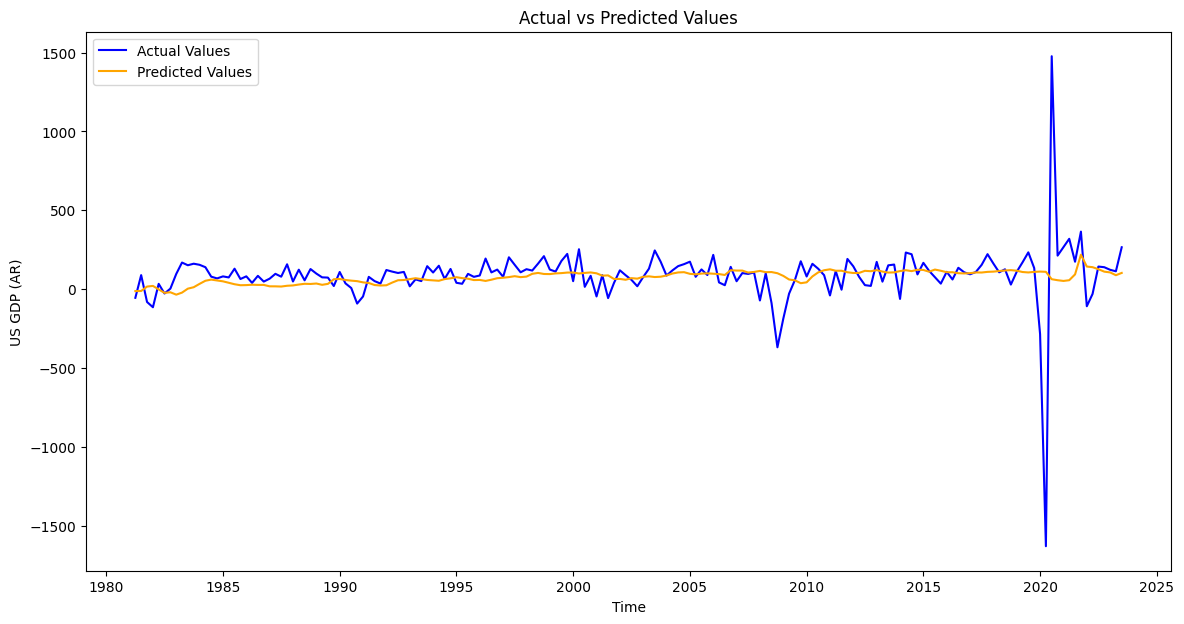

In [99]:
target = 'US GDP (AR)'
data = data_diff[[target]]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y, dates = [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]  # Only the target column
        X.append(a)
        Y.append(dataset[i + look_back, 0])  # Target
        dates.append(data.index[i + look_back])  # Record the date
    return np.array(X), np.array(Y), dates

look_back = 5
X, y, dates = create_dataset(scaled_data, look_back)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []

all_y_test_rescaled = []
all_y_pred_rescaled = []
all_test_dates = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    test_dates = [dates[i] for i in test_index]

    model = Sequential([
        LSTM(30, input_shape=(look_back, 1), return_sequences=True),
        TimeDistributed(Dropout(rate=0.2)),
        LSTM(30),
        Dense(1)
    ])
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0) 

    y_pred = model.predict(X_test)

    y_pred_rescaled = scaler.inverse_transform(np.column_stack([y_pred]))[:, 0]
    y_test_rescaled = scaler.inverse_transform(np.column_stack([y_test]))[:, 0]
    all_y_test_rescaled.extend(y_test_rescaled)
    all_y_pred_rescaled.extend(y_pred_rescaled)
    all_test_dates.extend(test_dates)

    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)

    n = len(y_test_rescaled)
    p = 1  # Number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adj_r2)

avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

print(f"Mean Squared Error:", mse_scores)
print(f"Mean Absolute Error:", mae_scores)
print(f"R-squared:", r2_scores)
print(f"Adjusted R-squared:", adjusted_r2_scores)

print(f"Average Mean Squared Error: {avg_mse:.3f}")
print(f"Average Mean Absolute Error: {avg_mae:.3f}")

# Plot actual vs predicted values with time as the x-axis
plt.figure(figsize=(14, 7))
plt.plot(all_test_dates, all_y_test_rescaled, label='Actual Values', color='blue')
plt.plot(all_test_dates, all_y_pred_rescaled, label='Predicted Values', color='orange')
plt.xlabel('Time')
plt.ylabel('US GDP (AR)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()